# Libraries and dataset import

In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import scipy as sc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #for plots
%matplotlib inline
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score
import statsmodels.api as sm

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [ ]:
!pip install imblearn

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC

from collections import Counter
#from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

#from xgboost import XGBClassifier
from scipy import stats
import joblib

In [3]:
from scipy.io import arff
import seaborn as sns

# [Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/seismic-bumps):


In [4]:
from scipy.io import arff
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

arff_file = arff.loadarff('/content/drive/MyDrive/seismic-bumps.arff')

Mounted at /content/drive


In [5]:
df = pd.DataFrame(arff_file[0])


In [6]:
df.head()

seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
0    b'a'           b'a'  b'N'  15180.0   48.0     -72.0   -72.0    b'a'   
1    b'a'           b'a'  b'N'  14720.0   33.0     -70.0   -79.0    b'a'   
2    b'a'           b'a'  b'N'   8050.0   30.0     -81.0   -78.0    b'a'   
3    b'a'           b'a'  b'N'  28820.0  171.0     -23.0    40.0    b'a'   
4    b'a'           b'a'  b'N'  12640.0   57.0     -63.0   -52.0    b'a'   

   nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

   energy  maxenergy class  
0     0.0        0.0  b'0'  
1  2000.0     2000.0  b'0'  
2     0.0        0.0  b'0'  
3  3000.0     3000.0  b'0'  
4     0.0        0.0  b'0'

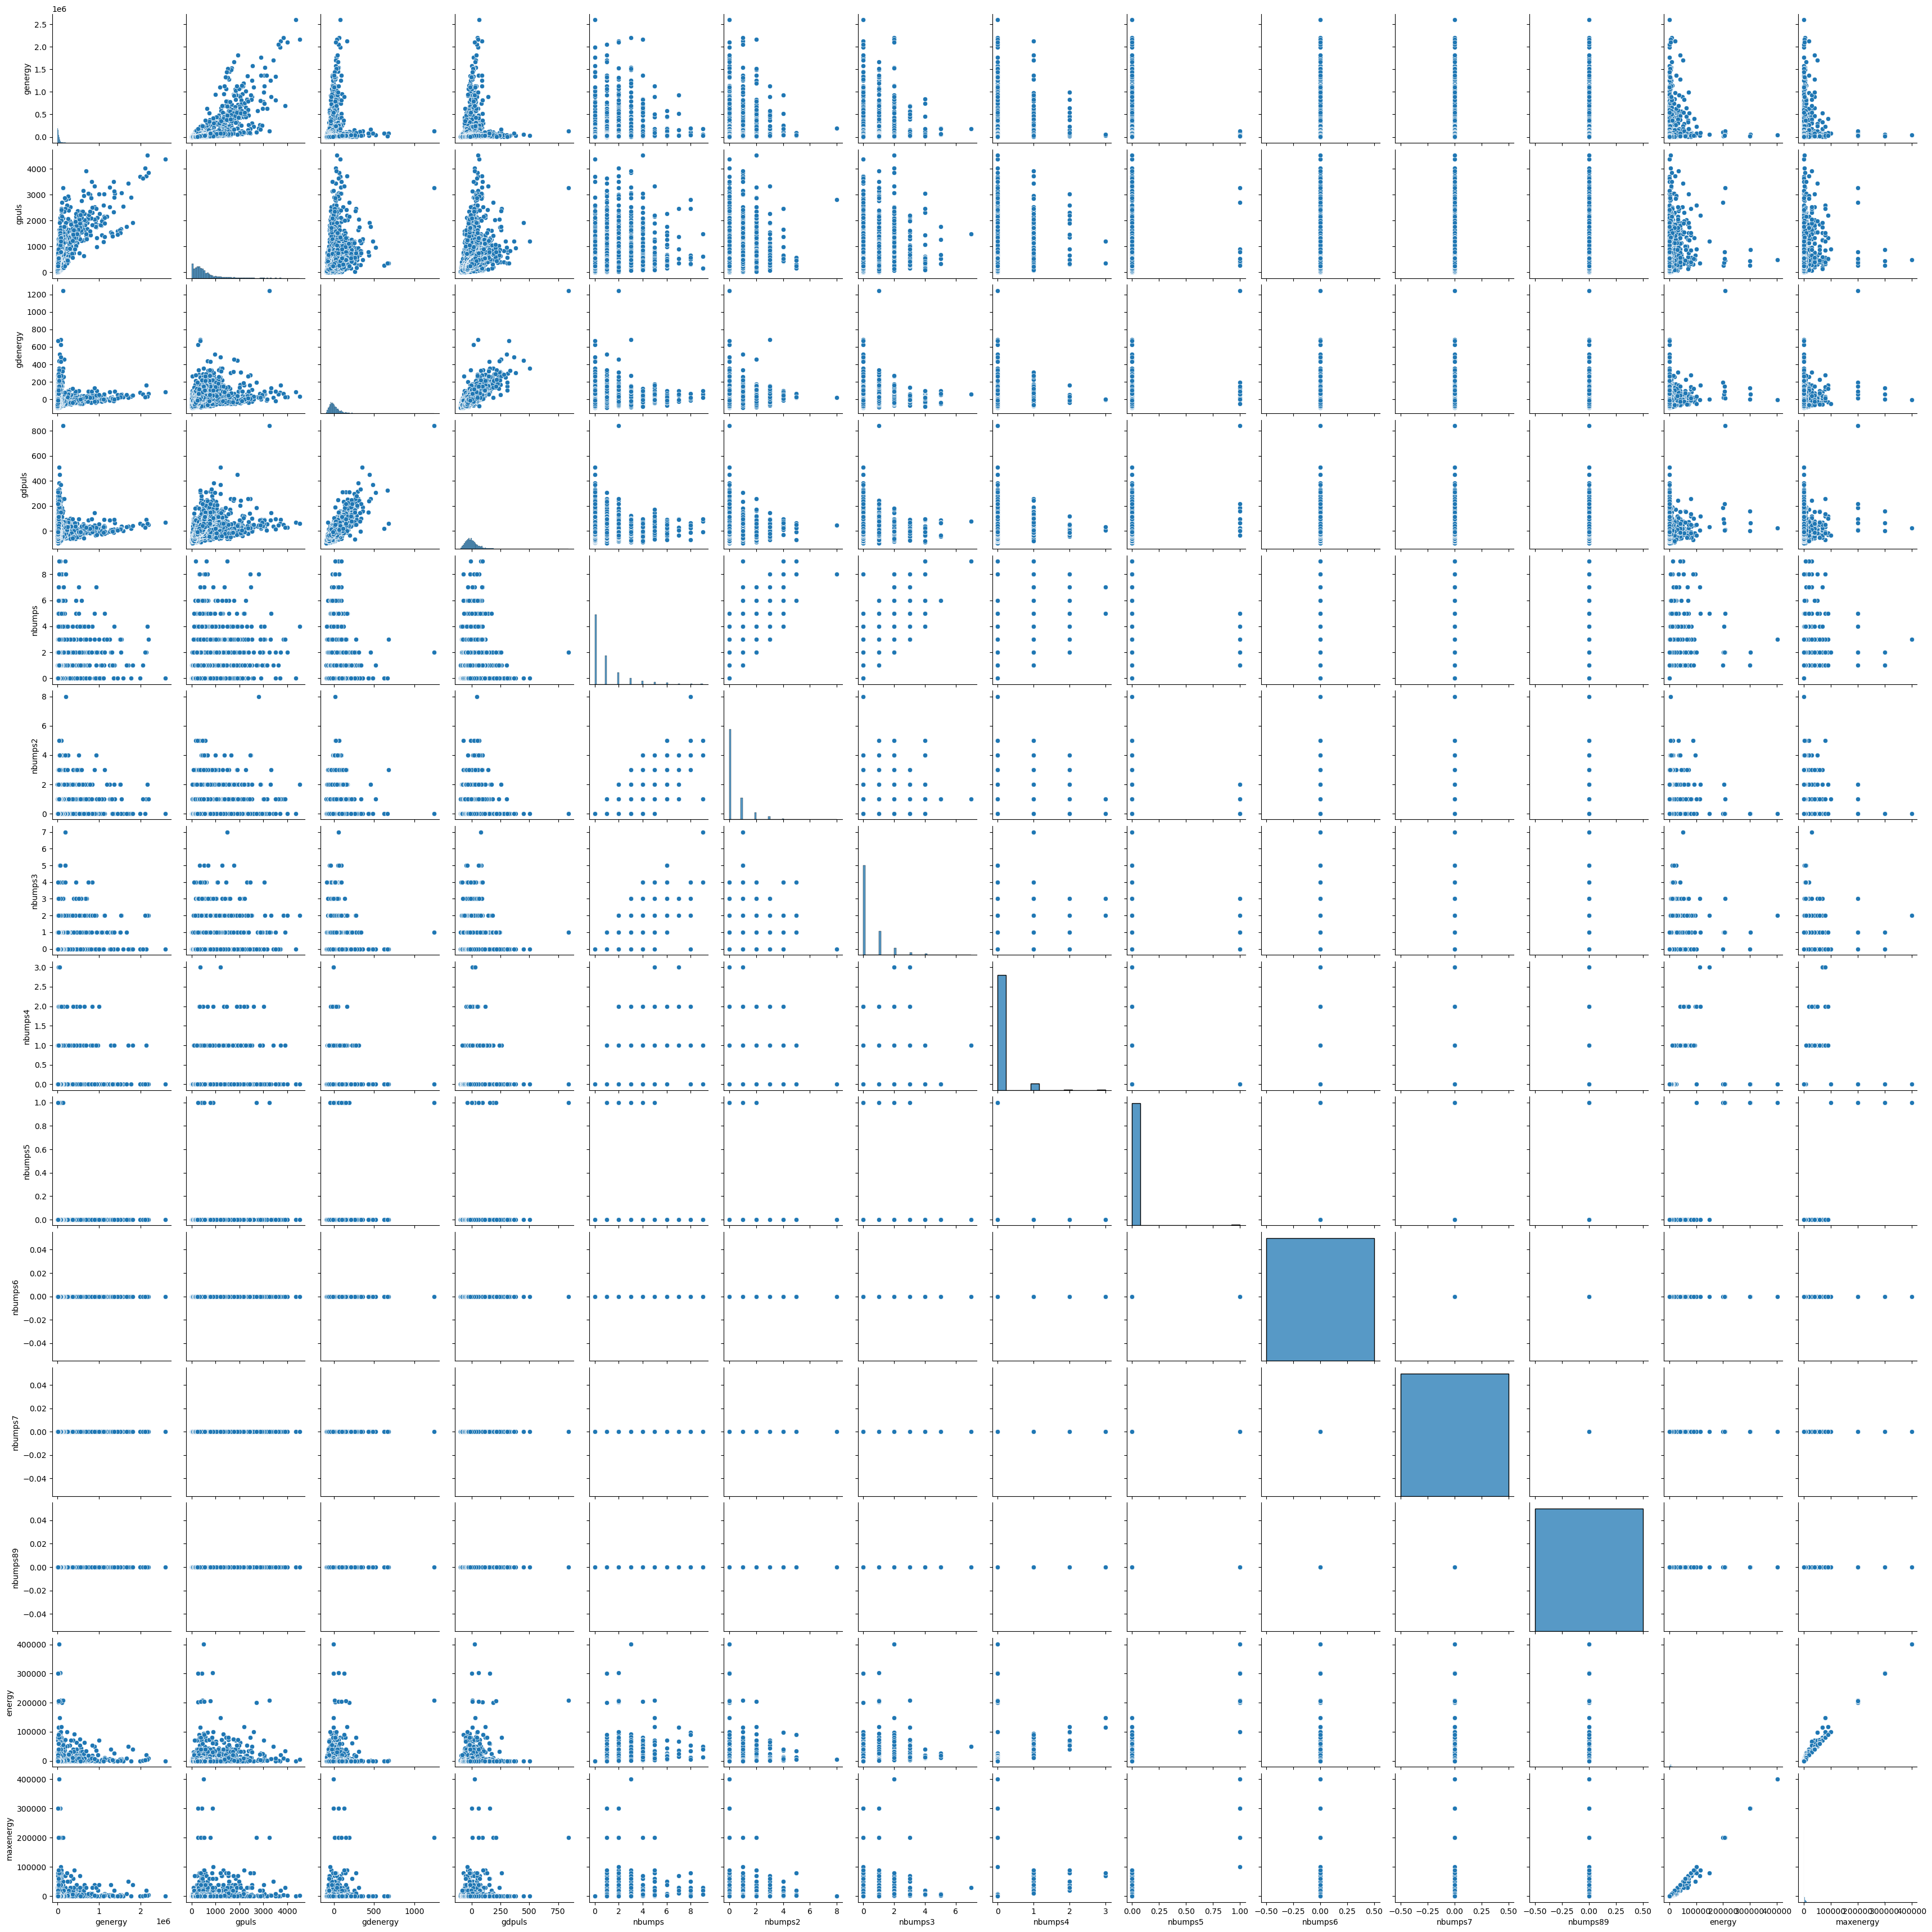

In [ ]:
sns.pairplot(df)

In [7]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

# Data Preprocessing


In [8]:


target_label = 'class'
categorical_columns = ['seismic', 'seismoacoustic', 'shift', 'ghazard']
numerical_columns = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
discrete_columns = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']

In [9]:
for column in df.columns:
    if column in categorical_columns + [target_label]:
        df[column] = df[column].str.decode("utf-8")
        if column == target_label:
            print(df[column].value_counts())
            df[column] = df[column].astype('int')

print(df.dtypes)


class
0    2414
1     170
Name: count, dtype: int64
seismic            object
seismoacoustic     object
shift              object
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard            object
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class               int64
dtype: object


# Target distribution

<ipython-input-10-9ac4adc0cdc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_label, data=df, palette=colors)


Text(0, 0.5, 'Count')

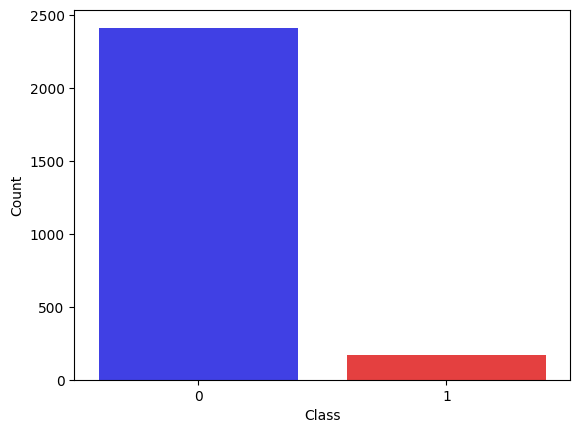

In [10]:

df['class'].value_counts() * 100 /len(df['class'])

colors = sns.color_palette([sns.color_palette("seismic")[1], sns.color_palette("seismic")[4]])
sns.countplot(x=target_label, data=df, palette=colors)
plt.xlabel('Class')
plt.ylabel('Count')

# Categorical Variables

[Variables Information](https://archive.ics.uci.edu/ml/datasets/seismic-bumps):


Methods of hazard assessments:
 - seismic (a - lack of hazard, b - low hazard, c - high hazard, d - danger state)
 - seismoacoustic

The coal mines shifts differ by the stage that they are at:
 - shift: information about type of a shift (W - coal-getting, N -preparation shift)



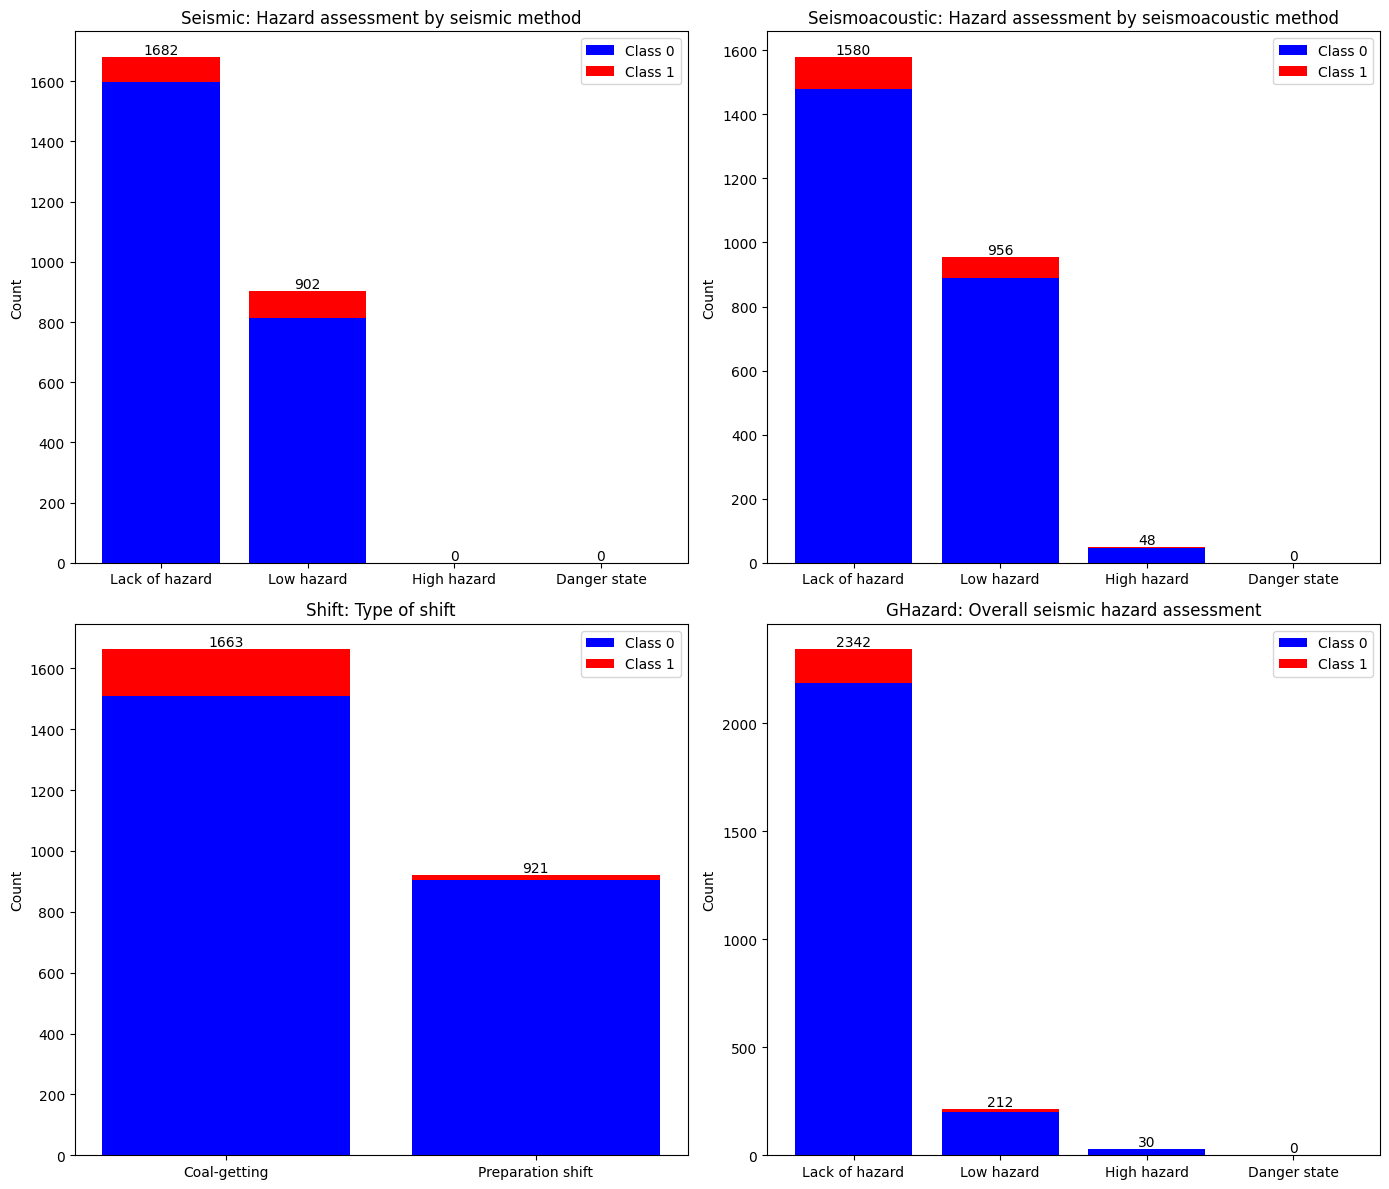

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


full_names = {
    'seismic': {'a': 'Lack of hazard', 'b': 'Low hazard', 'c': 'High hazard', 'd': 'Danger state'},
    'seismoacoustic': {'a': 'Lack of hazard', 'b': 'Low hazard', 'c': 'High hazard', 'd': 'Danger state'},
    'shift': {'W': 'Coal-getting', 'N': 'Preparation shift'},
    'ghazard': {'a': 'Lack of hazard', 'b': 'Low hazard', 'c': 'High hazard', 'd': 'Danger state'}
}

order = {
    'seismic': ['Lack of hazard', 'Low hazard', 'High hazard', 'Danger state'],
    'seismoacoustic': ['Lack of hazard', 'Low hazard', 'High hazard', 'Danger state'],
    'shift': ['Coal-getting', 'Preparation shift'],
    'ghazard': ['Lack of hazard', 'Low hazard', 'High hazard', 'Danger state']
}
titles = {
    'seismic': 'Seismic: Hazard assessment by seismic method',
    'seismoacoustic': 'Seismoacoustic: Hazard assessment by seismoacoustic method',
    'shift': 'Shift: Type of shift',
    'ghazard': 'GHazard: Overall seismic hazard assessment'
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, column in enumerate(['seismic', 'seismoacoustic', 'shift', 'ghazard']):
    data_class_0 = df[df['class'] == 0][column].value_counts().rename(index=full_names[column]).reindex(order[column], fill_value=0)
    data_class_1 = df[df['class'] == 1][column].value_counts().rename(index=full_names[column]).reindex(order[column], fill_value=0)

    axes[i].bar(data_class_0.index, data_class_0.values, label='Class 0', color='blue')
    axes[i].bar(data_class_1.index, data_class_1.values, bottom=data_class_0.values, label='Class 1', color='red')

    axes[i].set_title(titles[column])
    axes[i].set_ylabel('Count')
    axes[i].legend()

    for j, value in enumerate(data_class_0.values + data_class_1.values):
        axes[i].text(j, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


The class distributions for three different seismic hazard risk assessment methods

In [12]:
data_hazard_methods = pd.crosstab(df['seismic'], df[target_label], colnames=['class'])
data_hazard_methods


class       0   1
seismic          
a        1599  83
b         815  87

In [13]:
data_hazard_methods = pd.crosstab(df['seismoacoustic'], df[target_label], colnames=['class'])
data_hazard_methods

class              0    1
seismoacoustic           
a               1479  101
b                890   66
c                 45    3

In [14]:

ghazard_classes = pd.crosstab(df['ghazard'], df[target_label])
ghazard_classes


class       0    1
ghazard           
a        2186  156
b         198   14
c          30    0

In [15]:
#10% of coal-getting shifts are hazardous states

shift_classes = pd.crosstab(df['shift'], df[target_label])
shift_classes


class     0    1
shift           
N       904   17
W      1510  153


Next pre-processing is to encode hazard assesment with numerical values:
- the risks are labeled with respect to the increasing level of risk from no risk to dangerous state, so it makes sense to code numerically to maintain information.


In [18]:
def apply_numeric_encoding(column_name, data_frame):
    try:
      # Mapping risk levels to numbers, considering the severity scale
      data_frame[column_name + "_enc_0"] = data_frame[column_name].map({'a': 0, 'b': 1, 'c': 2, 'd': 3, 'W': 0, 'N': 1})
      data_frame.drop(columns=column_name, inplace=True)
      return data_frame
    except Exception as error:
        print(error)
        print("Failed to encode numerically the column: " + column_name)

for category in categorical_columns:
    df = apply_numeric_encoding(category, df)

# This approach aligns with the objective of maintaining the ordinal nature of hazard levels, which range from no risk to a dangerous state
#Numerical encoding preserves this ordinal information, making it more suitable for modeling and analysis


In [19]:
def encode_features(column_name, dataframe):
    label_enc = LabelEncoder()
    onehot_enc = OneHotEncoder(drop='first', sparse=False)
    try:
        label_encoded_data = label_enc.fit_transform(dataframe[column_name])

        label_encoded_data = label_encoded_data.reshape(-1, 1)
        one_hot_data = onehot_enc.fit_transform(label_encoded_data)
        new_columns_count = one_hot_data.shape[1]
        new_column_names = [column_name + '_oh_' + str(i) for i in range(new_columns_count)]
        one_hot_df = pd.DataFrame(one_hot_data, columns=new_column_names)
        dataframe = pd.concat([dataframe, one_hot_df], axis=1)
        dataframe.drop(columns=column_name, inplace=True)
        return dataframe
    except Exception as error:
        print(error)
        print("Failed to perform one-hot encoding on column:", column_name)


# Numeric Features Transformations

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'genergy'),
  Text(0, 1.5, 'gpuls'),
  Text(0, 2.5, 'gdenergy'),
  Text(0, 3.5, 'gdpuls'),
  Text(0, 4.5, 'energy'),
  Text(0, 5.5, 'maxenergy')])

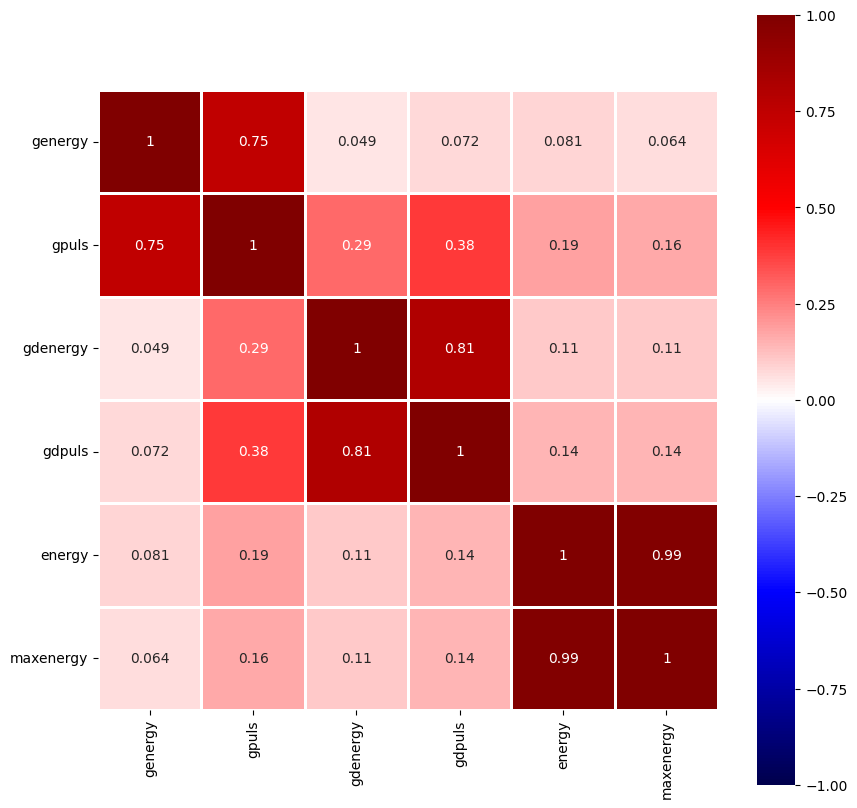

In [20]:


df[numerical_columns].describe()

df_corr = df[numerical_columns].corr()

df_corr

plt.figure(figsize=[10, 10])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='seismic', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


<Axes: xlabel='genergy', ylabel='gpuls'>

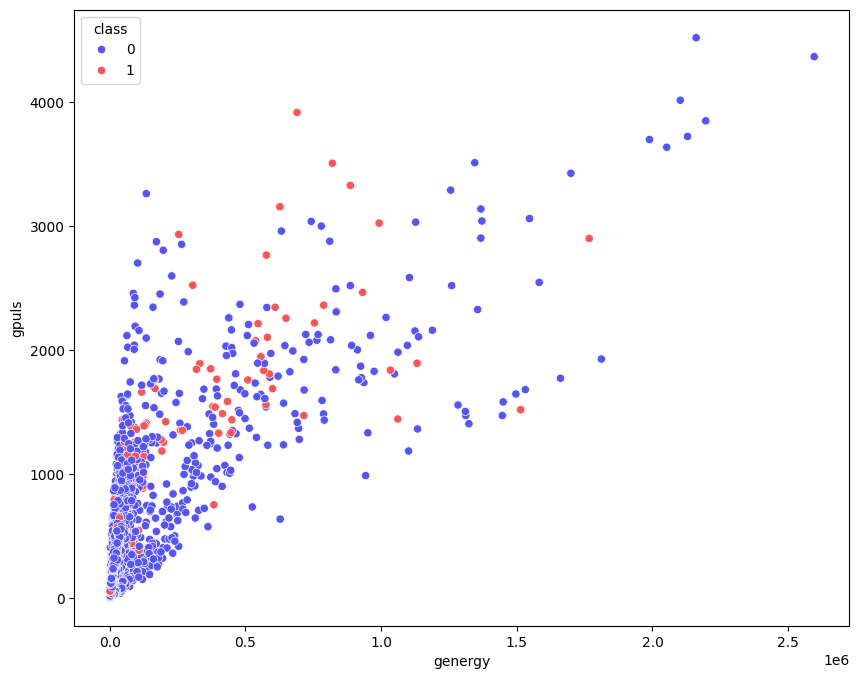

In [21]:

plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=df, palette = 'seismic')

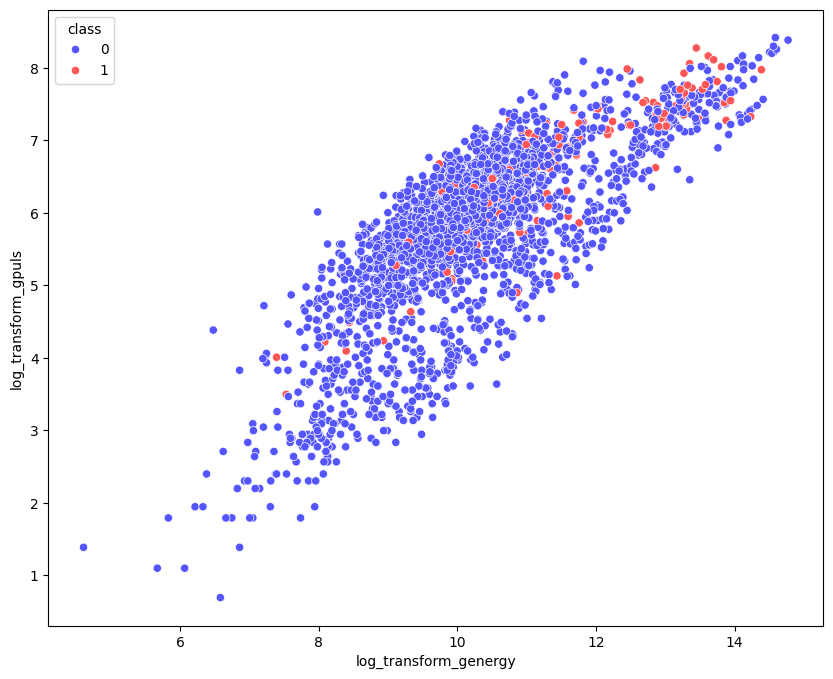

In [22]:

# log transform
df['log_transform_gpuls'] = np.log(df['gpuls'])
df['log_transform_genergy'] = np.log(df['genergy'])

plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_transform_genergy', y='log_transform_gpuls', hue='class', data=df, palette = 'seismic')

df.drop(columns=['log_transform_genergy', 'log_transform_gpuls'], inplace=True)

The gdenergy and gdpuls present the negative values, so logariphmic transformations shuld not be applied, the same argument is againsst square root transformation

<Axes: xlabel='gdenergy', ylabel='gdpuls'>

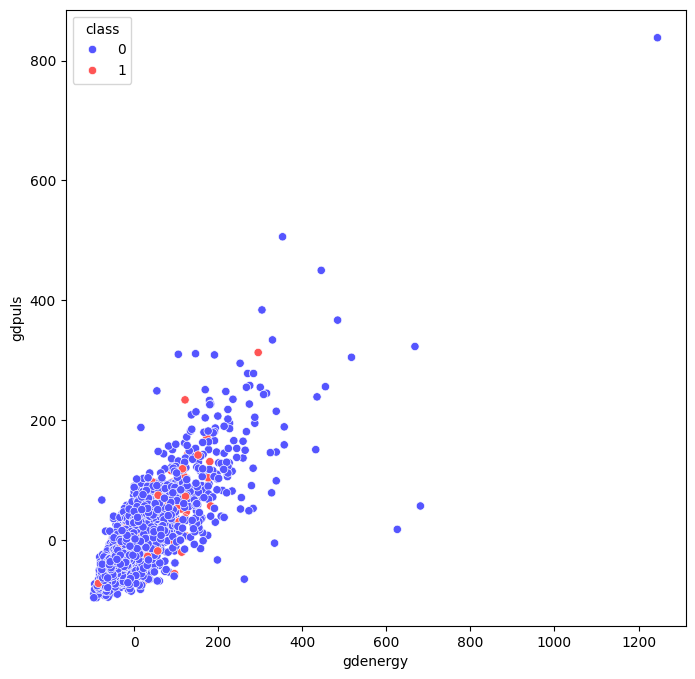

In [23]:

plt.figure(figsize=[8, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', hue='class', data=df, palette = 'seismic')


The representation of negative shifts:

<ipython-input-24-f6ed9838d15f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gdenergy'], hist=True)


<Axes: xlabel='gdenergy', ylabel='Density'>

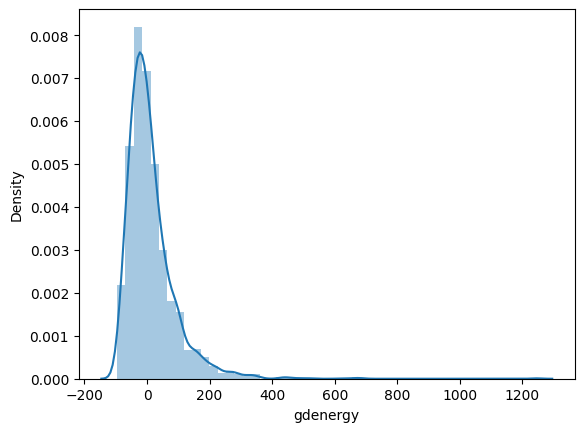

In [24]:
sns.distplot(df['gdenergy'], hist=True)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-2e791df44d29>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['gdenergy']), hist=True)


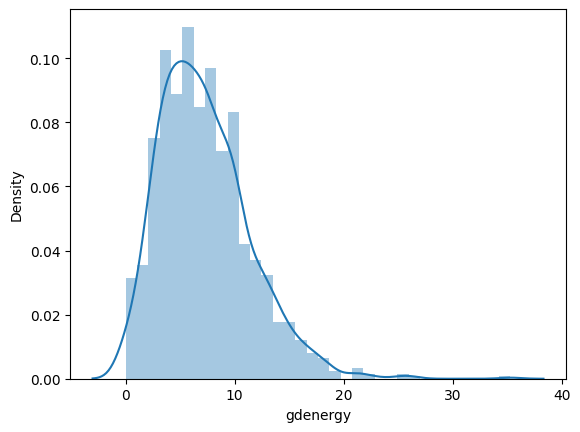

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-2e791df44d29>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['gdpuls']), hist=True)


<Axes: xlabel='gdpuls', ylabel='Density'>

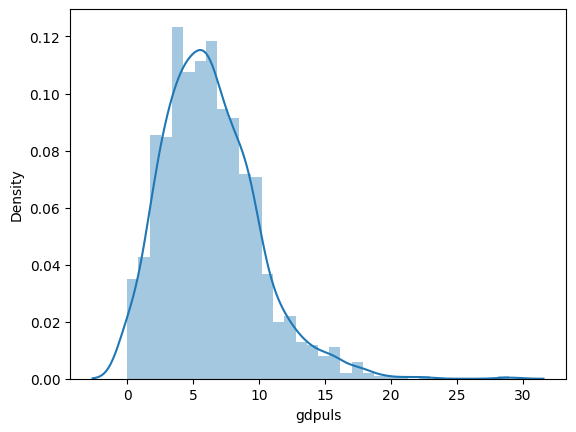

In [25]:
# Square root transformations do not allow to save the information about negative shifts
sns.distplot(np.sqrt(df['gdenergy']), hist=True)
plt.show()
sns.distplot(np.sqrt(df['gdpuls']), hist=True)


<ipython-input-26-1d4d6ef966bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['gdenergy']), hist=True)


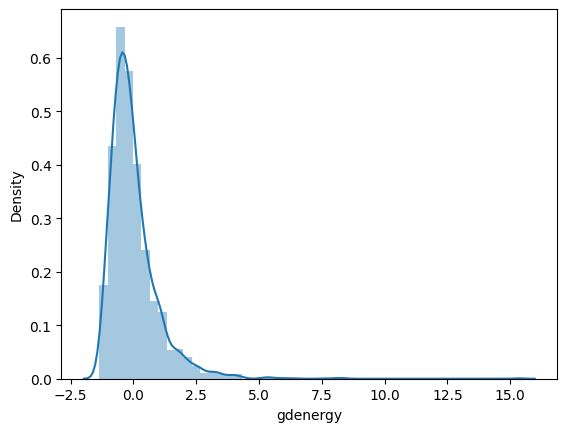

<ipython-input-26-1d4d6ef966bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['gdpuls']), hist=True)


<Axes: xlabel='gdpuls', ylabel='Density'>

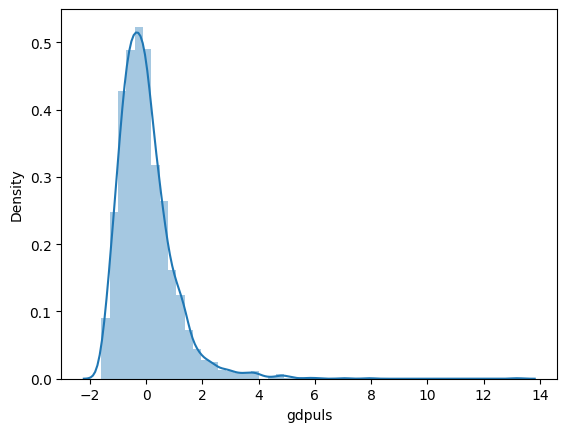

In [26]:

sns.distplot(stats.zscore(df['gdenergy']), hist=True)
plt.show()
sns.distplot(stats.zscore(df['gdpuls']), hist=True)

Energy and Maxenergy are inherently similar, having shown the correlation of 0.99, that is why it makes sense to use only one of the features.

<Axes: xlabel='energy', ylabel='maxenergy'>

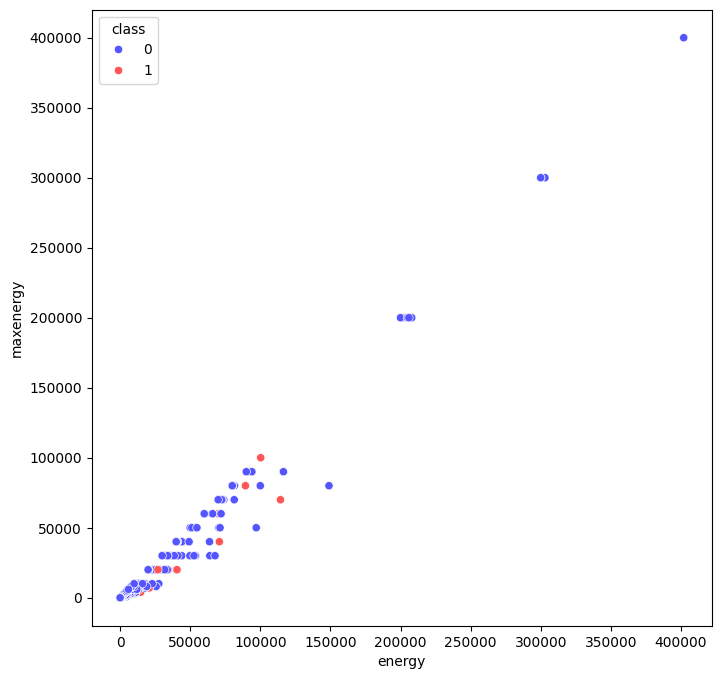

In [27]:
plt.figure(figsize=[8, 8])
sns.scatterplot(x='energy', y='maxenergy', hue='class', data=df, palette = 'seismic')


<ipython-input-28-2f51383e4bf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['energy'], hist=True)


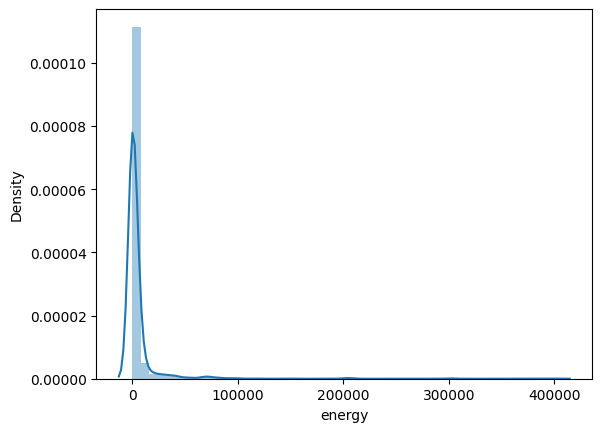

In [28]:
sns.distplot(df['energy'], hist=True)
plt.show()

This has a lot of 0's distributed around zero, and at the same time there is a long tail - so that transformation is needed. It is suggested to do log-transformation with adding a constant =1

In [29]:

stats.zscore(df['energy']).mean(), stats.zscore(df['maxenergy']).mean()


(2.1998227113315797e-17, -1.0999113556657898e-17)

<ipython-input-30-f65c0ba72b72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['energy']+1), hist=True)


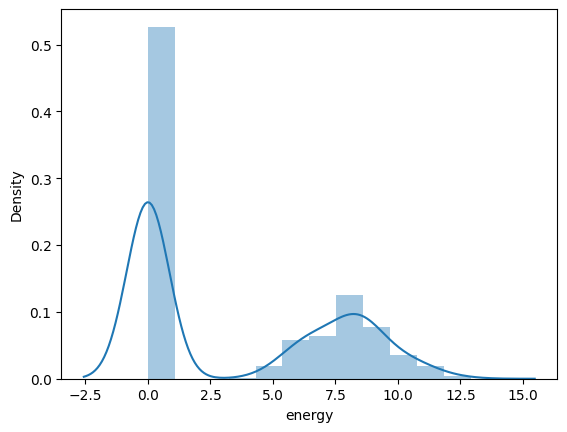

In [30]:

sns.distplot(np.log(df['energy']+1), hist=True)
plt.show()



In [31]:
def logarithmic_shift(column_data):
    return np.log(1 + column_data)

transformed_numerical_columns = {
    'genergy': np.log,
    'gpuls': np.log,
    'gdenergy': stats.zscore,
    'gdenergy': stats.zscore,
    'energy': logarithmic_shift
}

for column_name, transformation in transformed_numerical_columns.items():
    df['scaled_' + column_name] = transformation(df[column_name])
df.drop(columns=numerical_columns, inplace=True)
df.head()

df[[column for column in df.columns if 'scaled_' in column]].describe()


scaled_genergy  scaled_gpuls  scaled_gdenergy  scaled_energy
count     2584.000000   2584.000000     2.584000e+03    2584.000000
mean        10.221063      5.761759    -2.199823e-17       3.481643
std          1.393919      1.173926     1.000194e+00       4.117081
min          4.605170      0.693147    -1.349577e+00       0.000000
25%          9.363919      5.247024    -6.148645e-01       0.000000
50%         10.145845      5.937536    -2.288290e-01       0.000000
75%         10.874880      6.505784     3.190922e-01       7.863651
max         14.769348      8.415825     1.534957e+01      12.904210

In [32]:
df.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], inplace=True)
#because they contain only 1 unique value = 0 - no information and multicollinearity


In [33]:

discrete_columns = list(set(discrete_columns) - set(['nbumps6', 'nbumps7', 'nbumps89']))
discrete_columns

['nbumps', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps2']

In [34]:

for col in discrete_columns:
    bump_and_class = pd.crosstab(df[col], df[target_label], colnames=['class'])
    print(bump_and_class)
    print('___________________')


class      0   1
nbumps          
0.0     1424  40
1.0      567  31
2.0      208  37
3.0       96  31
4.0       59  10
5.0       30   8
6.0       19   9
7.0        3   2
8.0        6   1
9.0        2   1
___________________
class       0   1
nbumps3          
0.0      1806  73
1.0       442  55
2.0       115  25
3.0        35   7
4.0        12   8
5.0         3   2
7.0         1   0
___________________
class       0    1
nbumps4           
0.0      2278  148
1.0       123   20
2.0        12    1
3.0         1    1
___________________
class       0    1
nbumps5           
0.0      2403  169
1.0        11    1
___________________
class       0   1
nbumps2          
0.0      1832  69
1.0       399  56
2.0       122  29
3.0        47  11
4.0         8   4
5.0         5   1
8.0         1   0
___________________


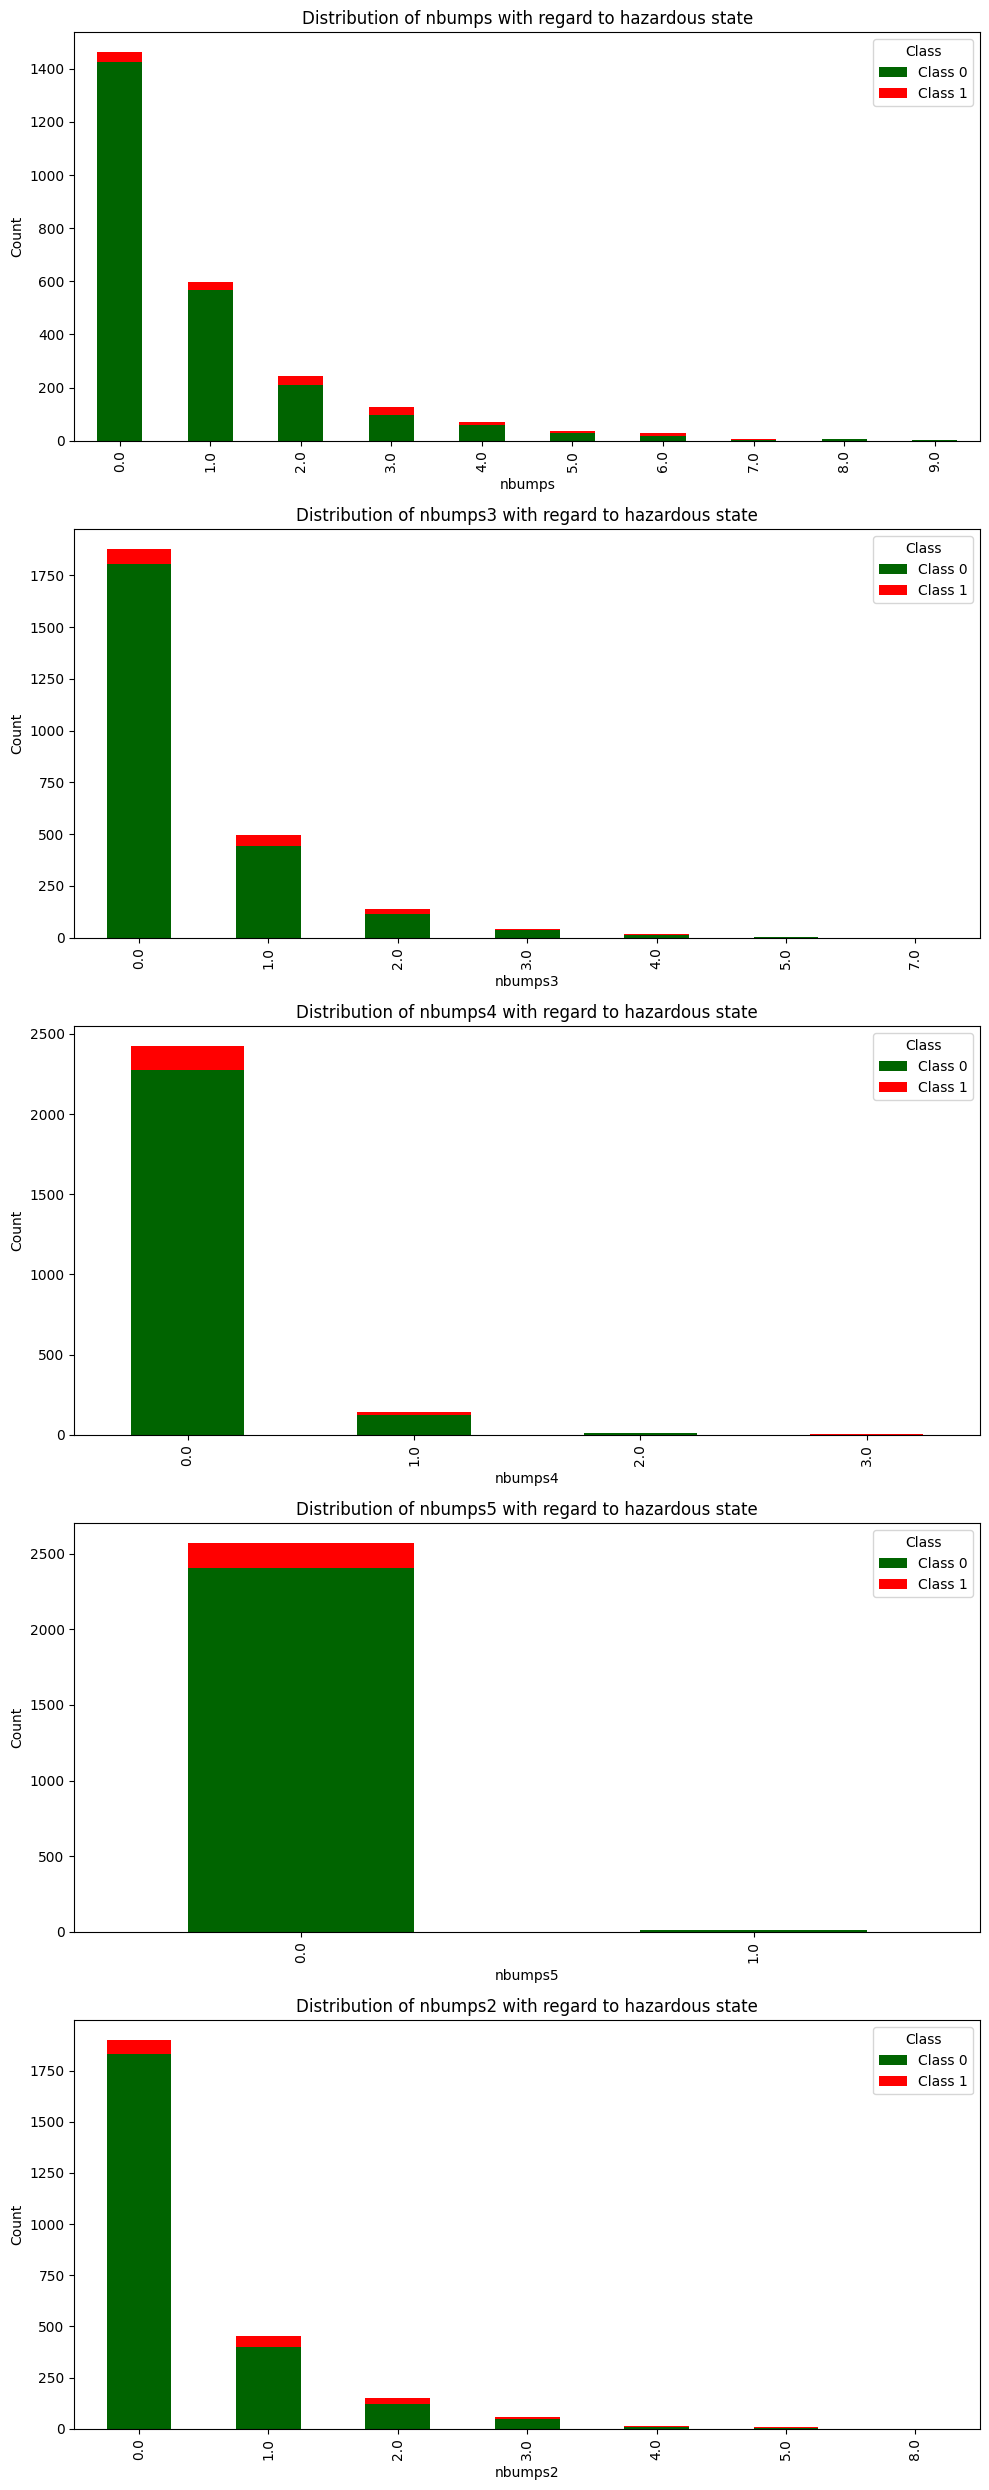

In [35]:
import pandas as pd
import matplotlib.pyplot as plt



# Create subplots
fig, axes = plt.subplots(nrows=len(discrete_columns), ncols=1, figsize=(10, 5 * len(discrete_columns)))

# Iterate over each column to plot
for i, col in enumerate(discrete_columns):
    # Create a crosstab for each column with the 'class' column
    col_and_class = pd.crosstab(df[col], df['class'], normalize=False)

    # Stacked bar plot for the crosstab data
    col_and_class.plot(kind='bar', stacked=True, ax=axes[i], color=['darkgreen', 'red'])
    axes[i].set_title(f'Distribution of {col} with regard to hazardous state')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].legend(title='Class', labels=['Class 0', 'Class 1'])

# Adjust layout
plt.tight_layout()
plt.show()


# Correlations with the target and between the features


In [36]:
df_corr = df.corr()


In [37]:
df_corr

nbumps   nbumps2   nbumps3   nbumps4   nbumps5  \
nbumps                1.000000  0.804978  0.803364  0.395052  0.069613   
nbumps2               0.804978  1.000000  0.350724  0.161296 -0.005251   
nbumps3               0.803364  0.350724  1.000000  0.175301  0.046498   
nbumps4               0.395052  0.161296  0.175301  1.000000 -0.016580   
nbumps5               0.069613 -0.005251  0.046498 -0.016580  1.000000   
class                 0.248144  0.201381  0.205327  0.075458  0.004834   
seismic_enc_0         0.127171  0.066301  0.068249  0.241264  0.021627   
seismoacoustic_enc_0  0.017083  0.023355  0.005500  0.001981  0.012021   
shift_enc_0          -0.311292 -0.278907 -0.213955 -0.151681 -0.003293   
ghazard_enc_0        -0.051151 -0.014489 -0.070216 -0.017897  0.012241   
scaled_genergy        0.413645  0.303243  0.342068  0.224714  0.025477   
scaled_gpuls          0.283790  0.213291  0.209652  0.202308  0.043079   
scaled_gdenergy       0.030039  0.041246 -0.012189  0.036916  0.123229   
scaled_energy         0.782024  0.543103  0.669248  0.416245  0.146706   

                         class  seismic_enc_0  seismoacoustic_enc_0  \
nbumps                0.248144       0.127171              0.017083   
nbumps2               0.201381       0.066301              0.023355   
nbumps3               0.205327       0.068249              0.005500   
nbumps4               0.075458       0.241264              0.001981   
nbumps5               0.004834       0.021627              0.012021   
class                 1.000000       0.090574              0.008251   
seismic_enc_0         0.090574       1.000000              0.058114   
seismoacoustic_enc_0  0.008251       0.058114              1.000000   
shift_enc_0          -0.142079      -0.268667             -0.081082   
ghazard_enc_0        -0.017744       0.097272              0.460687   
scaled_genergy        0.193425       0.160985              0.096309   
scaled_gpuls          0.166411       0.336464              0.174608   
scaled_gdenergy       0.002957       0.142308              0.184654   
scaled_energy         0.194623       0.126556              0.006161   

                      shift_enc_0  ghazard_enc_0  scaled_genergy  \
nbumps                  -0.311292      -0.051151        0.413645   
nbumps2                 -0.278907      -0.014489        0.303243   
nbumps3                 -0.213955      -0.070216        0.342068   
nbumps4                 -0.151681      -0.017897        0.224714   
nbumps5                 -0.003293       0.012241        0.025477   
class                   -0.142079      -0.017744        0.193425   
seismic_enc_0           -0.268667       0.097272        0.160985   
seismoacoustic_enc_0    -0.081082       0.460687        0.096309   
shift_enc_0              1.000000      -0.054115       -0.511894   
ghazard_enc_0           -0.054115       1.000000        0.045130   
scaled_genergy          -0.511894       0.045130        1.000000   
scaled_gpuls            -0.628288       0.158325        0.775962   
scaled_gdenergy         -0.097382       0.317974        0.252026   
scaled_energy           -0.284306      -0.034297        0.451352   

                      scaled_gpuls  scaled_gdenergy  scaled_energy  
nbumps                    0.283790         0.030039       0.782024  
nbumps2                   0.213291         0.041246       0.543103  
nbumps3                   0.209652        -0.012189       0.669248  
nbumps4                   0.202308         0.036916       0.416245  
nbumps5                   0.043079         0.123229       0.146706  
class                     0.166411         0.002957       0.194623  
seismic_enc_0             0.336464         0.142308       0.126556  
seismoacoustic_enc_0      0.174608         0.184654       0.006161  
shift_enc_0              -0.628288        -0.097382      -0.284306  
ghazard_enc_0             0.158325         0.317974      -0.034297  
scaled_genergy            0.775962         0.252026       0.451352 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'nbumps'),
  Text(0, 1.5, 'nbumps2'),
  Text(0, 2.5, 'nbumps3'),
  Text(0, 3.5, 'nbumps4'),
  Text(0, 4.5, 'nbumps5'),
  Text(0, 5.5, 'class'),
  Text(0, 6.5, 'seismic_enc_0'),
  Text(0, 7.5, 'seismoacoustic_enc_0'),
  Text(0, 8.5, 'shift_enc_0'),
  Text(0, 9.5, 'ghazard_enc_0'),
  Text(0, 10.5, 'scaled_genergy'),
  Text(0, 11.5, 'scaled_gpuls'),
  Text(0, 12.5, 'scaled_gdenergy'),
  Text(0, 13.5, 'scaled_energy')])

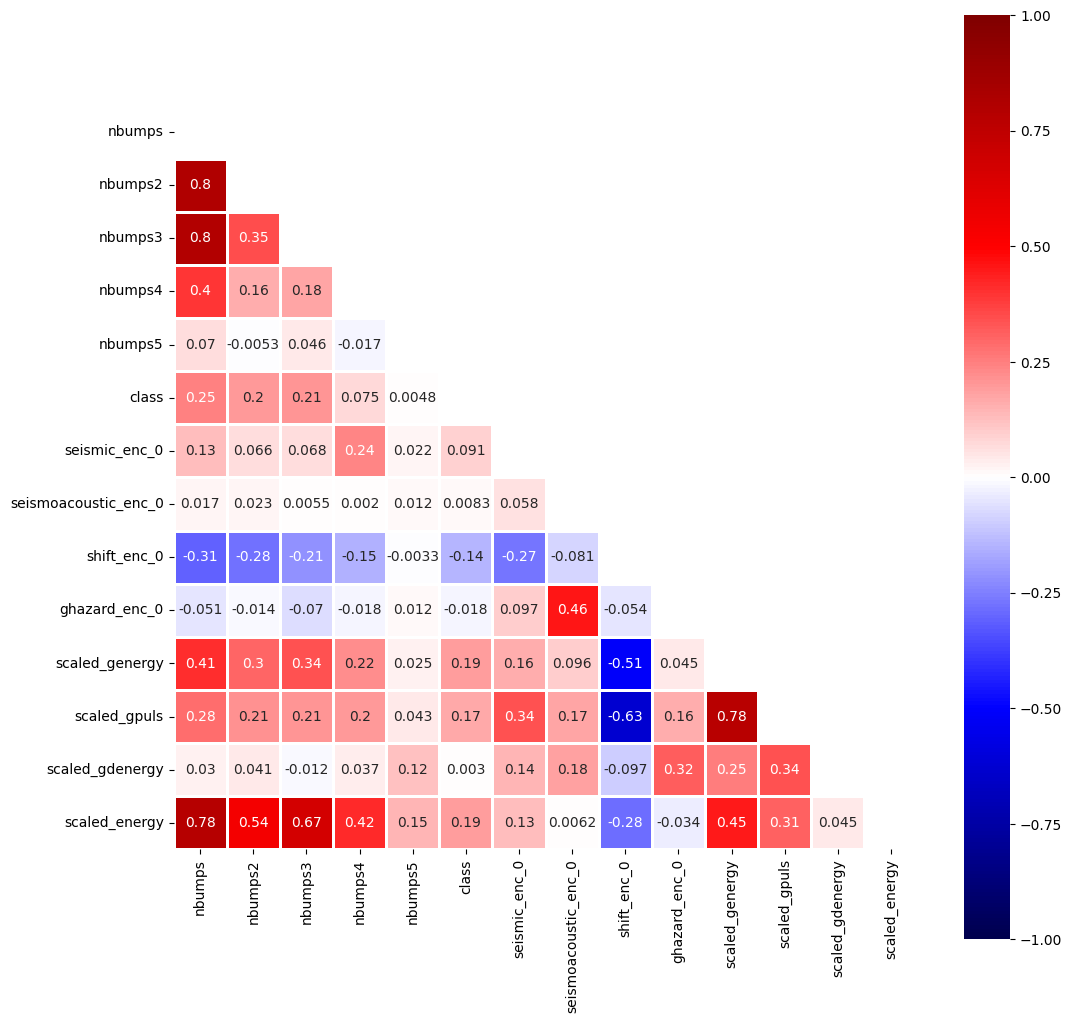

In [38]:
upper_triangle_mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, mask=upper_triangle_mask, vmin=-1, vmax=1, cmap='seismic', annot=True, square=True, linewidth=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


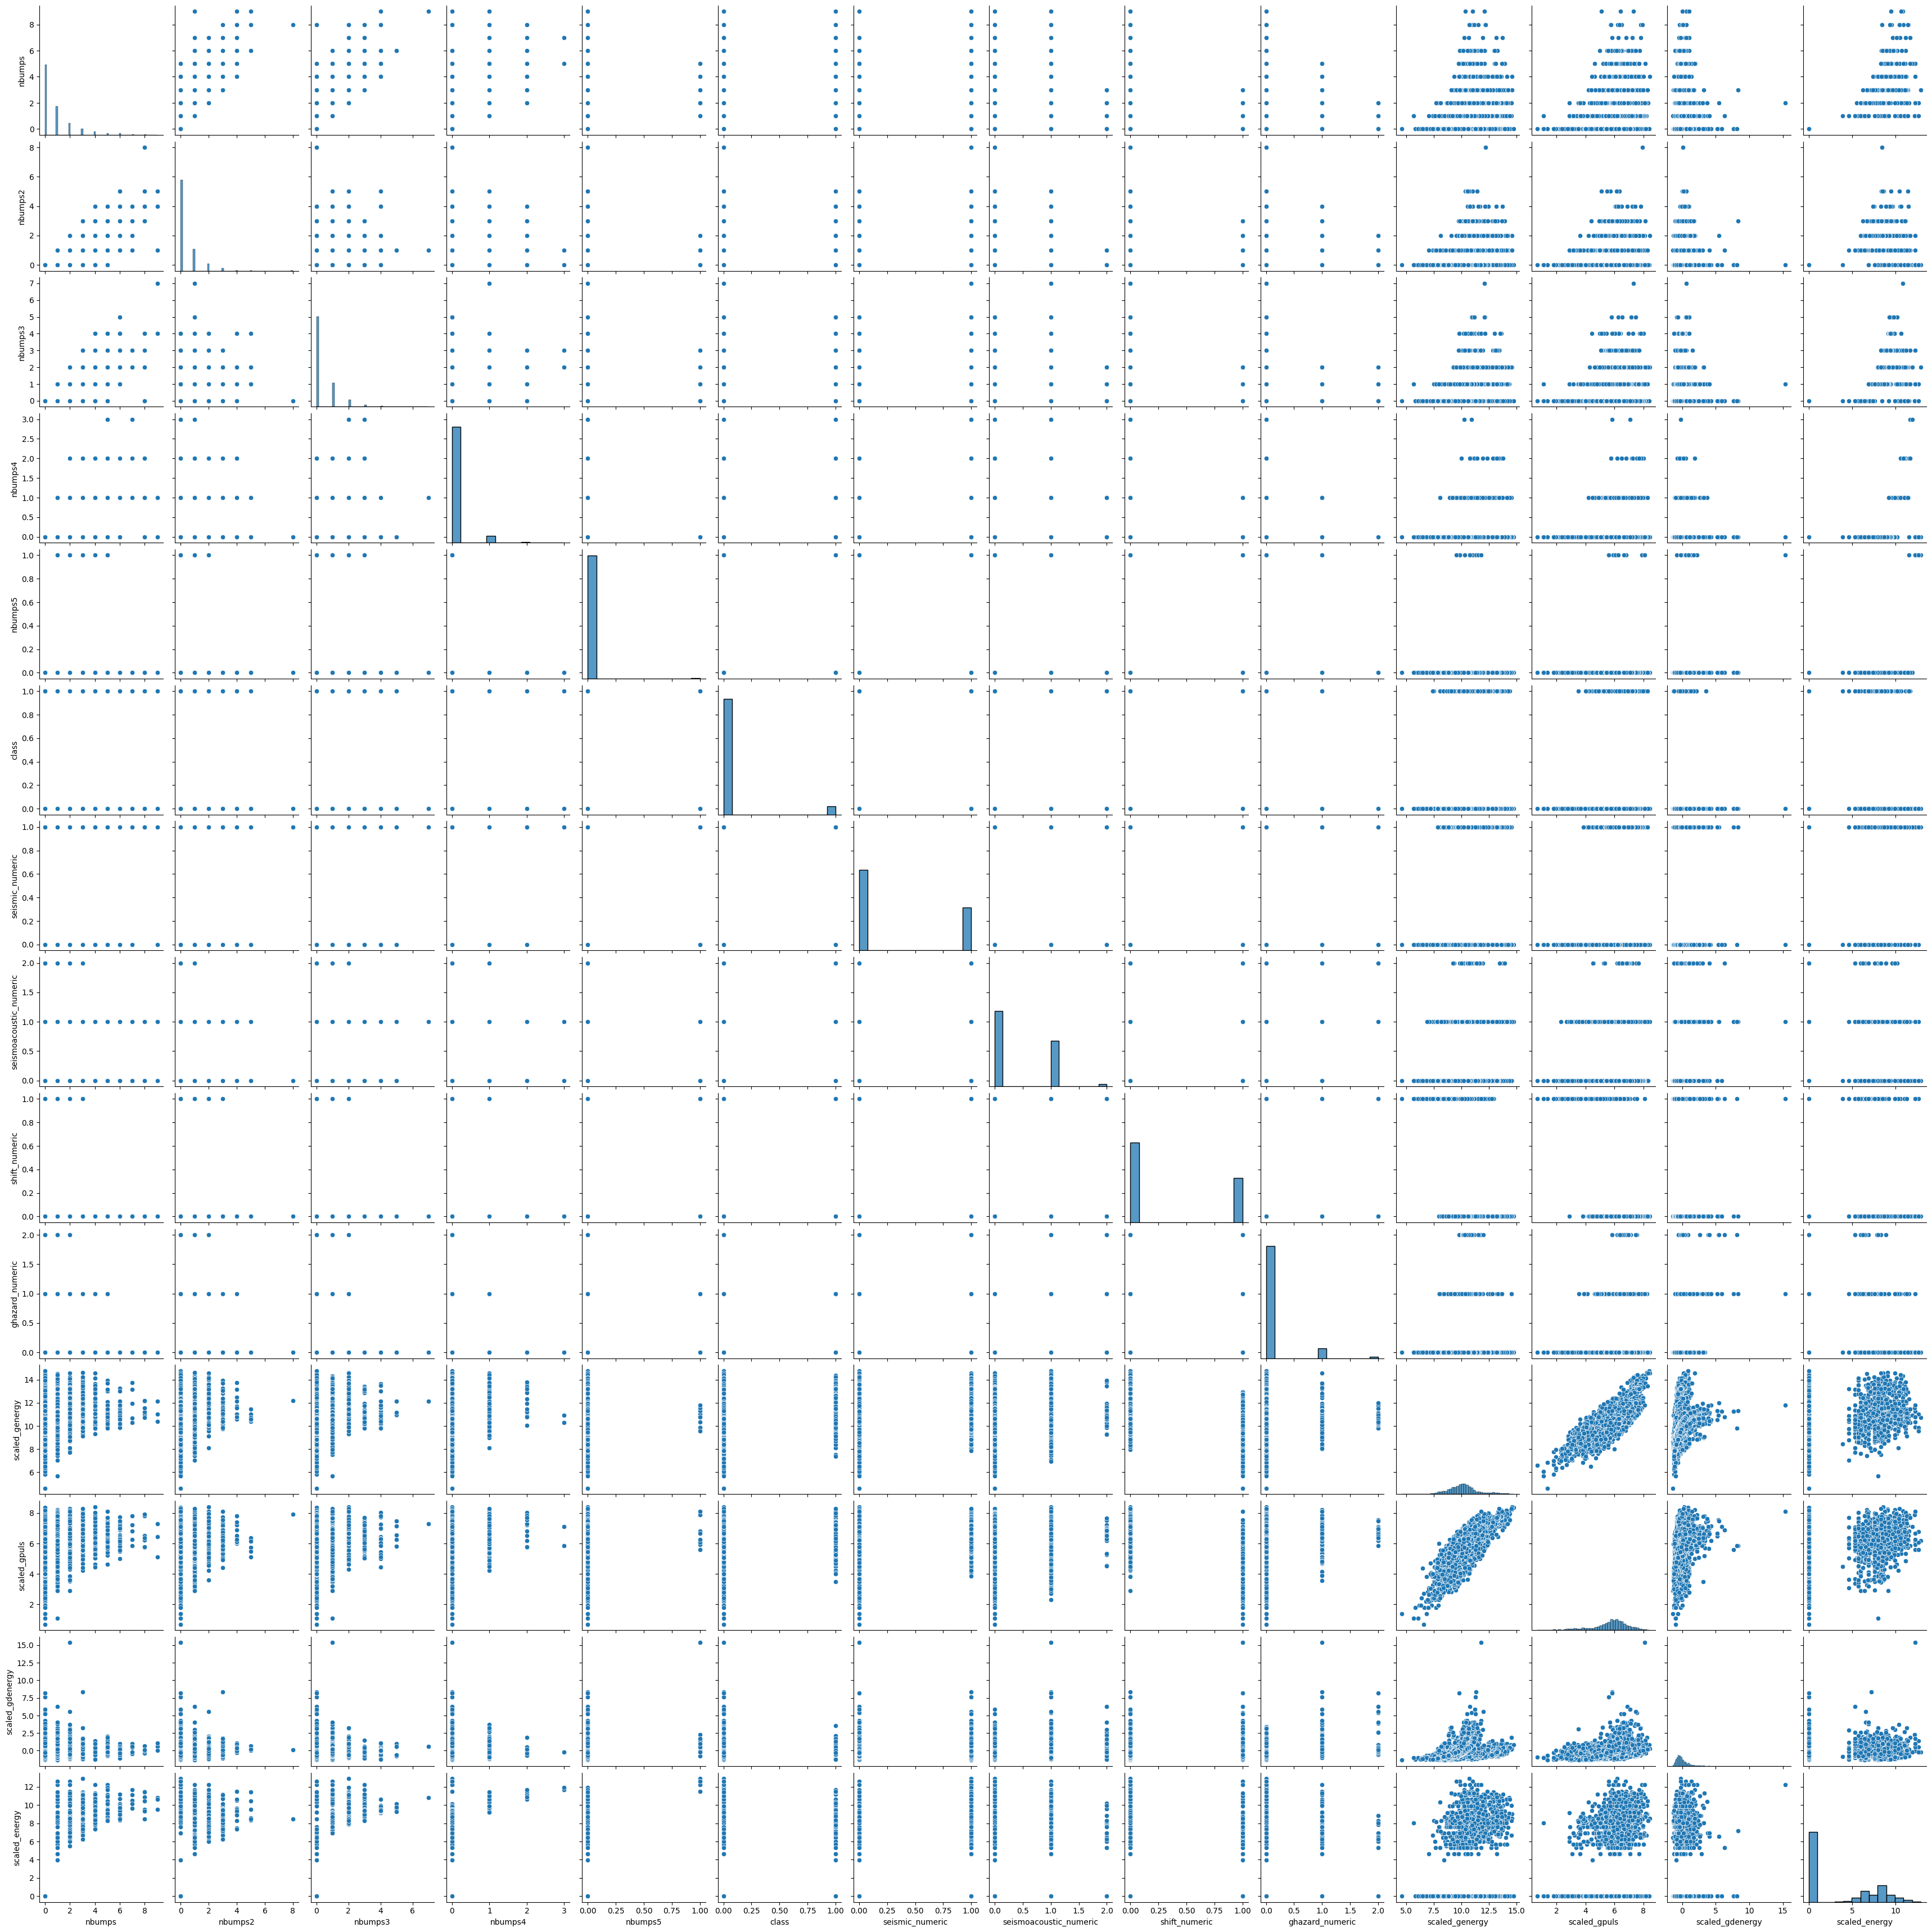

In [48]:
sns.pairplot(df)

# Splitting Traning and Test data using Stratified Shuffle Split


In [39]:

X_cols = list(set(df.columns) - set([target_label]))
X = df[list(set(df.columns) - set([target_label]))].values
y = df[target_label]

type(X), type(y)

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

In [40]:

for train_i, test_i in stratified_split.split(X, y):
    y_train= y[train_i]
    X_train = X[train_i]
    X_test, y_test = X[test_i], y[test_i]

print("Train Distribution:")
print(y_train.value_counts()/len(y_train))
print("Test Distribution:")
print(y_test.value_counts()/len(y_test))


Train Distribution:
class
0    0.934204
1    0.065796
Name: count, dtype: float64
Test Distribution:
class
0    0.934236
1    0.065764
Name: count, dtype: float64


In [41]:
X_test = pd.DataFrame(X_test, columns=X_cols)
X_train = pd.DataFrame(X_train, columns=X_cols)


In [42]:
nbumps_indices = [X_cols.index(f) for f in X_cols if 'nbumps' in f]
nbumps_indices

[0, 2, 4, 7, 12]

# ANOVA F-value test

In [43]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif


anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = pd.DataFrame({
    'feature': df[list(set(df.columns) - set([target_label]))].columns,
    'ANOVA F-value': anova_selector.scores_,
    'p-value': anova_selector.pvalues_
}).sort_values(by='ANOVA F-value', ascending=False)

print("ANOVA F-value scores:")
print(anova_scores)


ANOVA F-value scores:
                 feature  ANOVA F-value       p-value
0                 nbumps     169.419280  1.466889e-37
2                nbumps3     113.646271  5.363295e-26
12               nbumps2     109.137170  4.746275e-25
1          scaled_energy     101.651471  1.789158e-23
8         scaled_genergy     100.355906  3.357486e-23
3           scaled_gpuls      73.539207  1.672508e-17
9            shift_enc_0      53.195573  3.996622e-13
5          seismic_enc_0      21.356902  3.999798e-06
4                nbumps4      14.785868  1.233454e-04
10         ghazard_enc_0       0.813177  3.672667e-01
11  seismoacoustic_enc_0       0.175784  6.750565e-01
7                nbumps5       0.060329  8.059963e-01
6        scaled_gdenergy       0.022577  8.805737e-01



- `nbumps` has the highest ANOVA F-value and the most statistically significant difference in means between the groups (hazardous vs. non-hazardous states)

- `nbumps2`, `scaled_energy`, `nbumps3`, and `scaled_genergy`  have high F-values, suggesting they are statistically significant and potentially good predictors.

- `scaled_gpuls`, `shift_enc_0`, `seismic_enc_0`, and `nbumps4` show some significance but to a lesser extent

# Mixture models

In [44]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import pandas as pd

X = X_train

Bgmm = BayesianGaussianMixture(n_components=6, covariance_type='full',
                               weight_concentration_prior=0.01, max_iter=200)
Bgmm.fit(X)
probs = Bgmm.predict_proba(X)
results = np.sum(probs, axis=0)
results_df = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1, 7))

print(results_df)


   # of individuals
1             125.0
2             113.0
3             111.0
4             656.0
5             455.0
6             607.0


In [45]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import pandas as pd

X = X_train

bgmm_4cl = BayesianGaussianMixture(n_components=4, covariance_type='full',
                               weight_concentration_prior=0.15, max_iter=500)


# 4 as there are 4 states of asessed mines a,b,c,d but only a and b and c are assigned within this dataset
bgmm_4cl.fit(X)

# Predict the probabilities of each component (cluster)
probs = bgmm_4cl.predict_proba(X)

# Summarize the results to see the distribution across clusters
results = np.sum(probs, axis=0)
results_df = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1, 5))

print(results_df)


   # of individuals
1             322.0
2             456.0
3             720.0
4             569.0


<ipython-input-62-0dafccf52532>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(list(cluster_assignments), palette='viridis')


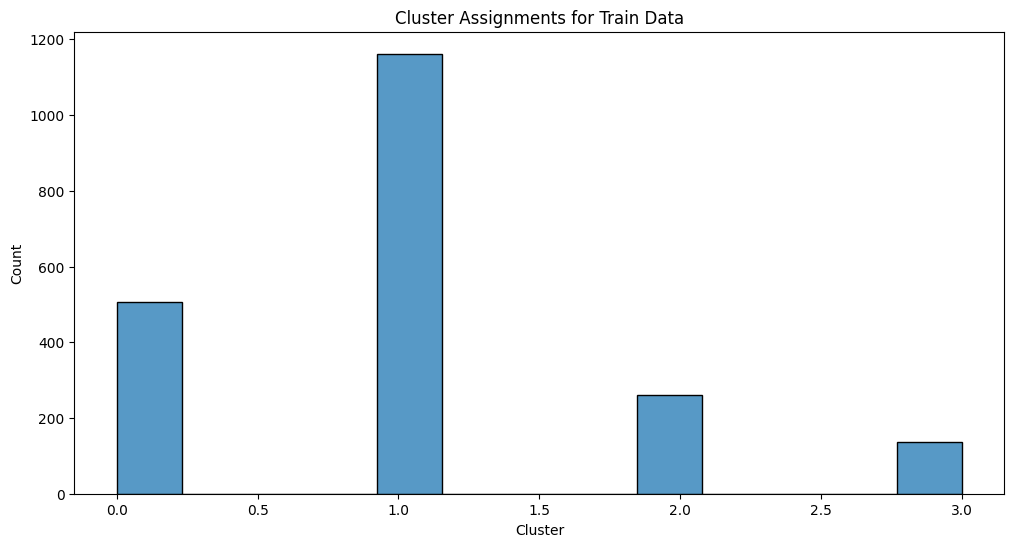

In [62]:
# Predict the cluster assignment for each data point
cluster_assignments = bgmm_4cl.predict(X)
# Visualize the cluster assignments
plt.figure(figsize=(12, 6))
sns.histplot(list(cluster_assignments), palette='viridis')
plt.title('Cluster Assignments for Train Data')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [65]:
clusters_df = pd.DataFrame(cluster_assignments, columns = ['cluster'])
bmm_df = X
bmm_df['cluster'] = cluster_assignments
bmm_df['class'] = y_train.values
df_cluster_3 = bmm_df[bmm_df['cluster'] == 1 ]
len(df_cluster_3[df_cluster_3['class'] == 1])

32

It is evident that despite the fact that in the first cluster there are a lot of observations, only 32 of them were assigned class 1, making this cluster less suspectable to depict high-probability of hazard during the next shift

## Bayesian Gaussian Mixture Model for sampling additional data of imbalanced class to add into classification

In [ ]:
# There is a subset of train dataset to allocate the data related to the imbalanced class

In [46]:
X_train_subset = X_train.copy()
X_train_subset['class'] = y_train.values
X_train_subset = X_train_subset[X_train_subset['class'] == 1]
X_train_subset = X_train_subset.iloc[:,:-1]
X_train_subset

nbumps  scaled_energy  nbumps3  scaled_gpuls  nbumps4  seismic_enc_0  \
7        6.0       9.966509      3.0      7.351158      0.0            0.0   
13       1.0       6.685861      0.0      8.056744      0.0            0.0   
24       3.0      11.156265      2.0      7.521859      1.0            1.0   
73       3.0       8.748464      2.0      4.897840      0.0            1.0   
97       4.0       8.732466      2.0      5.950643      0.0            1.0   
...      ...            ...      ...           ...      ...            ...   
1999     1.0       8.517393      1.0      4.234107      0.0            0.0   
2008     1.0       6.552508      0.0      5.860786      0.0            0.0   
2026     2.0       6.803505      0.0      6.473891      0.0            1.0   
2041     2.0       6.803505      0.0      7.759614      0.0            1.0   
2052     3.0       9.179984      2.0      6.621406      0.0            0.0   

      scaled_gdenergy  nbumps5  scaled_genergy  shift_enc_0  ghazard_enc_0  \
7            0.032679      0.0       13.264210          0.0            0.0   
13          -0.166565      0.0       13.349308          0.0            0.0   
24          -0.589959      0.0       12.827912          0.0            0.0   
73          -0.702034      0.0        9.246672          1.0            0.0   
97           1.041352      0.0       11.596807          0.0            0.0   
...               ...      ...             ...          ...            ...   
1999         0.705128      0.0        8.931948          1.0            0.0   
2008        -0.826561      0.0       11.754773          0.0            0.0   
2026         0.742486      0.0       10.721724          0.0            1.0   
2041        -0.017132      0.0       13.320591          0.0            0.0   
2052        -0.104301      0.0       12.858997          1.0            0.0   

      seismoacoustic_enc_0  nbumps2  
7                      1.0      3.0  
13                     0.0      1.0  
24                     0.0      0.0  
73                     1.0      1.0  
97                     1.0      2.0  
...                    ...      ...  
1999                   0.0      0.0  
2008                   0.0      1.0  
2026                   1.0      2.0  
2041                   0.0      2.0  
2052                   0.0      1.0  

[136 rows x 13 columns]

In [67]:
X = X_train_subset
#dangerous states clusters

Bgmm_danger = BayesianGaussianMixture(n_components=10, covariance_type='diag',
                               weight_concentration_prior=0.15, max_iter=1000)


Bgmm_danger.fit(X)

# Predict the probabilities of each component (cluster)
probs = Bgmm_danger.predict_proba(X)

# Summarize the results to see the distribution across clusters
results = np.sum(probs, axis=0)
results_df = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1, 11))

print(results_df)


    # of individuals
1                2.0
2               32.0
3               12.0
4                1.0
5                9.0
6               23.0
7               14.0
8               18.0
9               22.0
10               3.0


Sampling additional data points for minority class, using all the features simultaneously.

In [ ]:
# Based on the clustering here I sample additional data for imbalanced class =1

0


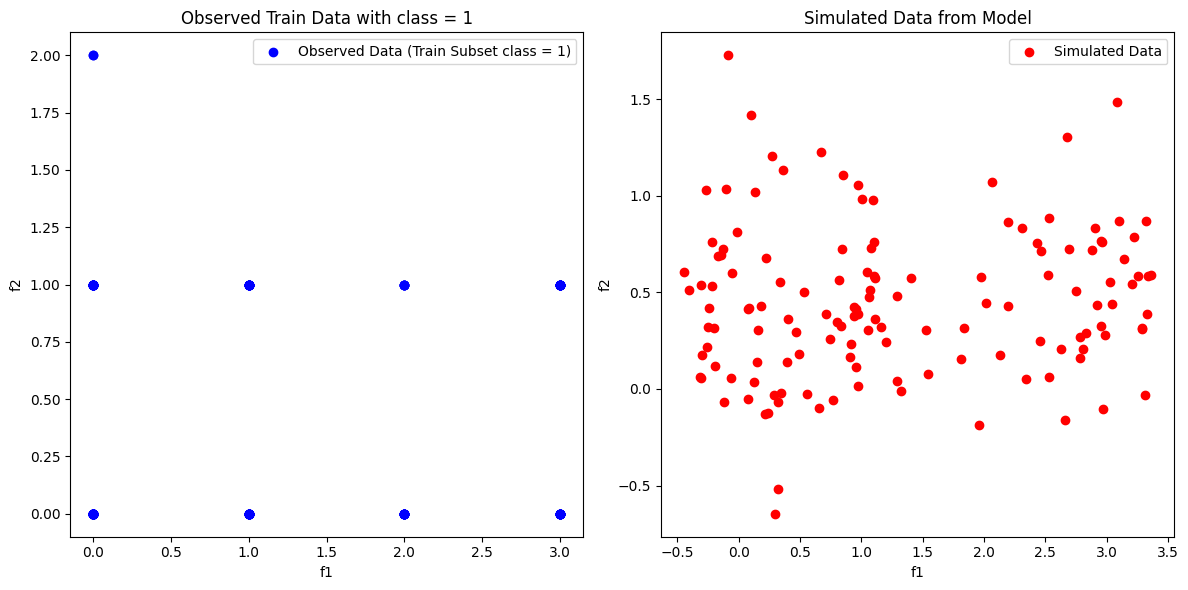

1


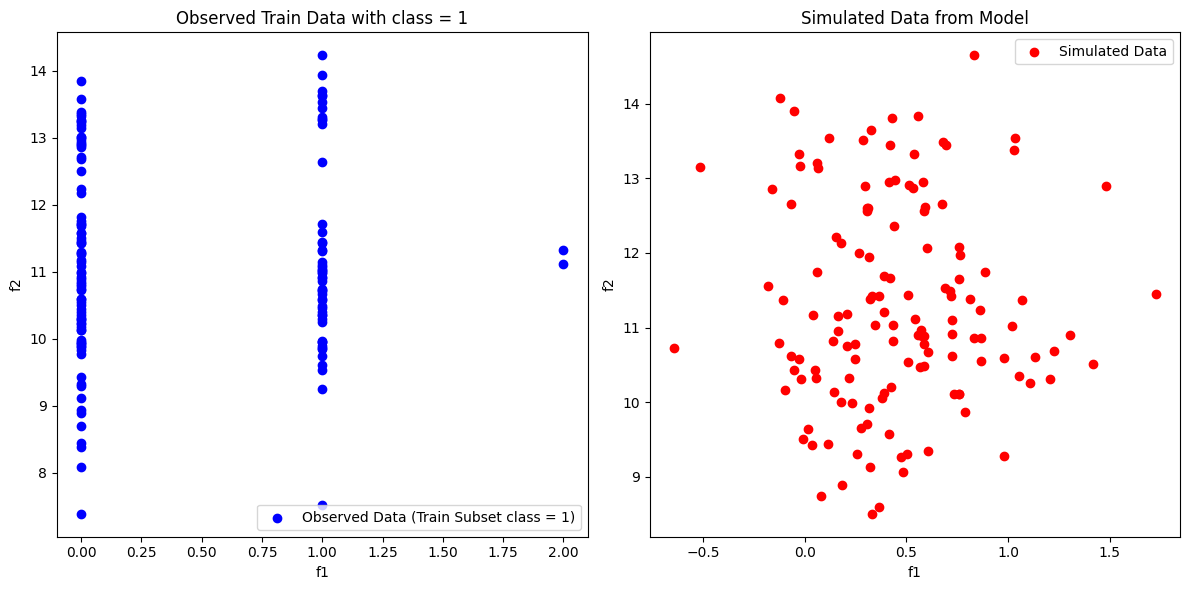

2


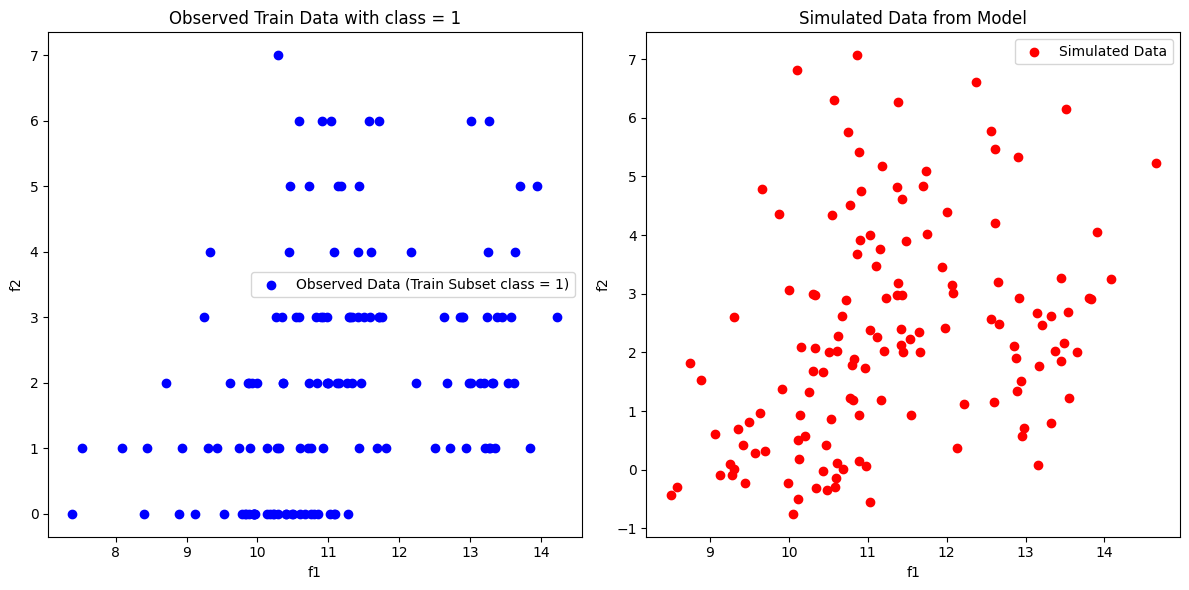

3


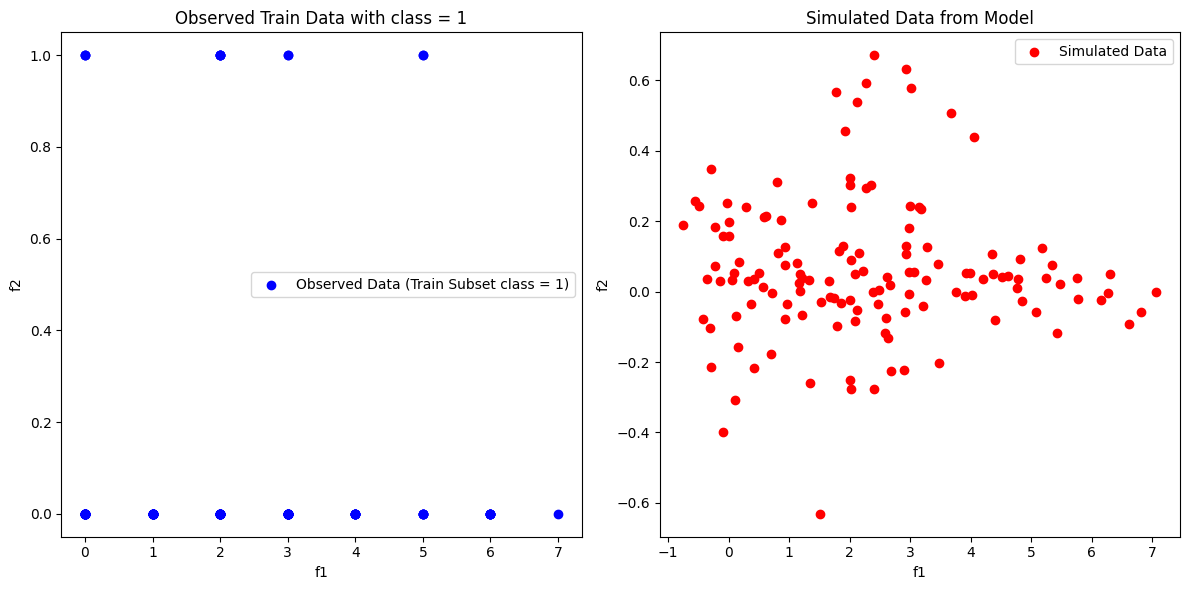

4


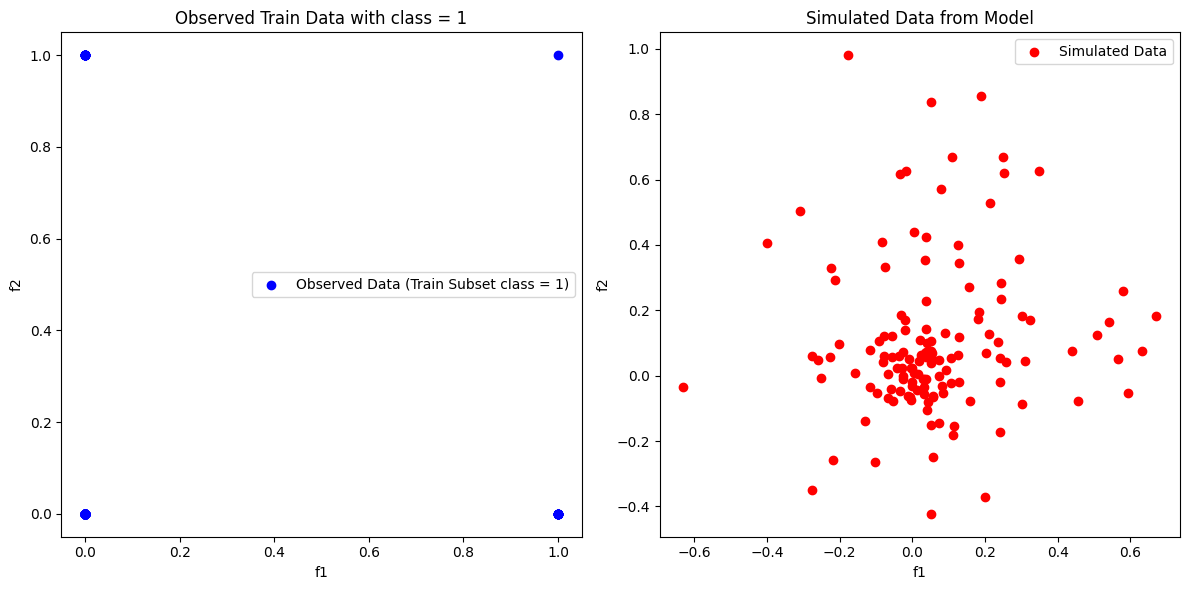

5


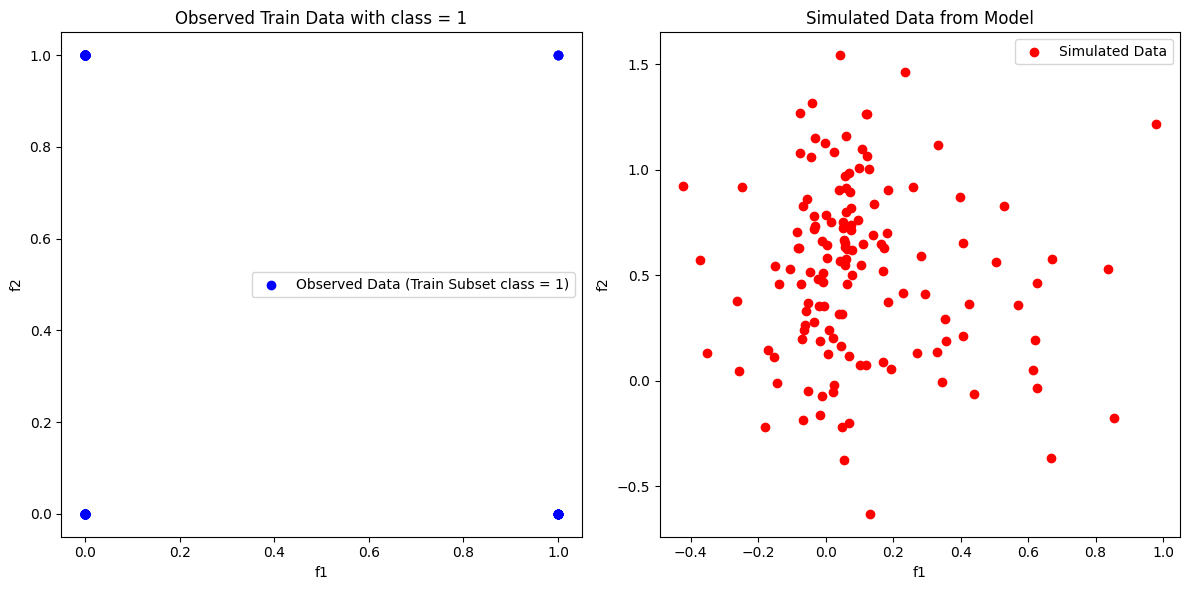

6


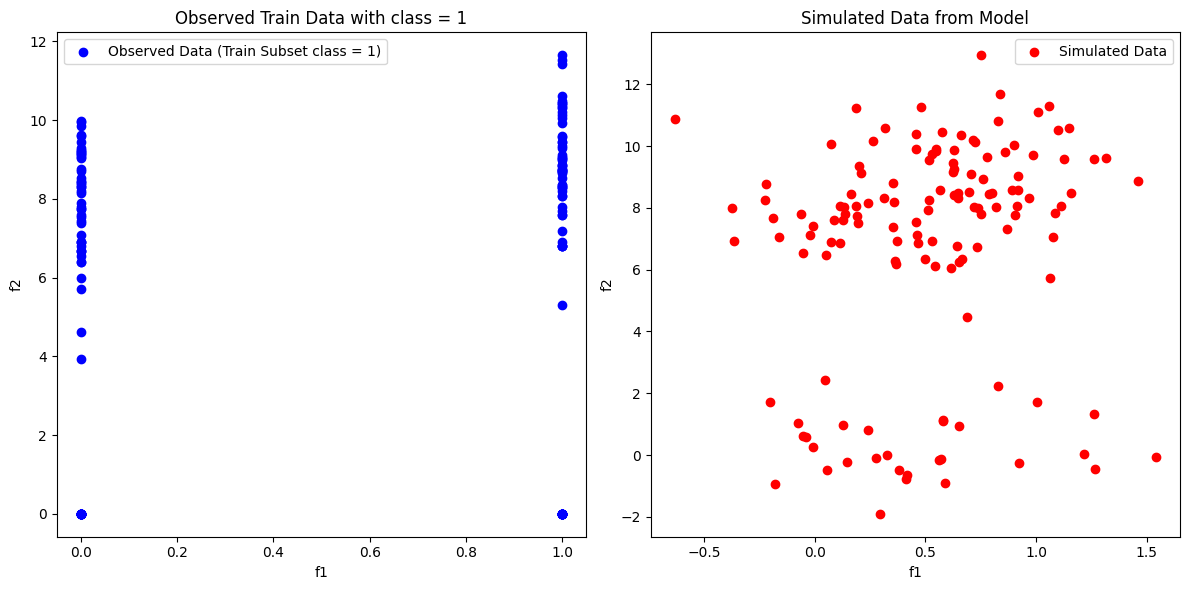

7


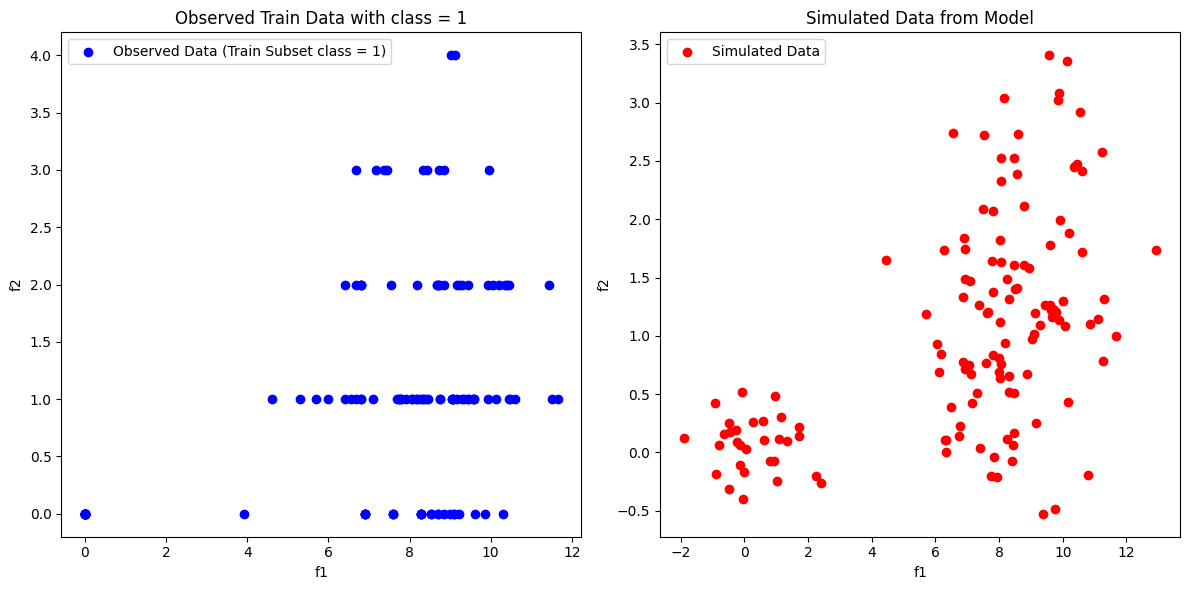

8


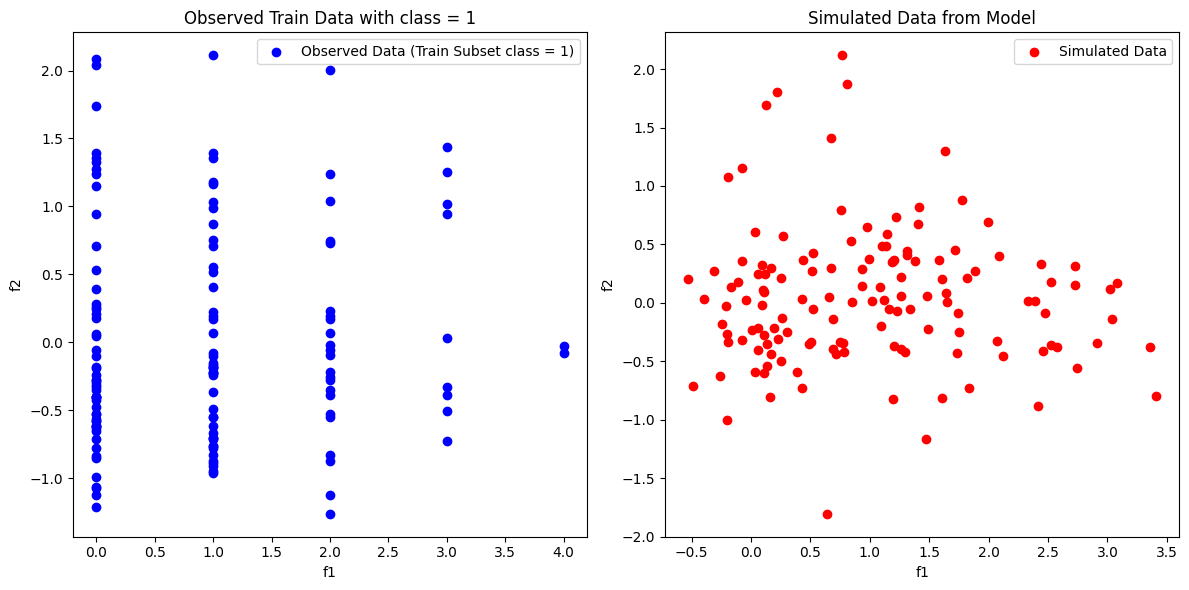

9


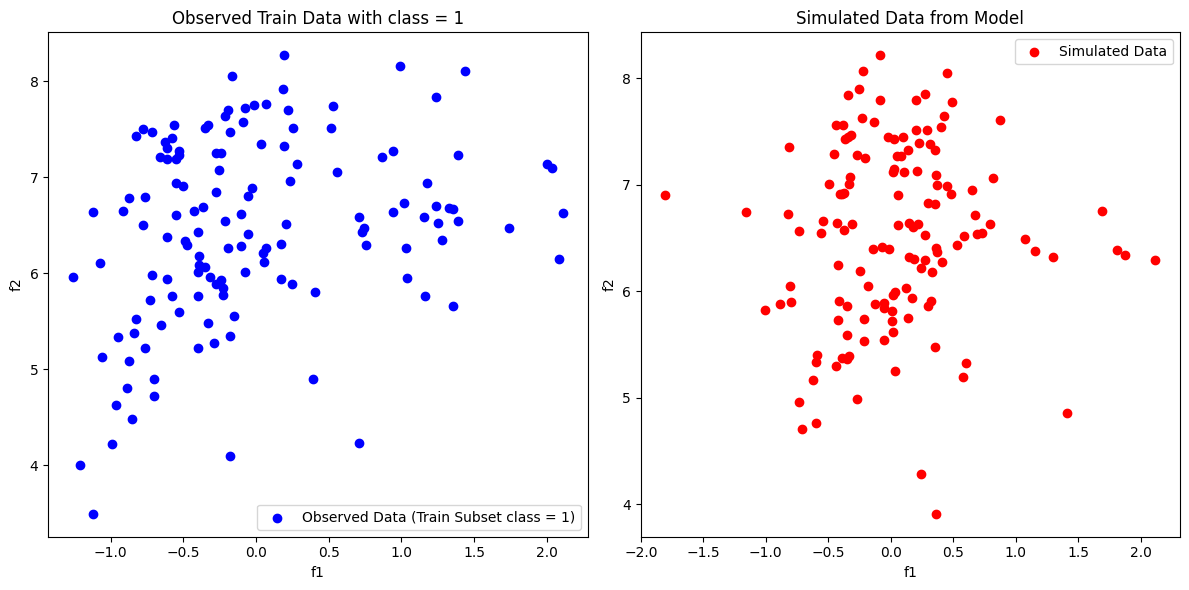

10


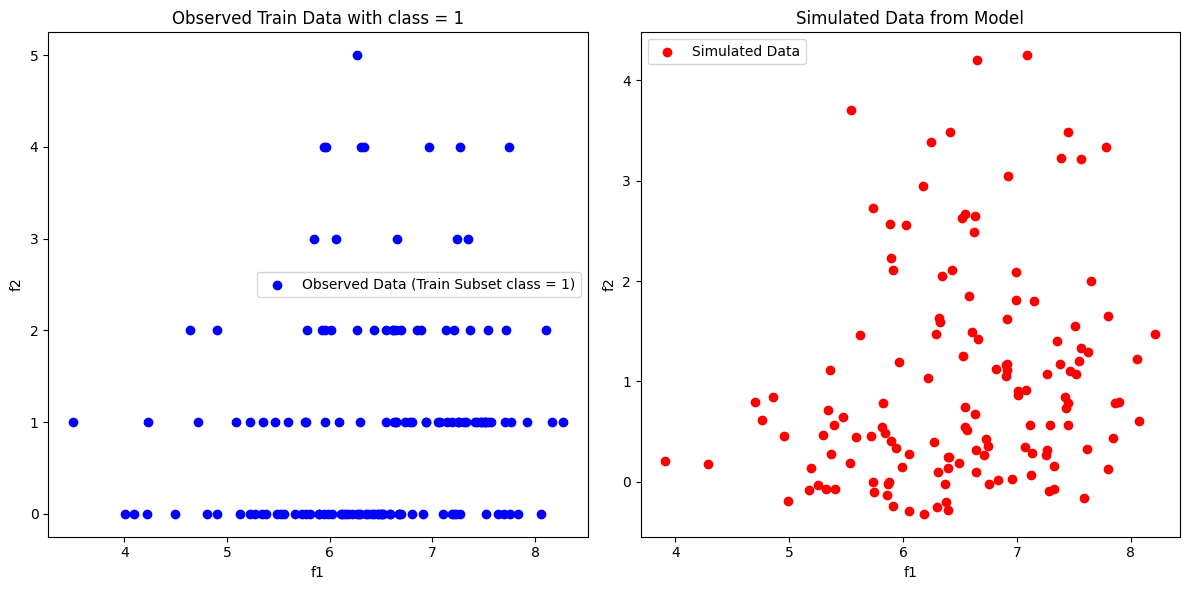

11


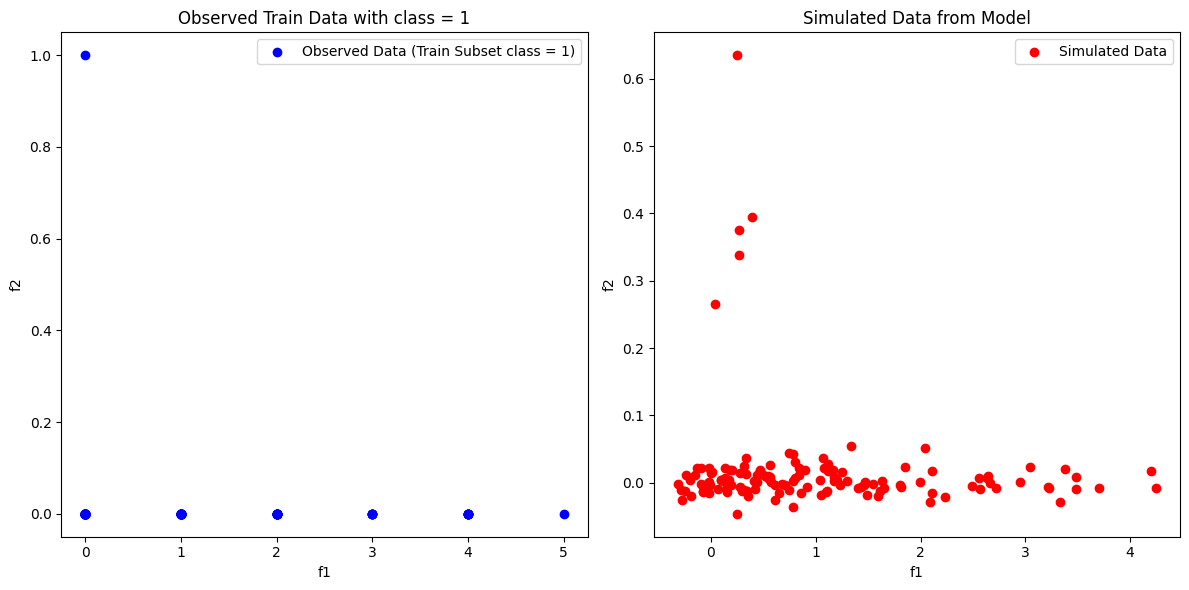

12


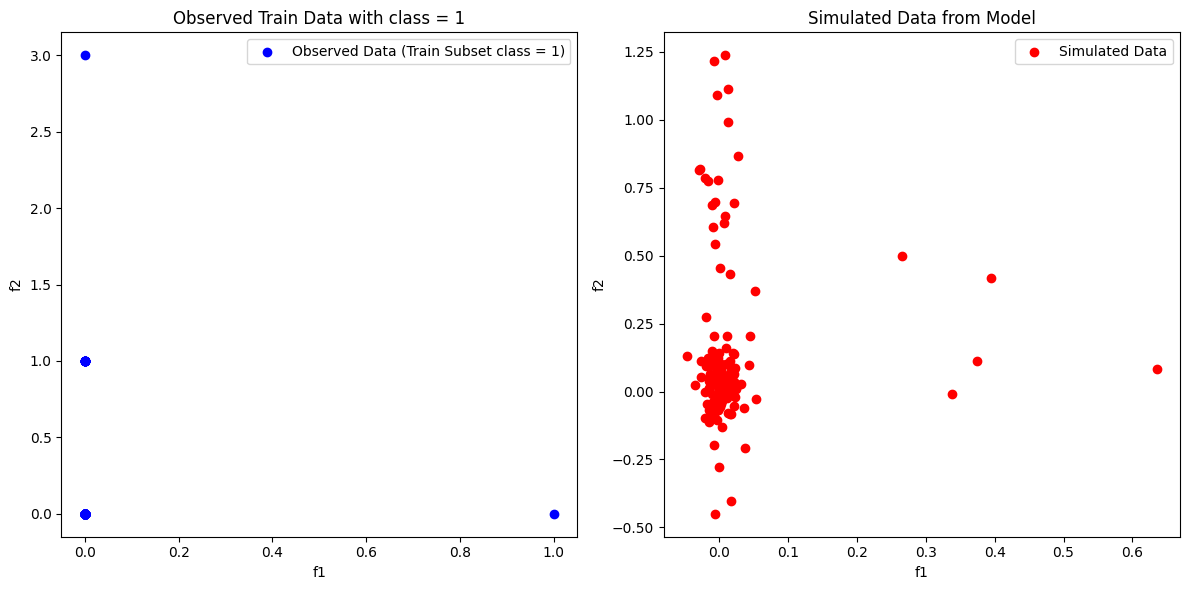

Observed Data Mean: seismoacoustic_numeric     0.411765
scaled_genergy            11.135153
nbumps                     2.051471
ghazard_numeric            0.088235
shift_numeric              0.125000
seismic_numeric            0.507353
scaled_energy              6.454782
nbumps2                    0.933824
scaled_gdenergy           -0.010173
scaled_gpuls               6.453022
nbumps3                    0.985294
nbumps5                    0.007353
nbumps4                    0.117647
cluster                    1.044118
dtype: float64
Simulated Data Mean: [ 0.44810747 11.27891039  2.28800682  0.06062842  0.10337647  0.51664533
  6.69657106  0.99718743  0.04071292  6.51791499  0.99258928  0.01704729
  0.13872019  1.28912963]
Observed Data Variance: seismoacoustic_numeric     0.271626
scaled_genergy             2.069213
nbumps                     3.034115
ghazard_numeric            0.080450
shift_numeric              0.109375
seismic_numeric            0.249946
scaled_energy             14

In [68]:
# Generate new data points from the model
X_simulated = Bgmm_danger.sample(n_samples=len(X_train_subset))[0]  # Generate 100 new data points

for i in range (13):

    print(i)
    # Visualization to compare observed and simulated data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_subset.iloc[:, i-1], X_train_subset.iloc[:, i], c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_simulated[:, i-1], X_simulated[:,i], c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.legend()

    plt.tight_layout()
    plt.show()

# You could also compare summary statistics such as the mean and variance
print("Observed Data Mean:", np.mean(X_train_subset, axis=0))
print("Simulated Data Mean:", np.mean(X_simulated, axis=0))
print("Observed Data Variance:", np.var(X_train_subset, axis=0))
print("Simulated Data Variance:", np.var(X_simulated, axis=0))

In [69]:
X_simulated_for_classification = X_simulated.copy()

0


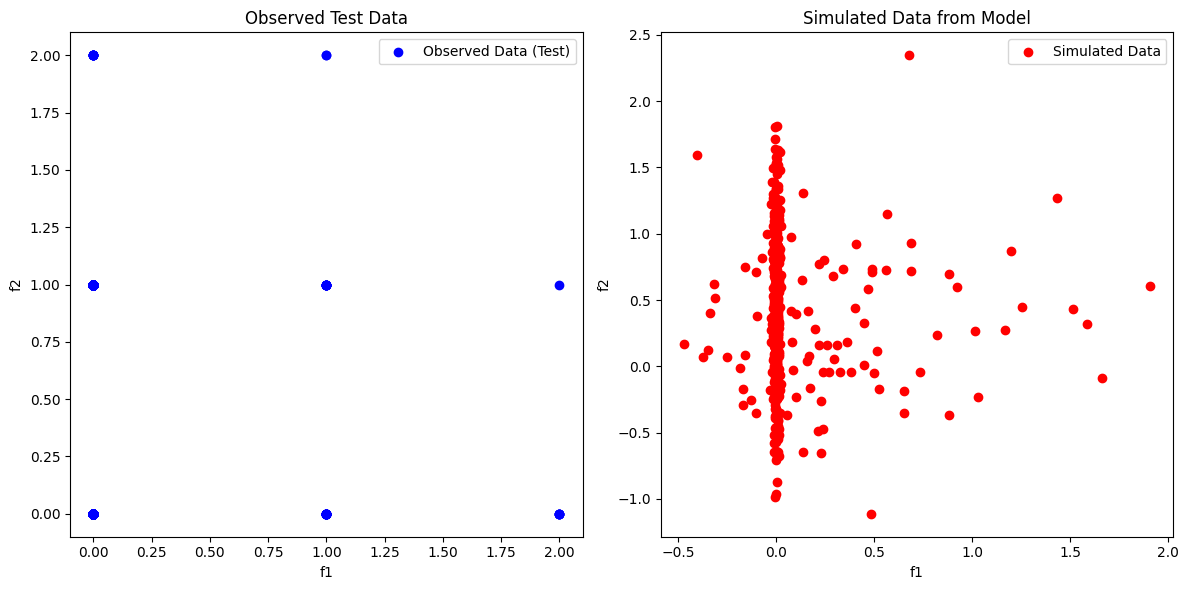

1


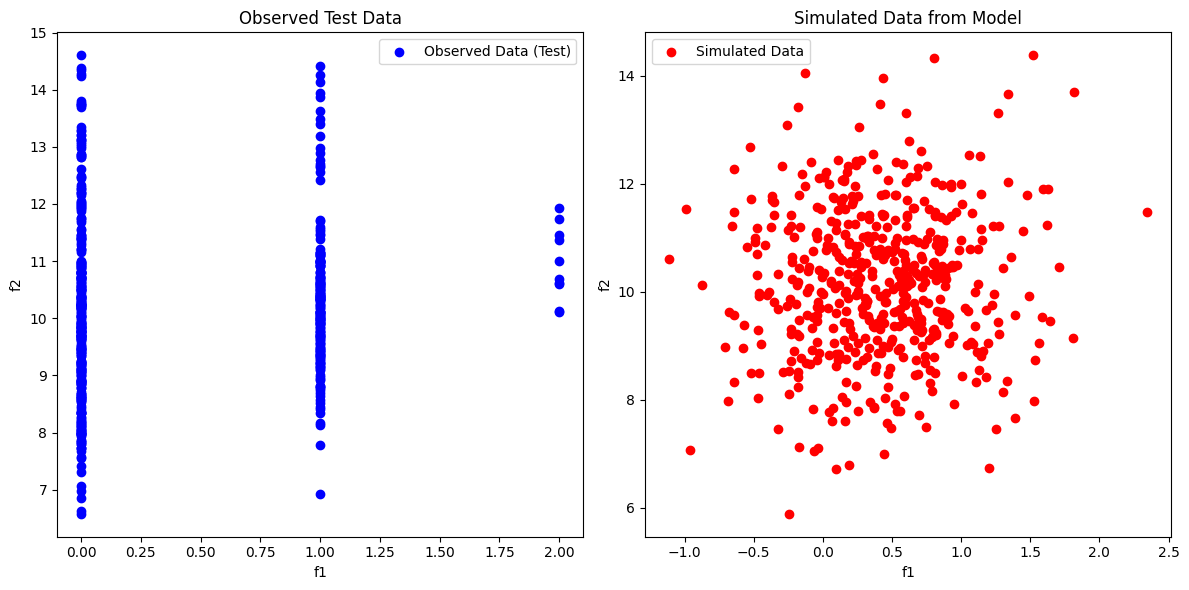

2


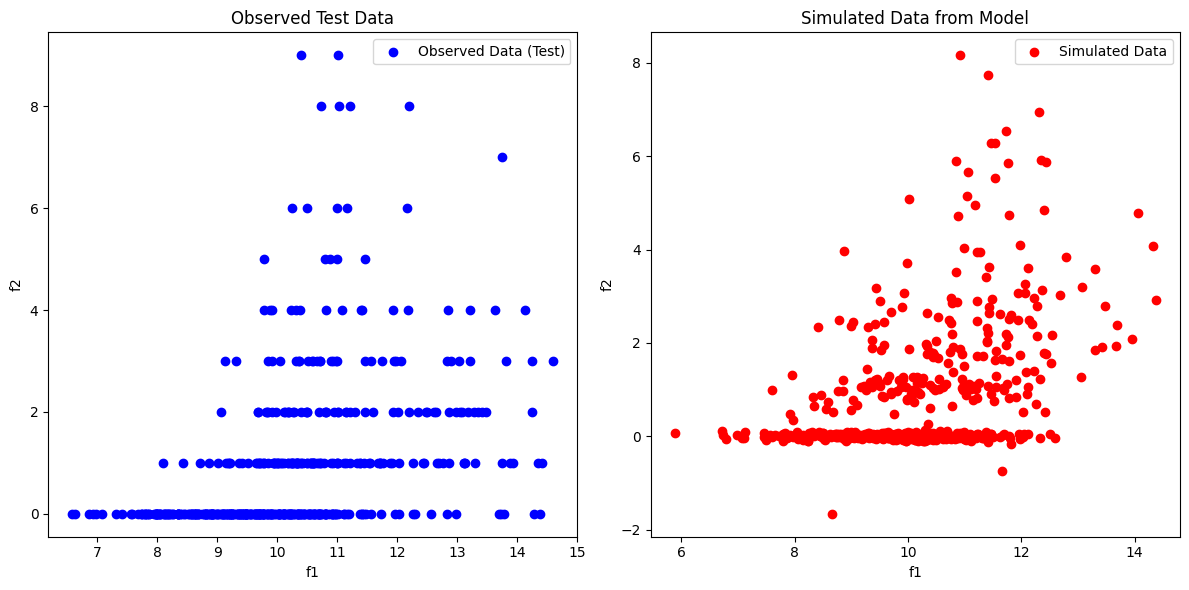

3


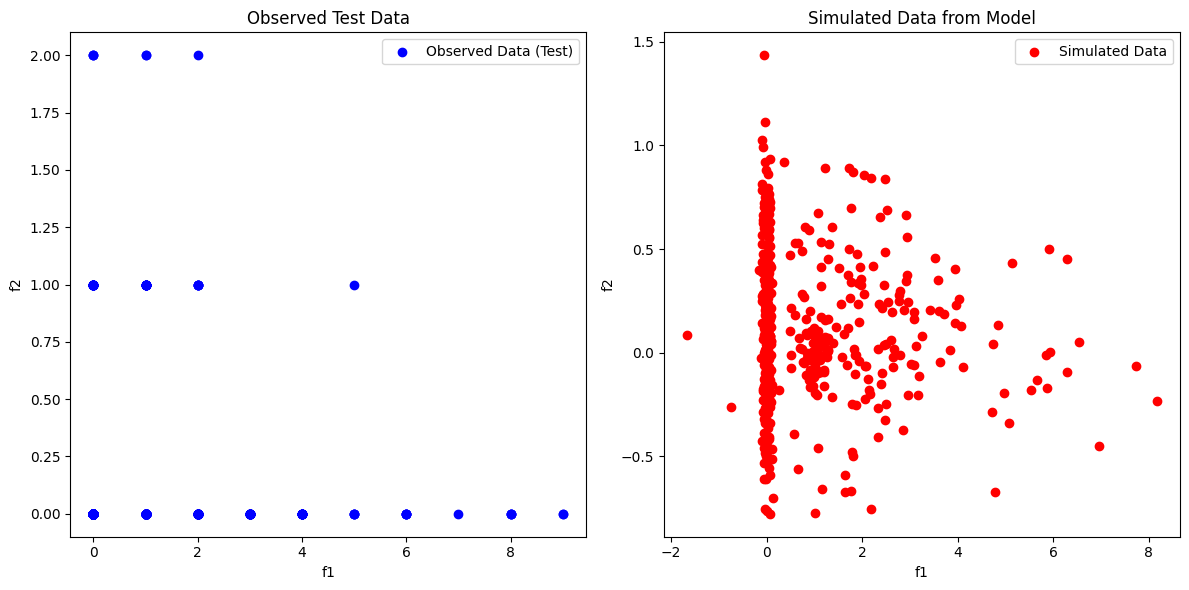

4


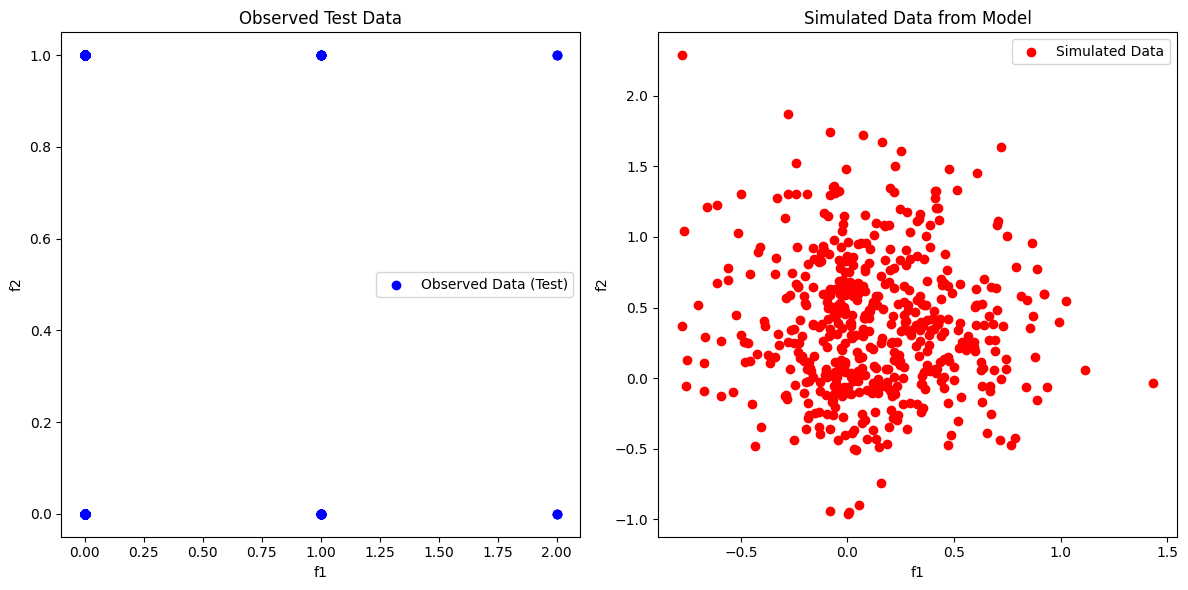

5


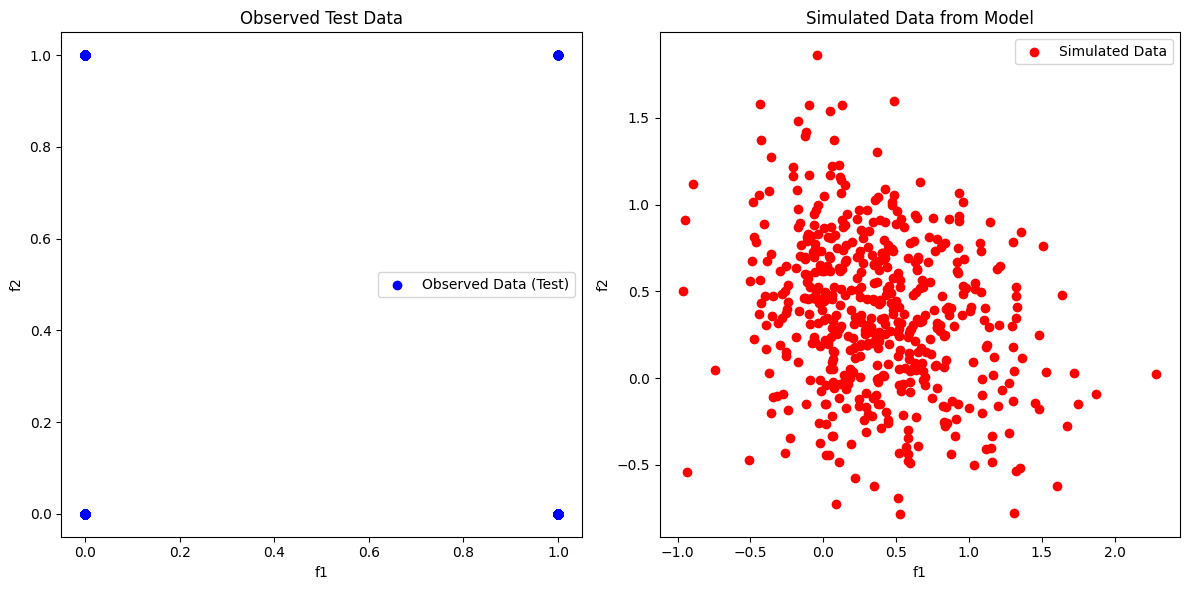

6


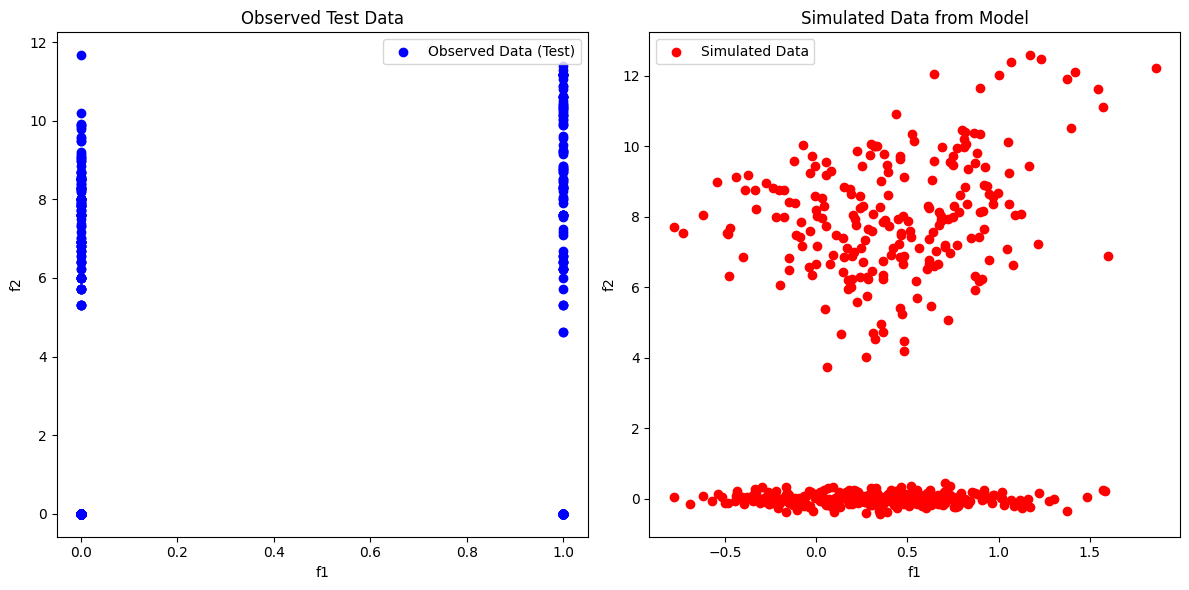

7


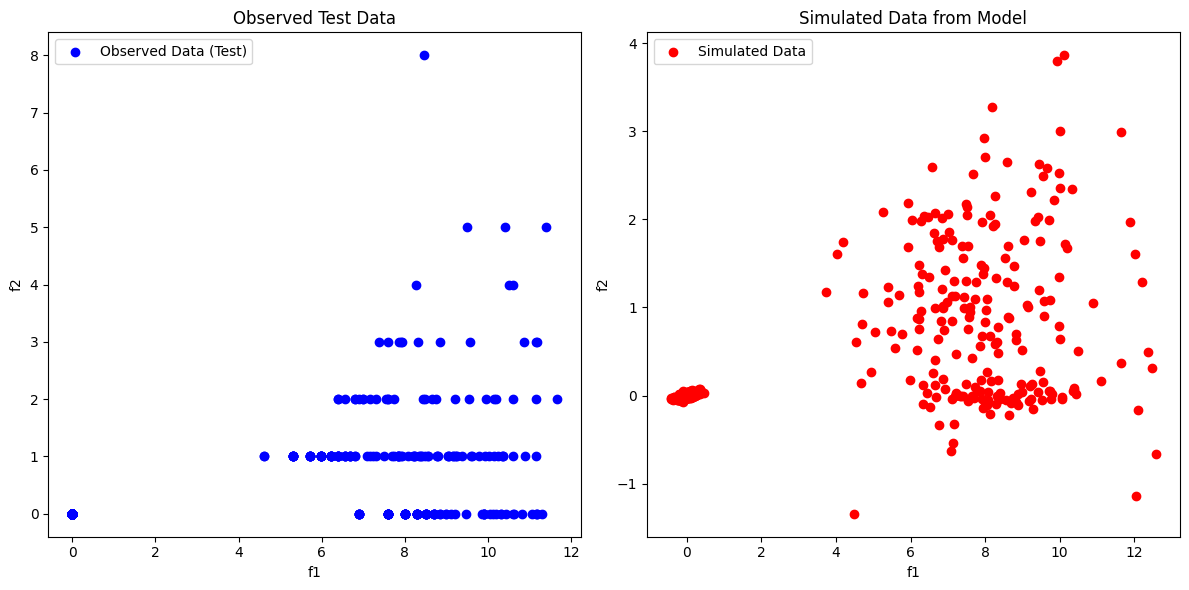

8


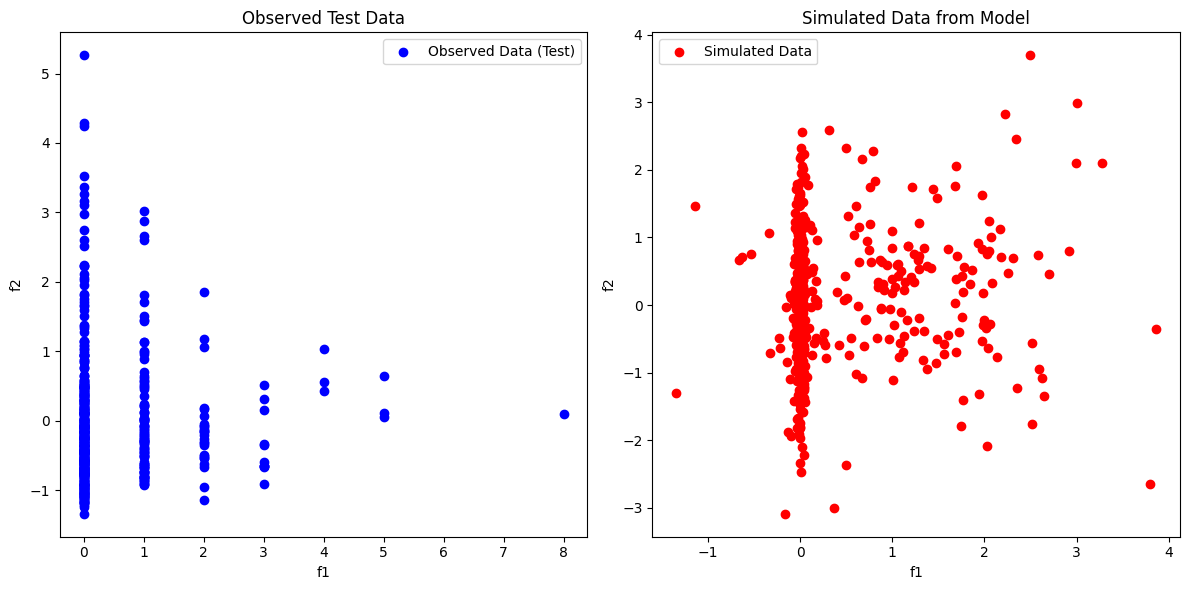

9


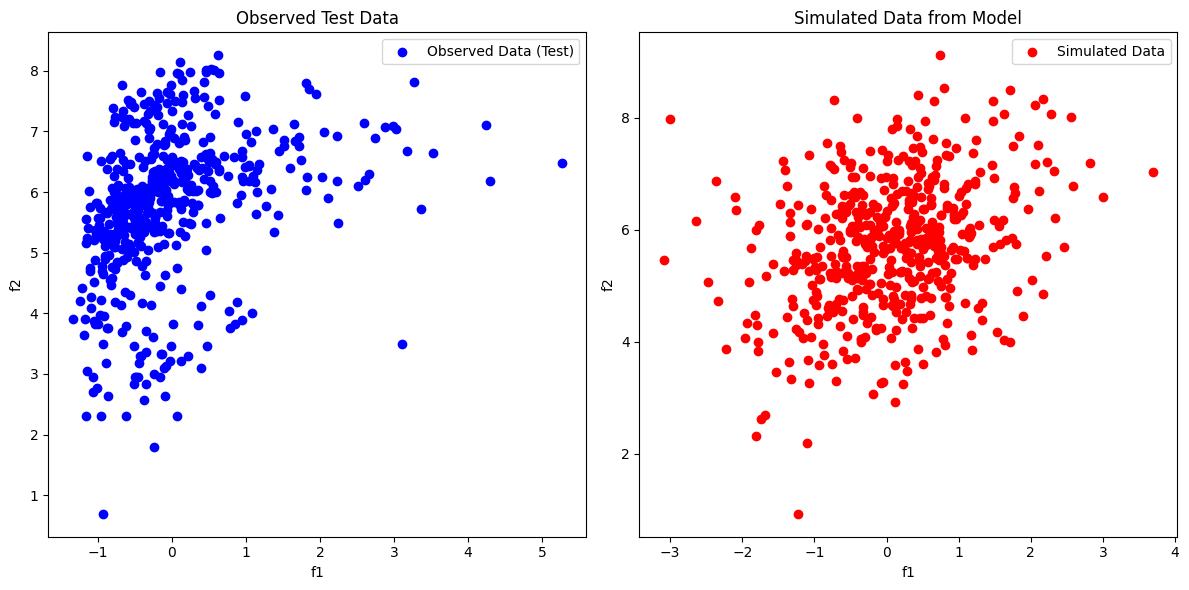

10


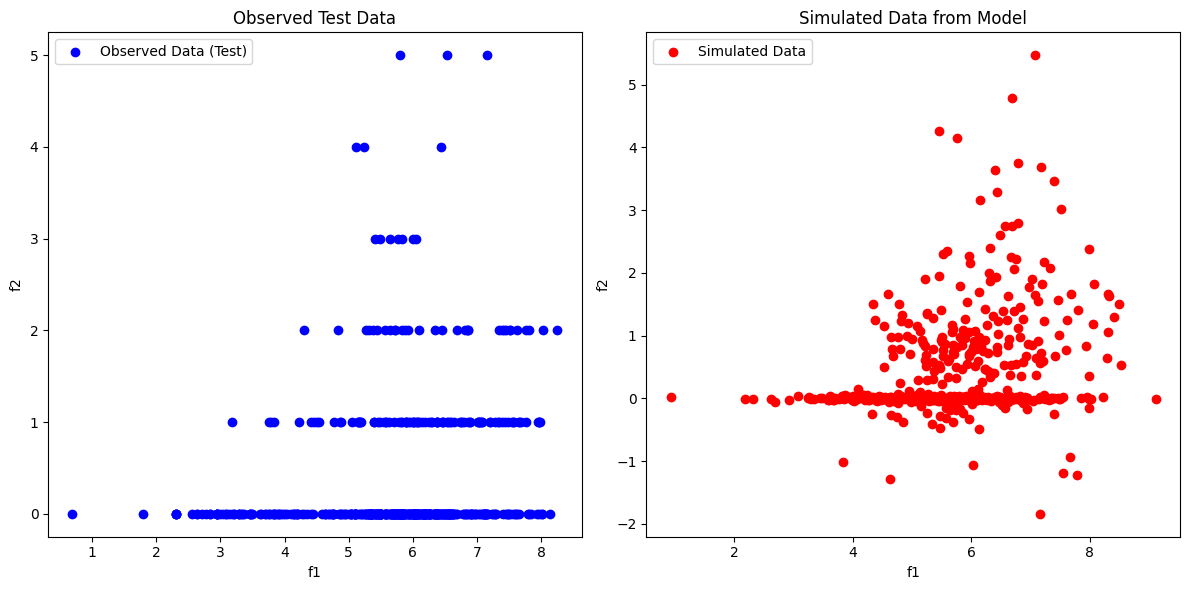

11


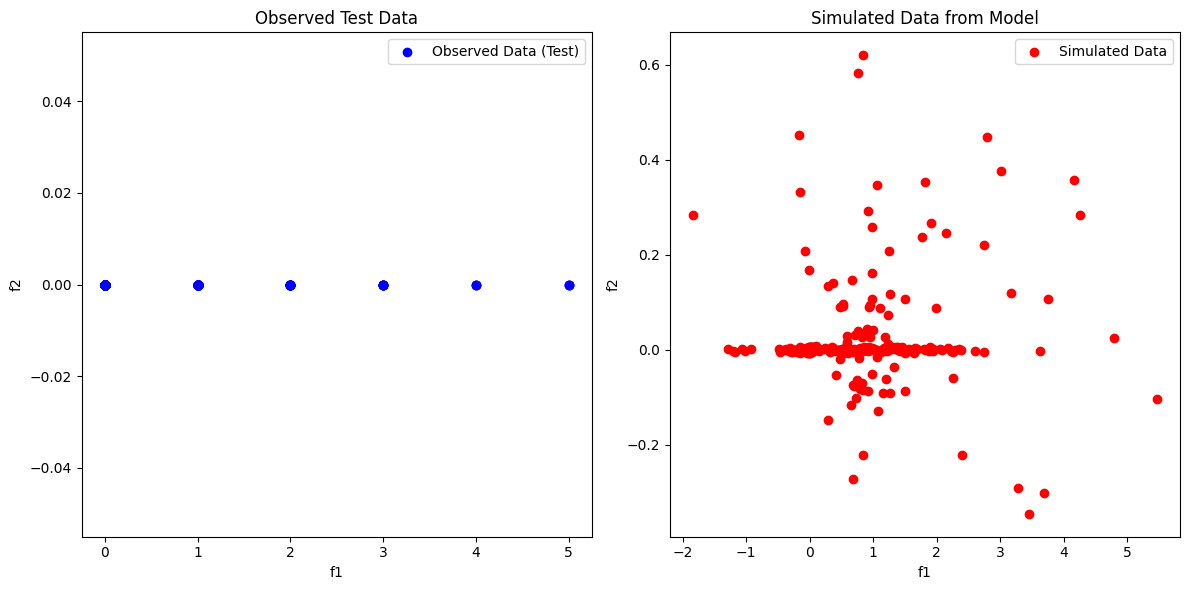

12


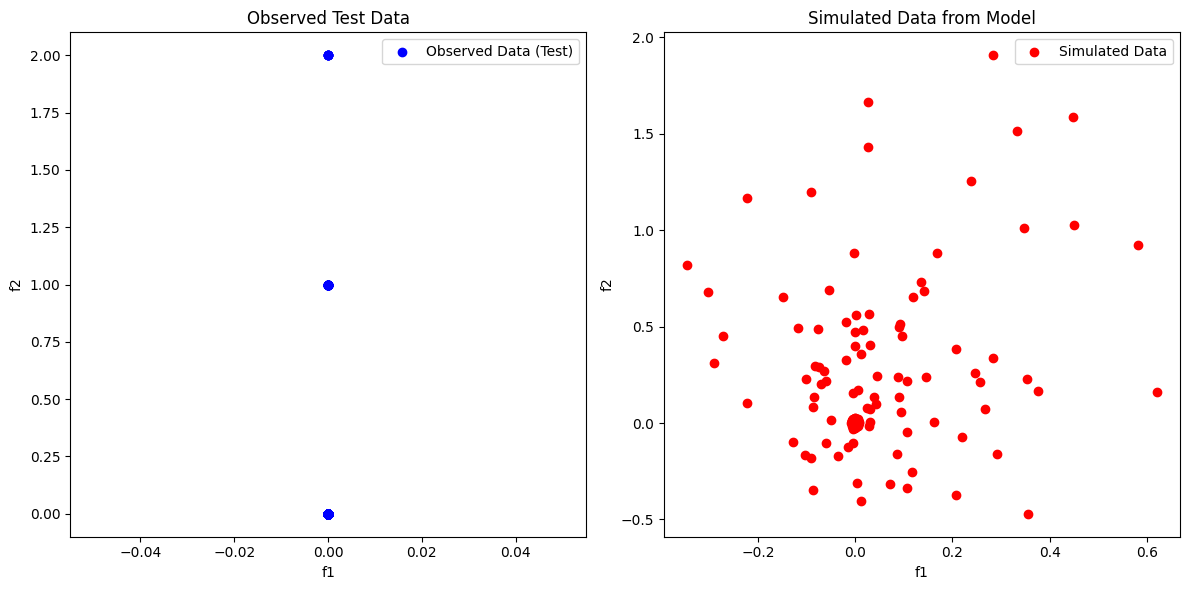

Observed Data Mean: seismoacoustic_numeric     0.398453
scaled_genergy            10.197937
nbumps                     0.909091
ghazard_numeric            0.106383
shift_numeric              0.381044
seismic_numeric            0.350097
scaled_energy              3.393571
nbumps2                    0.419729
scaled_gdenergy           -0.033631
scaled_gpuls               5.764410
nbumps3                    0.396518
nbumps5                    0.000000
nbumps4                    0.092843
dtype: float64
Simulated Data Mean: [ 0.41170825 10.15873526  0.86462831  0.1234181   0.37027652  0.37097647
  3.43798567  0.3874957   0.05615652  5.70594133  0.40836199  0.01036561
  0.05839038]
Observed Data Variance: seismoacoustic_numeric     0.278373
scaled_genergy             2.187227
nbumps                     2.283805
ghazard_numeric            0.118276
shift_numeric              0.235850
seismic_numeric            0.227529
scaled_energy             17.232275
nbumps2                    0.765800
scal

In [72]:
# Generate new data points from the model
X_simulated_test = bgmm_4cl.sample(n_samples=len(X_test))[0]  # Generate 100 new data points

for i in range (13):

    print(i)
    # Visualization to compare observed and simulated data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_test.iloc[:, i-1], X_test.iloc[:, i], c='blue', label='Observed Data (Test)')
    plt.title('Observed Test Data')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_simulated_test[:, i-1], X_simulated_test[:,i], c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.legend()

    plt.tight_layout()
    plt.show()

# You could also compare summary statistics such as the mean and variance
print("Observed Data Mean:", np.mean(X_test, axis=0))
print("Simulated Data Mean:", np.mean(X_simulated_test, axis=0))
print("Observed Data Variance:", np.var(X_test, axis=0))
print("Simulated Data Variance:", np.var(X_simulated_test, axis=0))

# NBUMPS and SCALED_ENERGY

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


Lowest BIC:  -29462.520519702437
      spherical          tied          diag          full
1  21008.537826  16972.899169  18895.070100  16972.899169
2 -18667.886149  14014.713408 -18659.196327 -18875.940332
3 -19079.725040  12336.811706 -19545.945803 -19545.137759
4 -19489.135209  11414.425193 -25323.658464 -25300.406949
5 -19501.914928  10478.477996 -25311.001538 -27617.580632
6 -19545.776229   9663.499994 -28798.585468 -28811.689569
7 -19612.892590   9329.171747 -29462.520520 -28744.280244
8 -19611.570045   9212.536569 -29439.053892 -28741.645939


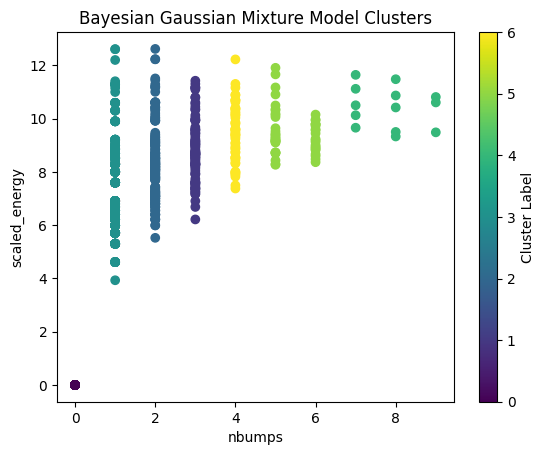

(array([0, 1, 2, 3, 4, 5, 6]), array([1173,  102,  195,  479,   13,   52,   53]))


In [ ]:
# Assuming df is your dataset
X = X_train[['nbumps', 'scaled_energy']]
lowest_bic = np.infty
best_gmm = None

# Define the range of components and types of covariance matrix to try
n_components_range = range(1, 9)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic_matrix = np.zeros((len(n_components_range), len(cv_types)))

for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)  # Calculate the BIC
        bic_matrix[j, i] = bic

        # Update the lowest BIC and corresponding best GMM
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

# Convert BIC matrix to a DataFrame for easier handling
bic_df = pd.DataFrame(bic_matrix, columns=cv_types, index=n_components_range)
print("Lowest BIC: ", lowest_bic)
print(bic_df)



# Predict probabilities and visualize the clustering
labels = best_gmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title('Bayesian Gaussian Mixture Model Clusters')
plt.xlabel('nbumps')  # Adjust label based on selected feature
plt.ylabel('scaled_energy')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()
print(np.unique(labels, return_counts=True))

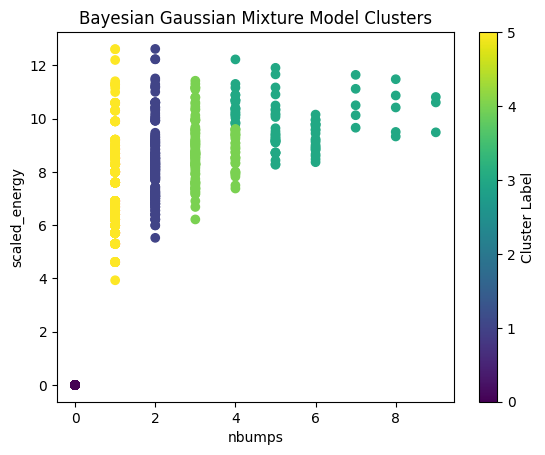

(array([0, 1, 3, 4, 5]), array([1173,  195,   86,  134,  479]))


In [ ]:
bgmm = BayesianGaussianMixture(n_components=8, covariance_type='diag',
                                  weight_concentration_prior=0.01, max_iter=200)
bgmm.fit(X)

labels = bgmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title('Bayesian Gaussian Mixture Model Clusters')
plt.xlabel('nbumps')
plt.ylabel('scaled_energy')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()
print(np.unique(labels, return_counts=True))

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 3, 4, 5]), array([1173,  195,   86,  134,  479]))

In [ ]:
new_labels = {
    4: 'Need to monitor',
    0: 'No risk',
    5: 'Stable',
    3: 'Hazardous',
    1: 'Moderate'
}

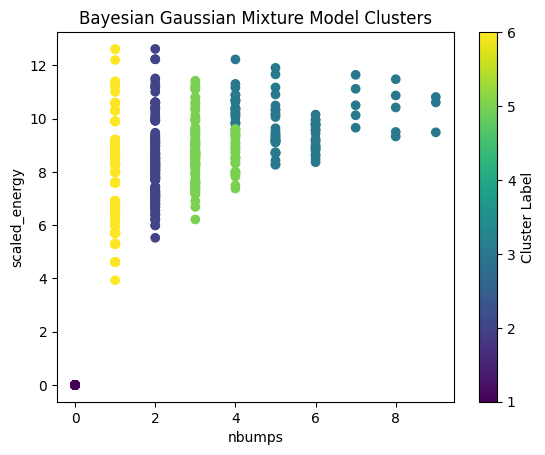

(array([1, 2, 3, 5, 6]), array([1173,  195,   86,  134,  479]))


In [ ]:
bgmm1 = BayesianGaussianMixture(n_components=8, covariance_type='diag',
                                  weight_concentration_prior=0.5, max_iter=1000)
bgmm1.fit(X)

labels1 = bgmm1.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels1, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title('Bayesian Gaussian Mixture Model Clusters')
plt.xlabel('nbumps')
plt.ylabel('scaled_energy')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()
print(np.unique(labels1, return_counts=True))

The clusters appear to be vertically aligned. The clusters are not overlapping much in the vertical direction, indicating good separation

In [ ]:
!pip install scikit-learn


It is also of importance to check the means of the clusters

Cluster Means:
     nbumps  scaled_energy
0  1.000000       5.953146
1  0.000000       0.000000
2  4.000000       9.278424
3  1.000000       7.910764
4  5.876452       9.688778
5  3.000000       8.600443
6  3.000000      10.957036
7  2.000000       8.324498


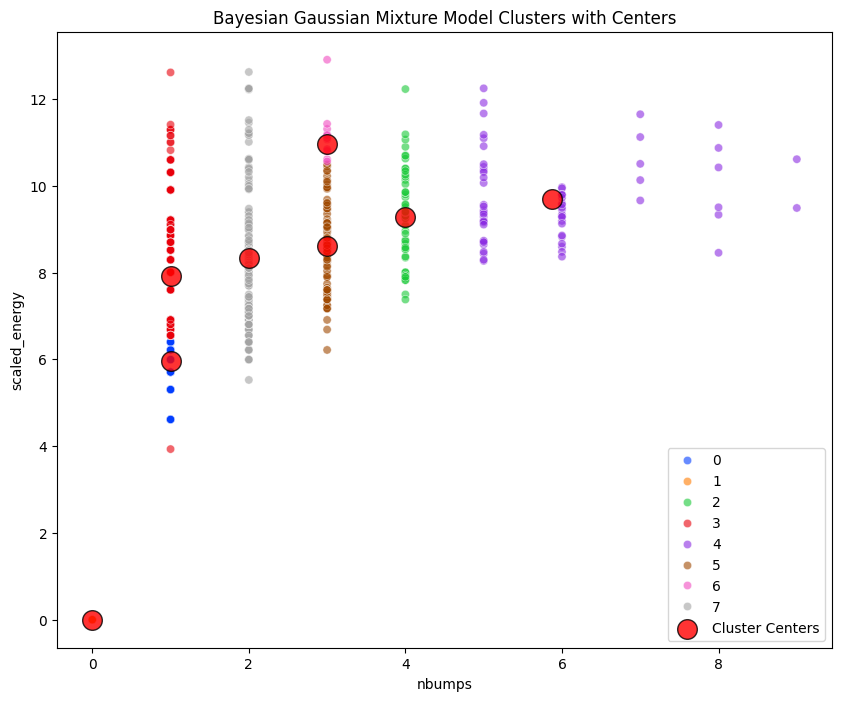

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture


# Retrieve the cluster means (centers) and covariances
cluster_means = bgmm.means_
cluster_means_df = pd.DataFrame(cluster_means, columns=['nbumps', 'scaled_energy'])
print("Cluster Means:")
print(cluster_means_df)
plt.figure(figsize=(10, 8))
palette = sns.color_palette("bright", 8)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm.predict(X), palette=palette, alpha=0.6)
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, edgecolor='black', label='Cluster Centers', alpha=0.8)

# Labels and title
plt.xlabel('nbumps')
plt.ylabel('scaled_energy')
plt.title('Bayesian Gaussian Mixture Model Clusters with Centers')

# Include legend
plt.legend()
plt.show()


# GENERGY  and GDENERGY
- genergy: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
- gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts;

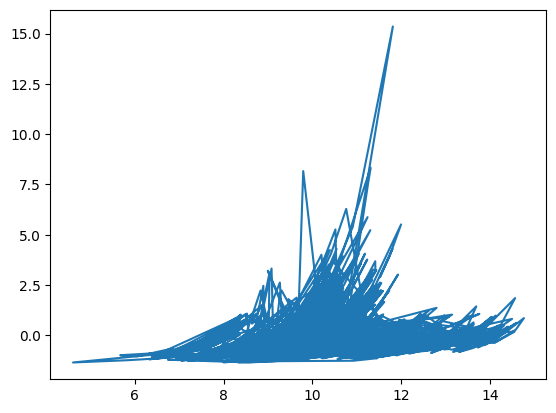

In [ ]:
plt.plot(df['scaled_genergy'], df['scaled_gdenergy']  )

Lowest BIC:  11147.333110957485
      spherical          tied          diag          full
1  13491.284297  13180.826862  13299.231454  13180.826862
2  12710.497622  13189.994934  12250.630096  12007.491595
3  12467.465552  12880.481549  11764.030212  11521.813846
4  11957.168446  12155.309499  11522.825971  11417.671261
5  11782.112662  12177.319344  11496.319424  11358.152098
6  11683.916776  11835.843856  11473.494931  11332.703352
7  11535.571976  11641.231844  11435.547150  11341.459274
8  11484.470910  11552.688373  11420.728040  11172.742907
9  11635.185702  11531.025569  11393.174336  11147.333111


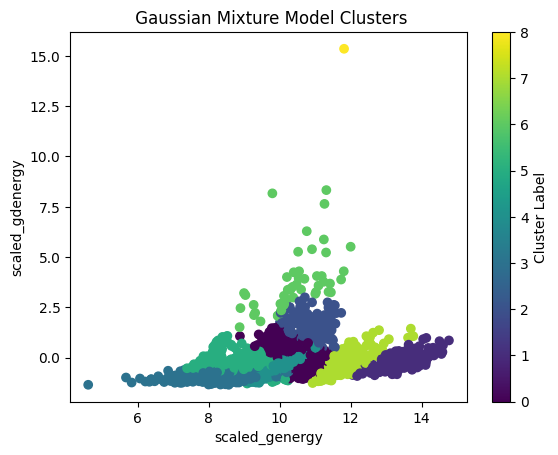

In [ ]:
X = X_train[['scaled_genergy', 'scaled_gdenergy']]
lowest_bic = np.infty
best_gmm = None
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic_matrix = np.zeros((len(n_components_range), len(cv_types)))
for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_matrix[j, i] = bic

        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

bic_df = pd.DataFrame(bic_matrix, columns=cv_types, index=n_components_range)
print("Lowest BIC: ", lowest_bic)
print(bic_df)
best_gmm.fit(X)

labels = best_gmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title(' Gaussian Mixture Model Clusters')
plt.xlabel('scaled_genergy')  # Adjust label based on selected feature
plt.ylabel('scaled_gdenergy')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()


n_components provides an upper bound on the number of clusters. While the model may choose to use fewer components based on the data and its parameters (like weight_concentration_prior), it cannot exceed this number.

When utilizing the Bayesian Gaussian Mixture Model (BGMM) from scikit-learn, several important parameters, including the `weight_concentration_prior` is used.

- **`weight_concentration_prior`:**
   -  alpha of the Dirichlet process in the BGMM context = controls the distribution and number of active mixture components.
   - A **higher `weight_concentration_prior`** value suggests a higher number of clusters as it implies a preference for more evenly distributed cluster weights
   - The choice of `weight_concentration_prior` can affect the convergence of the BGMM. If the prior is set too high or too low relative to what the data naturally suggests, the model may struggle to converge as it either attempts to fit too many unnecessary clusters or cannot adequately capture the complexity of the data with too few clusters.
  
   -  Highly consistent cluster assignments across different priors suggest that the chosen number of components is capturing a true structure in the data.



### 200 iterations

0.01


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


9 components
-2.60554102490193 log-likelihood
[0.07673917 0.04530281 0.17867777 0.1787862  0.05957104 0.12444919
 0.25534572 0.00437161 0.07675648]


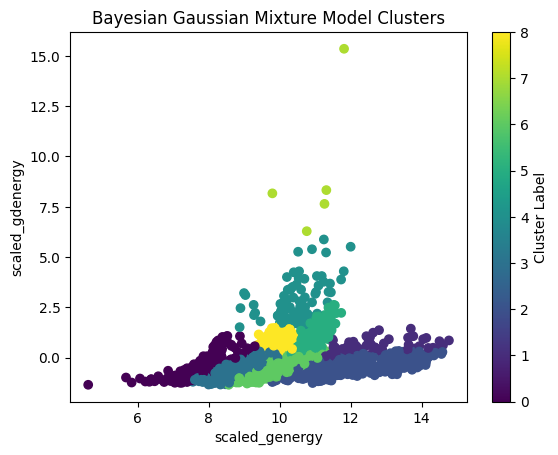

0.05
9 components
-2.6074240040444017 log-likelihood
[1.55031147e-01 2.42472656e-01 5.19368871e-02 9.21469177e-02
 1.48094531e-01 4.24723456e-02 2.64824791e-01 3.00098817e-03
 1.97361481e-05]


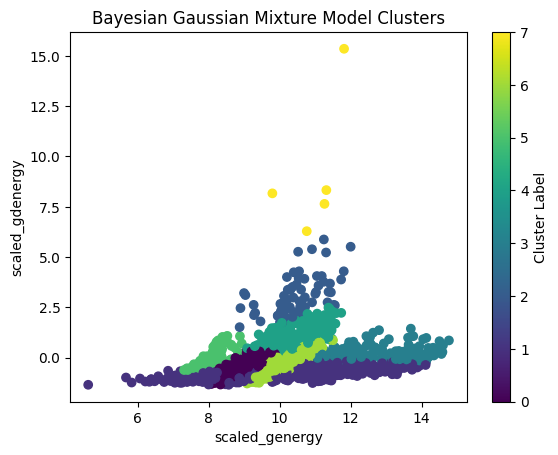

0.1


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


9 components
-2.608875432744651 log-likelihood
[0.04214063 0.067768   0.11873818 0.07596184 0.08371327 0.17630834
 0.00570679 0.25635845 0.17330449]


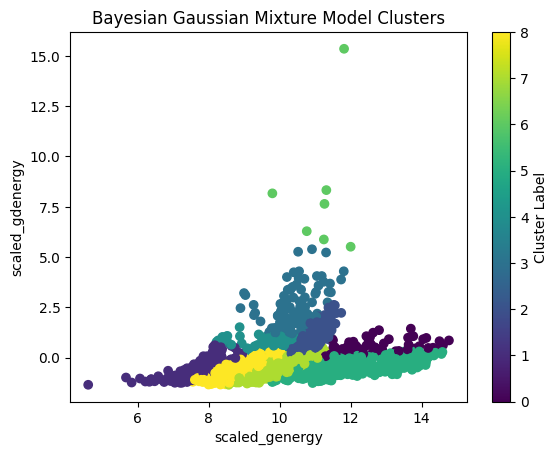

0.15


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


9 components
-2.596606725122456 log-likelihood
[0.22087754 0.09256977 0.12588485 0.04229523 0.16557408 0.0585972
 0.00457595 0.04128079 0.24834458]


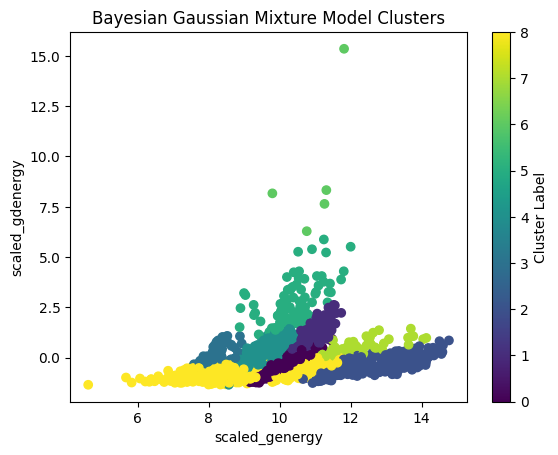

0.35
9 components
-2.5993677785681624 log-likelihood
[0.26241243 0.04594766 0.18233147 0.06617144 0.04638227 0.09475063
 0.00407452 0.13635079 0.1615788 ]


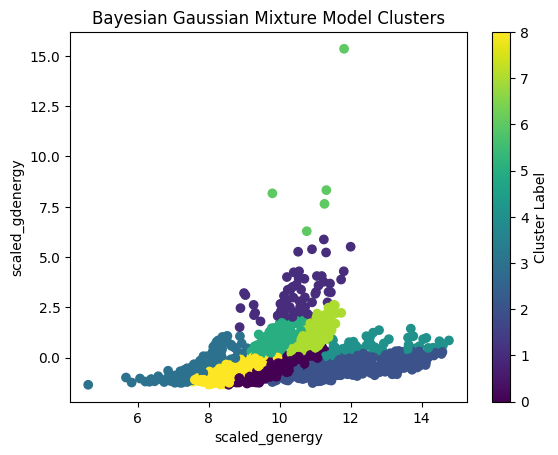

0.5


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


9 components
-2.6160731746400523 log-likelihood
[0.21614863 0.14033068 0.31826733 0.0629916  0.18191407 0.01242491
 0.03159052 0.03298361 0.00334867]


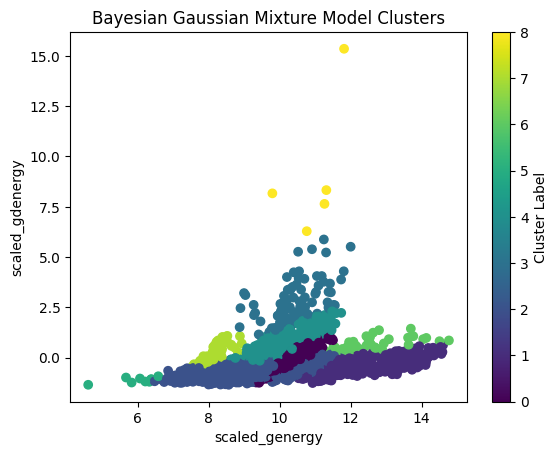

1


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


9 components
-2.600221752866748 log-likelihood
[0.0837578  0.04650399 0.06836093 0.18071618 0.13914695 0.26098017
 0.04880919 0.16857079 0.00315399]


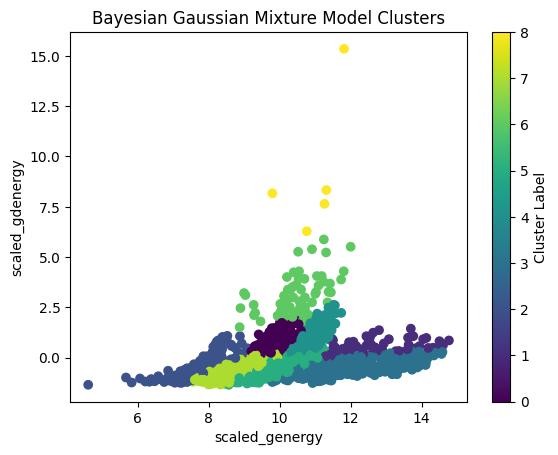

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

concentration_priors = [0.01, 0.05, 0.1, 0.15, 0.35, 0.5, 1]

for weight in concentration_priors:
    print(weight)
# Now we fit the Bayesian Gaussian Mixture Model
    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                  weight_concentration_prior=weight, max_iter=200)
    bgmm.fit(X)
    print(bgmm.n_components, 'components')
    print(bgmm.score(X), 'log-likelihood')
    print(bgmm.weights_)

    # Predict probabilities and visualize the clustering
    labels = bgmm.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
    plt.title('Bayesian Gaussian Mixture Model Clusters')
    plt.xlabel('scaled_genergy')  # Adjust label based on selected feature
    plt.ylabel('scaled_gdenergy')  # Adjust label based on selected feature
    plt.colorbar(label='Cluster Label')
    plt.show()




### 1000 iterations

0.01
[0.04341589 0.27606173 0.05619292 0.15589148 0.0070154  0.09949715
 0.13413247 0.0012459  0.22654706]
-2.6076278479780175 log-likelihood
9 components


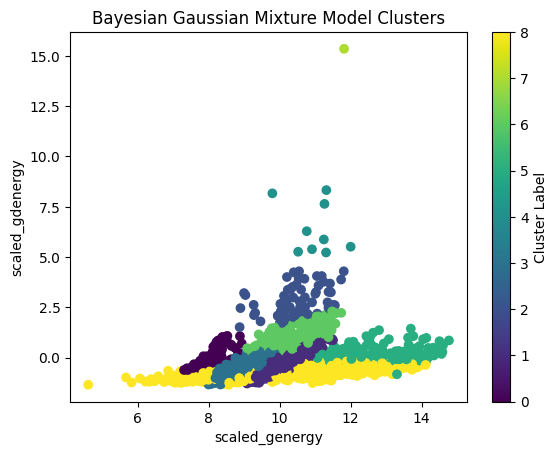

0.05
[0.32329647 0.19912738 0.12240999 0.06509344 0.00534321 0.03288866
 0.00051361 0.03271463 0.2186126 ]
-2.6160715415384383 log-likelihood
9 components


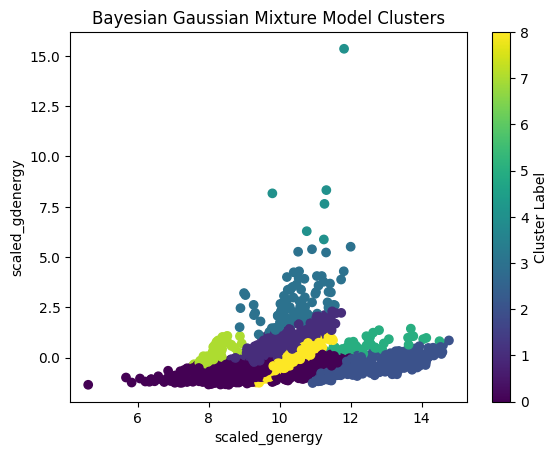

0.1
[0.14651874 0.1132937  0.09583059 0.10633637 0.0446132  0.24398121
 0.00406118 0.20539718 0.03996782]
-2.5864997387192585 log-likelihood
9 components


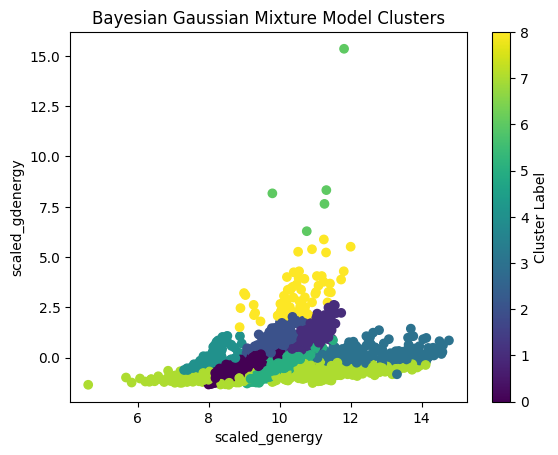

0.15
[2.43275349e-01 4.28423552e-02 5.35615799e-02 9.23954881e-02
 2.69719327e-01 4.17426547e-03 1.43468908e-01 1.50500215e-01
 6.25133183e-05]
-2.6073656542258354 log-likelihood
9 components


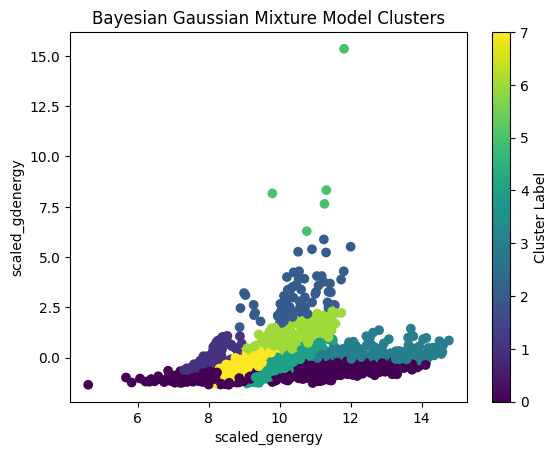

0.35
[0.22287313 0.17113013 0.12411979 0.09050707 0.03726535 0.25519604
 0.0047921  0.03669941 0.05741697]
-2.5944142215012573 log-likelihood
9 components


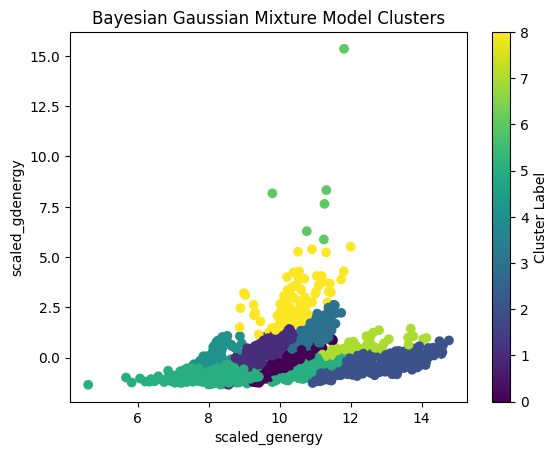

0.5
[0.32393298 0.1228366  0.19833557 0.0336438  0.06412259 0.00051475
 0.22050718 0.00493547 0.03117106]
-2.616361782830103 log-likelihood
9 components


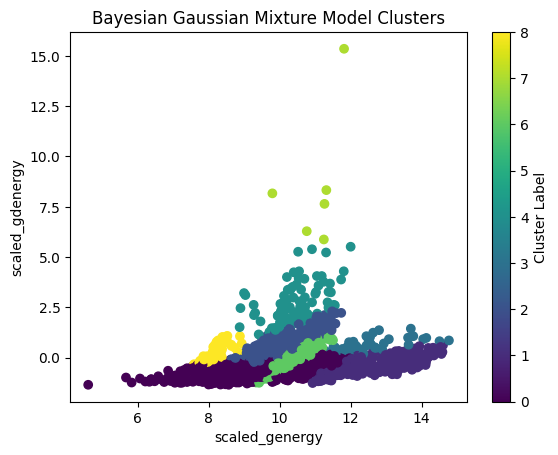

1
[0.23893862 0.20776921 0.10866024 0.00491135 0.03766172 0.15070591
 0.05963444 0.16289308 0.02882541]
-2.610113242843979 log-likelihood
9 components


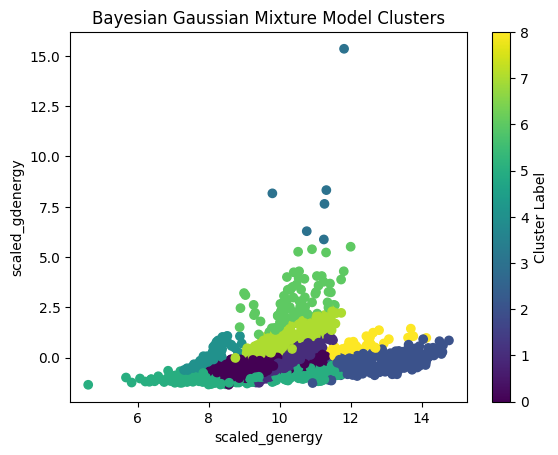

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

concentration_priors = [0.01, 0.05, 0.1, 0.15, 0.35, 0.5, 1]

for weight in concentration_priors:
    print(weight)
    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                  weight_concentration_prior=weight, max_iter=1000)
    bgmm.fit(X)
    print(bgmm.weights_)
    print(bgmm.score(X), 'log-likelihood')
    print(bgmm.n_components, 'components')


    labels = bgmm.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
    plt.title('Bayesian Gaussian Mixture Model Clusters')
    plt.xlabel('scaled_genergy')
    plt.ylabel('scaled_gdenergy')
    plt.colorbar(label='Cluster Label')
    plt.show()




Cluster Means:
   scaled_genergy  scaled_gdenergy
0        9.658080        -0.439850
1       10.501421         0.668022
2       13.008505         0.265158
3        8.894585        -0.907763
4       10.623738         1.762412
5       12.208889        -0.394264
6       10.421689        -0.011649
7        8.915494         0.025422
8       11.064864         5.581349


<ipython-input-75-042ad02afc05>:15: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm.predict(X), palette=palette, alpha=0.6)


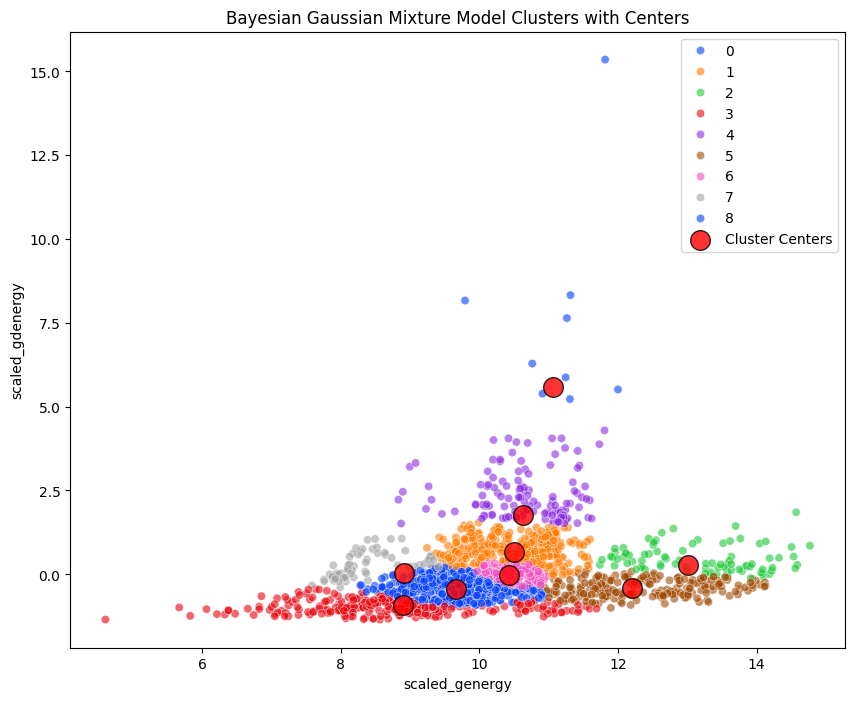

In [75]:
X = X_train[['scaled_genergy', 'scaled_gdenergy']]
bgmm = BayesianGaussianMixture(n_components=9, covariance_type='diag',
                                  weight_concentration_prior=0.15, max_iter=1000)
bgmm.fit(X)
cluster_means = bgmm.means_

cluster_means_df = pd.DataFrame(cluster_means, columns=['scaled_genergy', 'scaled_gdenergy'])

print("Cluster Means:")
print(cluster_means_df)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("bright", 8)

sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm.predict(X), palette=palette, alpha=0.6)

plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, edgecolor='black', label='Cluster Centers', alpha=0.8)

plt.xlabel('scaled_genergy')
plt.ylabel('scaled_gdenergy')
plt.title('Bayesian Gaussian Mixture Model Clusters with Centers')

# Include legend
plt.legend()
plt.show()

     scaled_genergy  scaled_gdenergy
0          9.740969        -0.141660
1         11.290282        -0.614864
2          9.296518         0.269281
3          9.805323        -0.789203
4         11.582918         0.381356
..              ...              ...
512        9.241839        -0.104301
513       11.420920         3.170773
514       11.071159         0.269281
515       10.665694         0.144754
516        9.786954         0.568147

[517 rows x 2 columns]


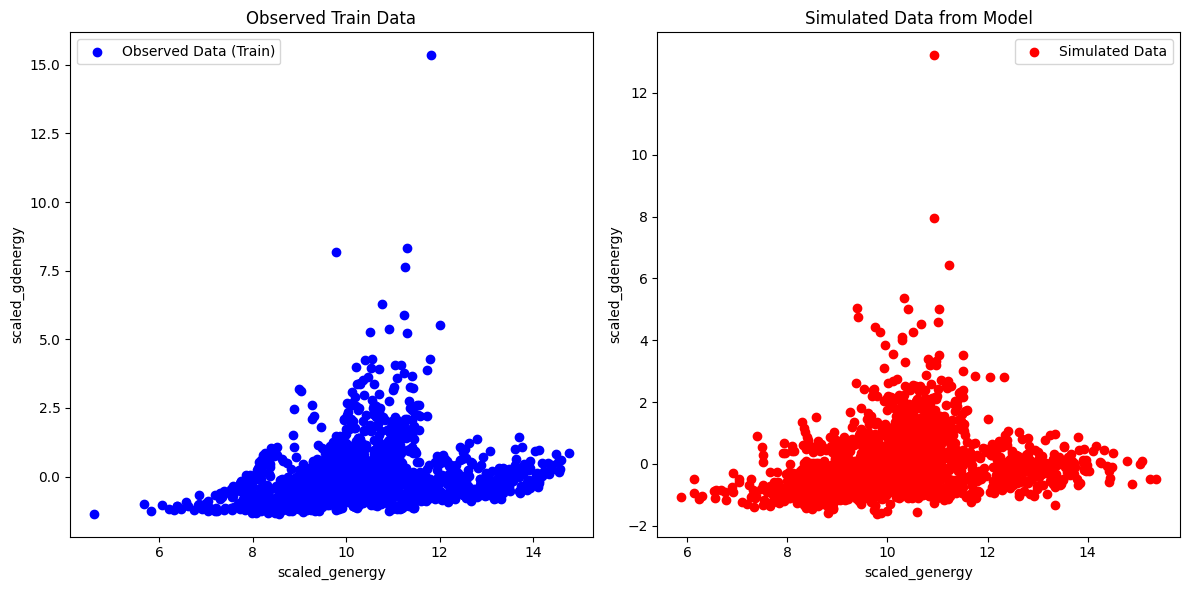

Observed Data Mean: scaled_genergy     10.239242
scaled_gdenergy     0.001273
dtype: float64
Simulated Data Mean: [10.22041196 -0.02195691]
Observed Data Variance: scaled_genergy     1.983967
scaled_gdenergy    1.060191
dtype: float64
Simulated Data Variance: [1.86977026 0.92878079]


In [ ]:
# Generate new data points from the model - in Train Sample
#X_test_gmm = X_test[['scaled_genergy', 'scaled_gdenergy']]
#print(X_test_gmm)
X_simulated = bgmm.sample(n_samples=len(X))[0]  # Generate 100 new data points

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Observed Data (Train)')
plt.title('Observed Train Data')
plt.xlabel('scaled_genergy')
plt.ylabel('scaled_gdenergy')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_simulated[:, 0], X_simulated[:, 1], c='red', label='Simulated Data')
plt.title('Simulated Data from Model')
plt.xlabel('scaled_genergy')
plt.ylabel('scaled_gdenergy')
plt.legend()

plt.tight_layout()
plt.show()

print("Observed Data Mean:", np.mean(X, axis=0))
print("Simulated Data Mean:", np.mean(X_simulated, axis=0))
print("Observed Data Variance:", np.var(X, axis=0))
print("Simulated Data Variance:", np.var(X_simulated, axis=0))

# GPULS and GDENERGY
- gpuls: a number of pulses recorded within previous shift by GMax;
- gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts;

Lowest BIC:  10414.120061799082
      spherical          tied          diag          full
1  12520.565587  12229.154643  12483.258601  12229.154643
2  12107.997214  11899.920288  11191.855148  11025.140923
3  11286.303467  11311.591686  10935.635334  10756.486367
4  10869.676646  11334.076180  10691.102254  10570.183482
5  10822.408402  11031.014903  10648.900620  10458.301344
6  10634.042559  11001.786959  10599.161392  10431.099398
7  10588.292101  10995.869245  10593.461566  10414.120062
8  10603.216950  10793.533241  10538.183485  10465.239821
9  10584.124737  10815.502290  10509.360672  10508.797080


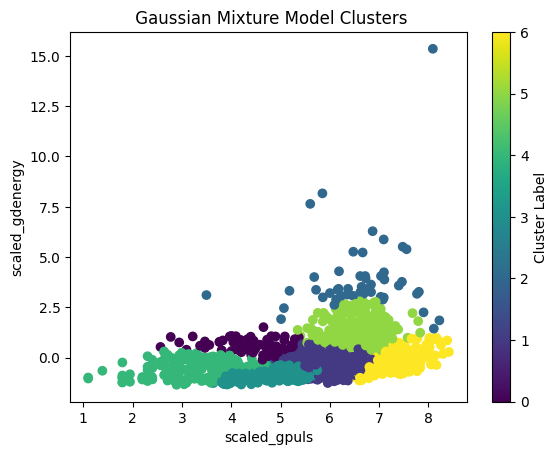

In [ ]:
X = X_train[['scaled_gpuls', 'scaled_gdenergy']]
lowest_bic = np.infty
best_gmm = None
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic_matrix = np.zeros((len(n_components_range), len(cv_types)))

for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_matrix[j, i] = bic

        # Update the lowest BIC and corresponding best GMM
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

bic_df = pd.DataFrame(bic_matrix, columns=cv_types, index=n_components_range)
print("Lowest BIC: ", lowest_bic)
print(bic_df)
best_gmm.fit(X)

labels = best_gmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.title(' Gaussian Mixture Model Clusters')
plt.xlabel('scaled_gpuls')
plt.ylabel('scaled_gdenergy')
plt.colorbar(label='Cluster Label')
plt.show()


# ENERGY and GPULS
- gpuls: a number of pulses recorded within previous shift by GMax;


Lowest BIC:  -1664.2298851546811
      spherical          tied          diag          full
1  20886.204622  18032.238553  18210.411837  18032.238553
2  14857.156543  15250.993152  -1317.220745  -1345.971783
3  14711.340730  14269.748741  -1360.519544  -1588.619206
4  13120.752684  14042.508602  -1620.242763  -1564.969362
5  13097.256596  12888.625355  -1664.229885  -1634.336451
6  13027.611758  12634.015270  -1635.353757  -1606.060504
7  12281.592441  12649.222629  -1593.265429  -1554.119384
8  11701.030665  12675.863201  -1596.022578  -1514.621850
9  12320.863342  12154.015712  -1565.179758  -1495.733344


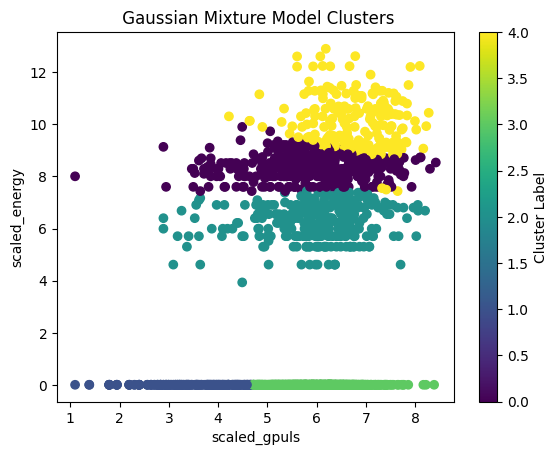

In [78]:
X = X_train[['scaled_gpuls', 'scaled_energy']]
lowest_bic = np.infty
best_gmm = None

n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic_matrix = np.zeros((len(n_components_range), len(cv_types)))

# Fit models and compute BIC
for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)  # Calculate the BIC
        bic_matrix[j, i] = bic

        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

bic_df = pd.DataFrame(bic_matrix, columns=cv_types, index=n_components_range)
print("Lowest BIC: ", lowest_bic)
print(bic_df)
best_gmm.fit(X)

labels = best_gmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title(' Gaussian Mixture Model Clusters')
plt.xlabel('scaled_gpuls')  # Adjust label based on selected feature
plt.ylabel('scaled_energy')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()


# Pairwise Oversampling minority class

Different ratios of sampling will be tested for classification enrichment of train data, because when you sample, you add noise to the data anyway, that is why when major part of imbalanced class is sampled data, the quality of the model may degrade

In [ ]:
#Initial ratio
y_train.value_counts()[0]// y_train.value_counts()[1]

14

## Checking the pairs for KL divergence after sampling new obsevations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.special import kl_div
columns = X_train_subset.columns

subsets = {}
simulated_data = {}
kl_divergences = {}
best_pairs = {col: (None, float('inf')) for col in columns}

def calculate_kl_divergence(densities_p, densities_q):
    """Calculate KL divergence from densities."""
    kl_divergence = np.sum(kl_div(densities_p, densities_q))
    return kl_divergence

for col1, col2 in combinations(columns, 2):
    X = X_train_subset[[col1, col2]].dropna()

    if X.empty:
        continue
    X_values = X.values

    n_components = min(9, len(np.unique(X_values, axis=0)) // 10, max(1, len(X_values) // 100))
    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                   random_state=42, weight_concentration_prior=0.15, max_iter=10000)
    bgmm.fit(X_values)
    samples, _ = bgmm.sample(n_samples=len(X_values))

    subsets[f'{col1}_{col2}'] = X
    simulated_data[f'{col1}_{col2}'] = pd.DataFrame(samples, columns=[col1, col2])

    densities_p = np.exp(bgmm.score_samples(X_values))
    densities_q = np.exp(bgmm.score_samples(samples))

    # Calculate KL divergence
    kl_div1 = calculate_kl_divergence(densities_p, densities_q)
    kl_divergences[(col1, col2)] = kl_div1

    # Check if this pair is the best for each column involved
    if kl_div1 < best_pairs[col1][1]:
        best_pairs[col1] = (col2, kl_div1)
    if kl_div1 < best_pairs[col2][1]:
        best_pairs[col2] = (col1, kl_div1)

for col, (best_col, divergence) in best_pairs.items():
    if best_col is not None:
        print(f'Best pair for {col}: {col}_{best_col}, KL Divergence: {divergence}')


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to dup

Best pair for nbumps3: nbumps3_scaled_energy, KL Divergence: 15.227292819815903
Best pair for nbumps5: nbumps5_nbumps, KL Divergence: 4119.472905805458
Best pair for seismoacoustic_enc_0: seismoacoustic_enc_0_scaled_energy, KL Divergence: 43.614088008212065
Best pair for shift_enc_0: shift_enc_0_scaled_energy, KL Divergence: 230.74558866873502
Best pair for scaled_genergy: scaled_genergy_scaled_energy, KL Divergence: 1.2101808963566156
Best pair for scaled_gpuls: scaled_gpuls_scaled_energy, KL Divergence: 3.159399659678849
Best pair for seismic_enc_0: seismic_enc_0_scaled_energy, KL Divergence: 27.779888280878204
Best pair for scaled_energy: scaled_energy_scaled_genergy, KL Divergence: 1.2101808963566156
Best pair for ghazard_enc_0: ghazard_enc_0_scaled_energy, KL Divergence: 320.29136188116865
Best pair for nbumps4: nbumps4_scaled_energy, KL Divergence: 121.73235971391527
Best pair for scaled_gdenergy: scaled_gdenergy_scaled_genergy, KL Divergence: 5.905757863022853
Best pair for nbum

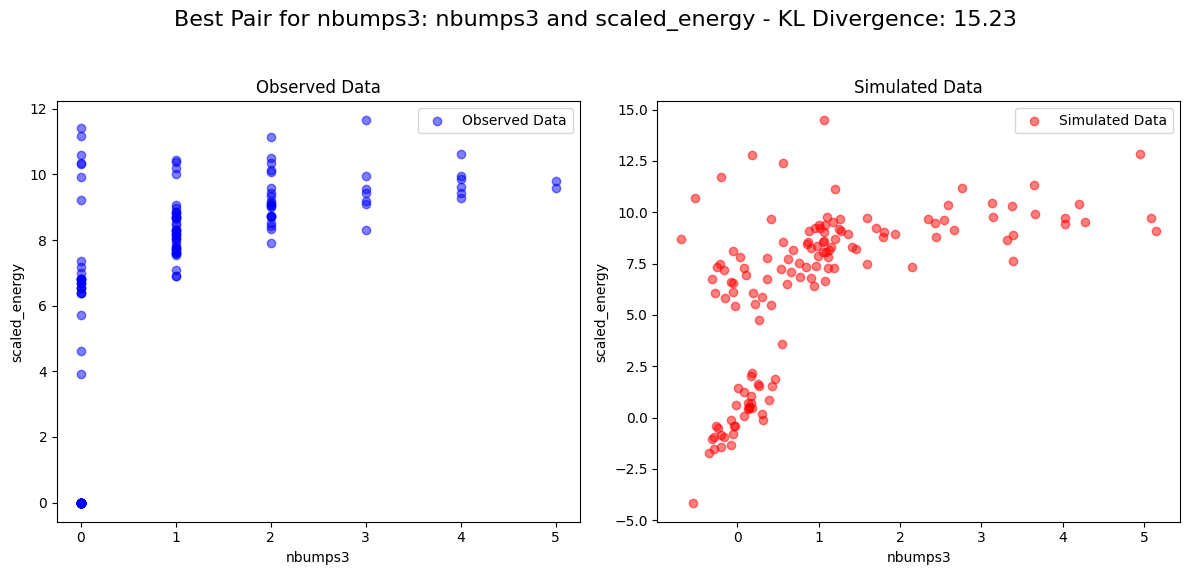

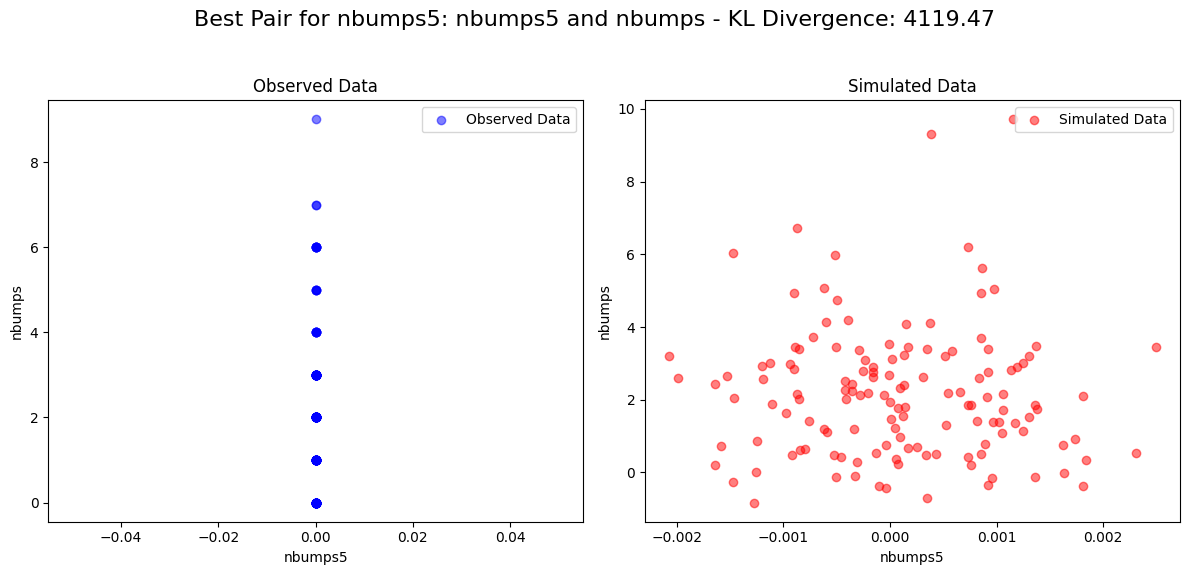

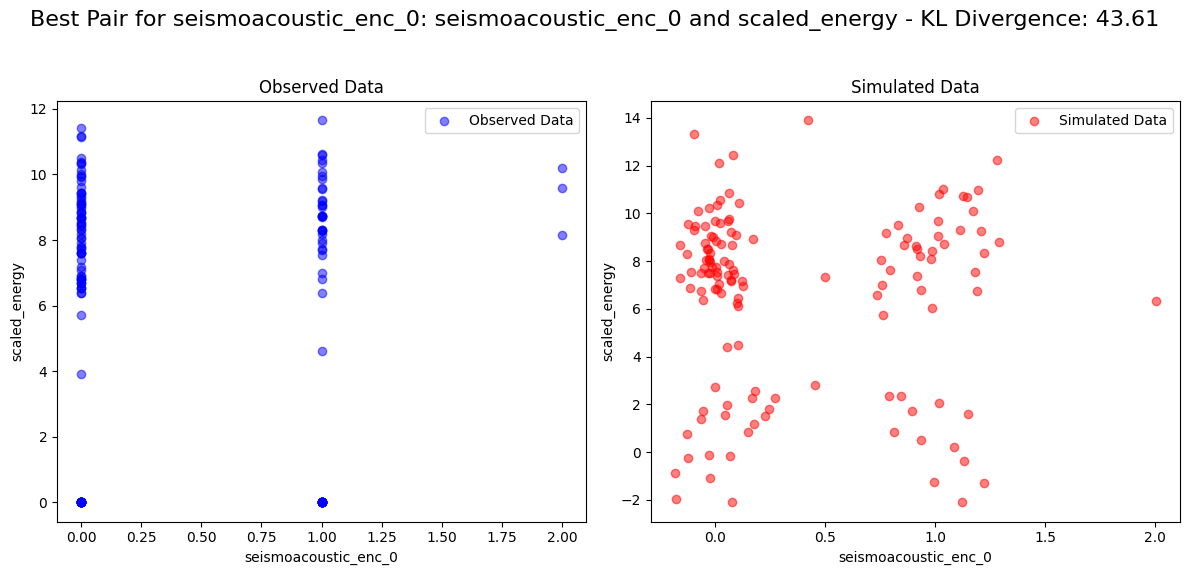

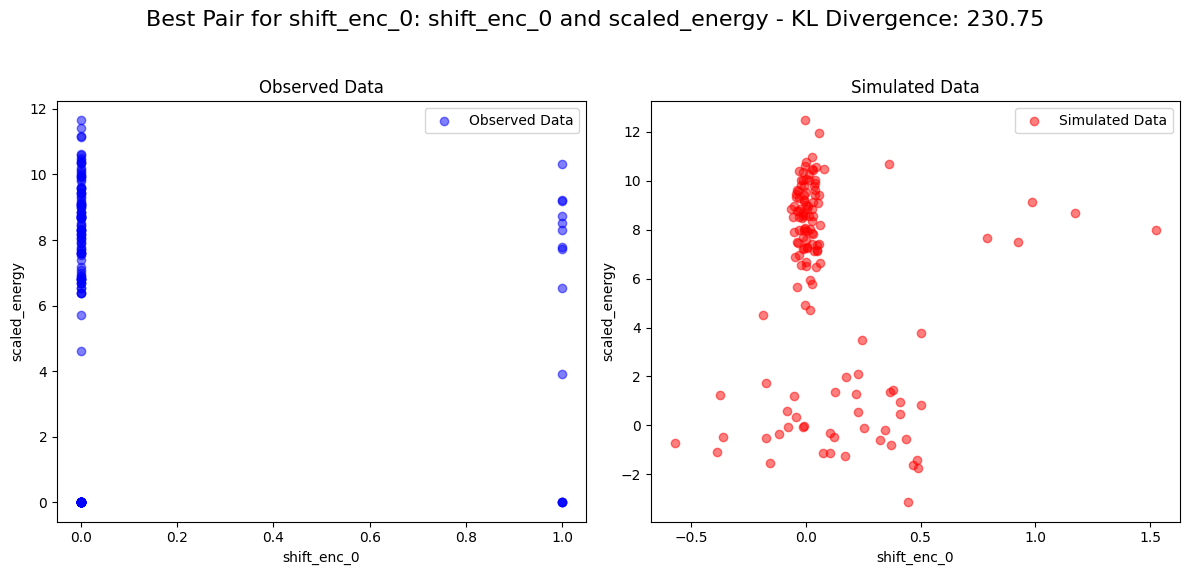

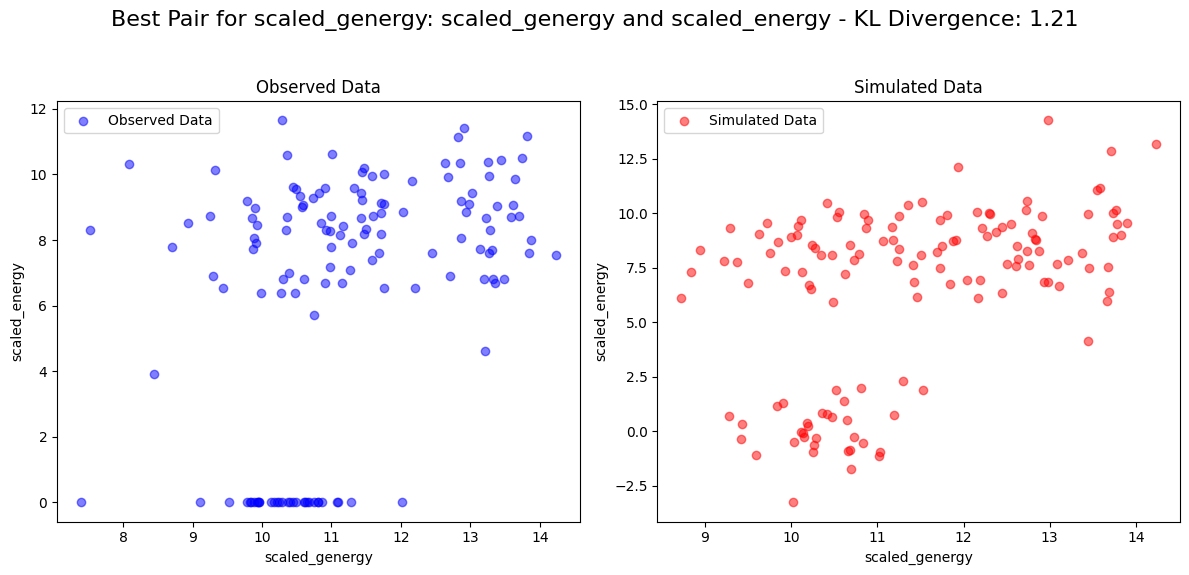

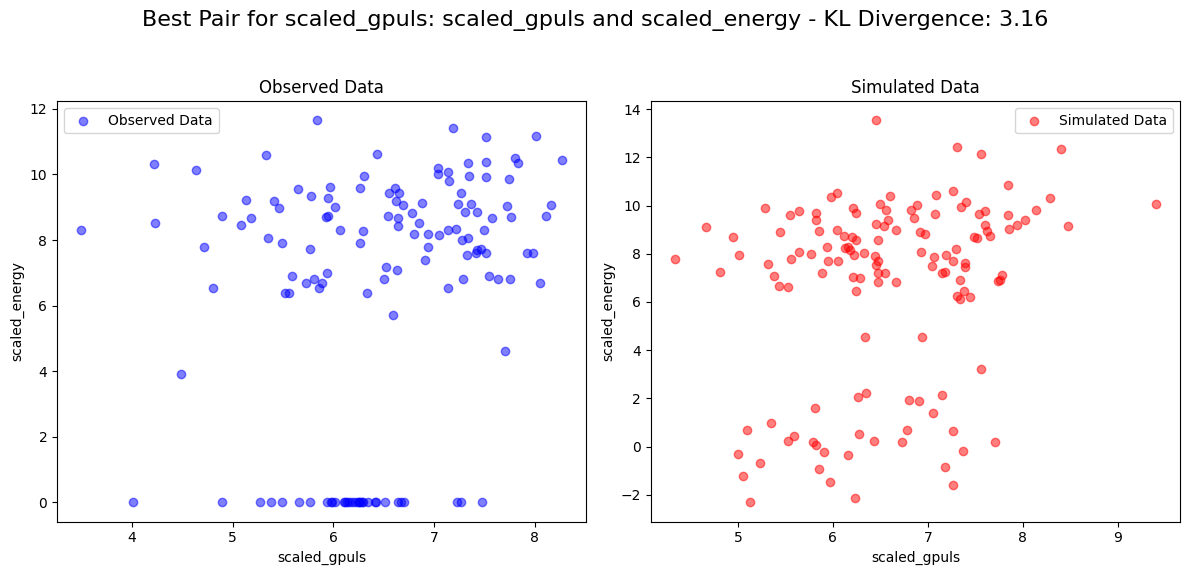

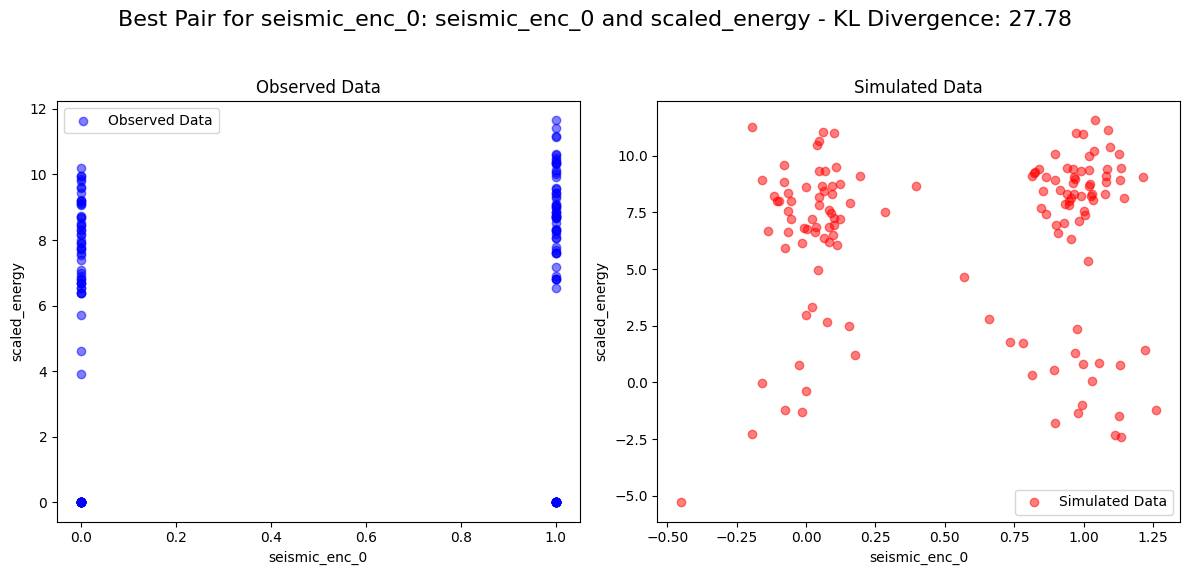

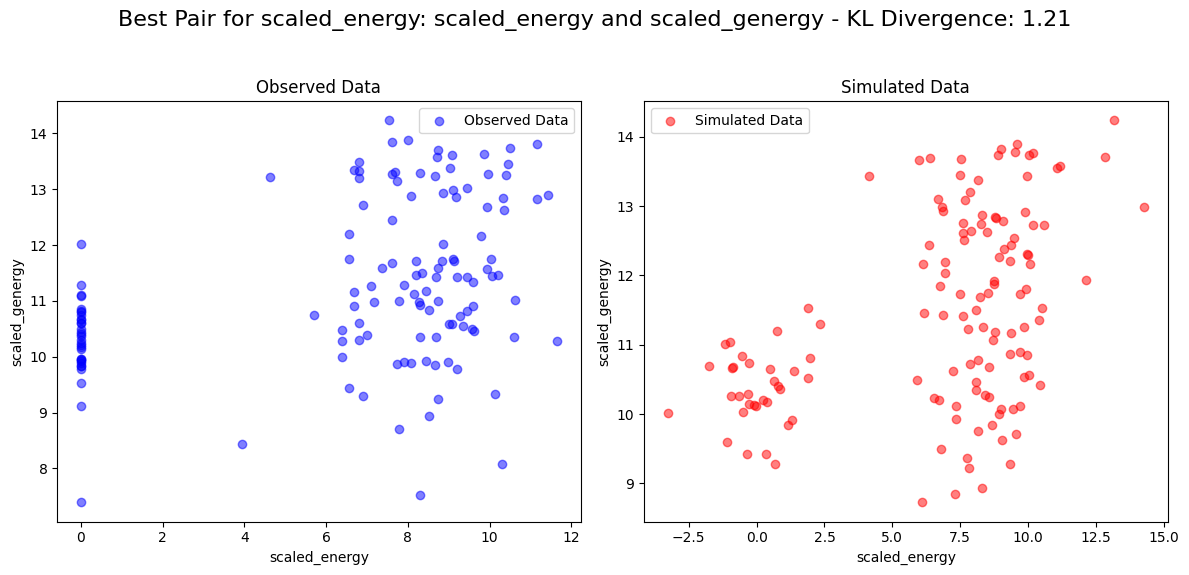

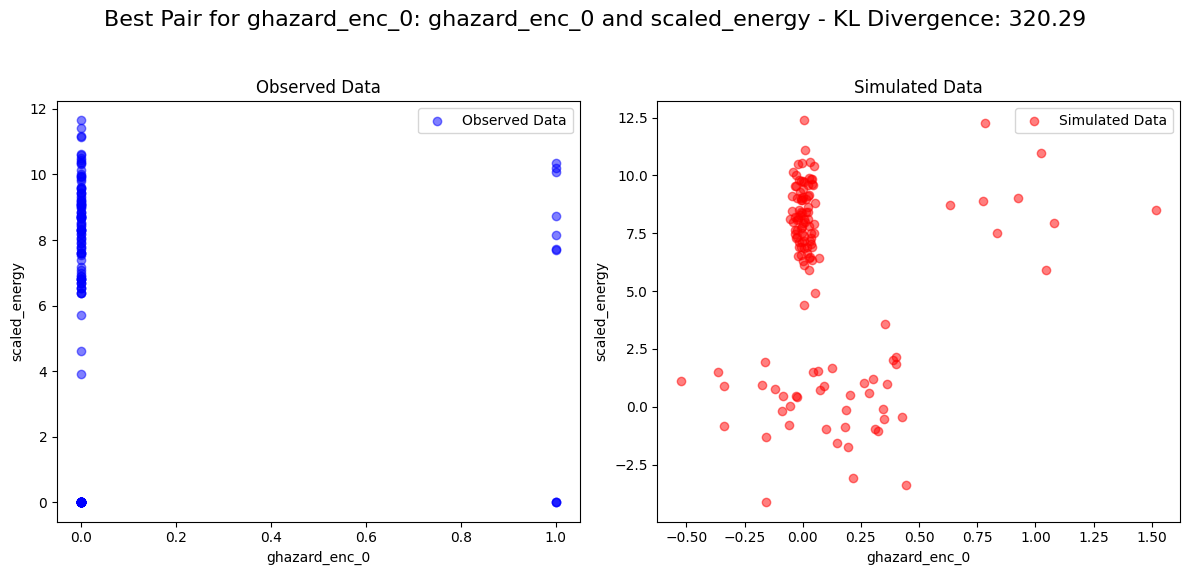

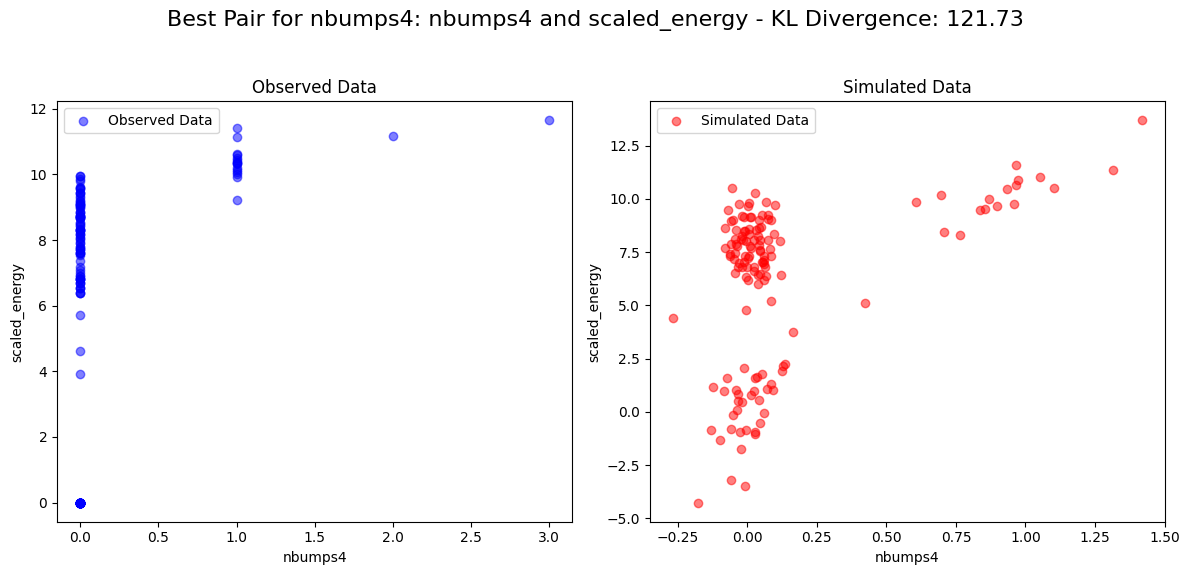

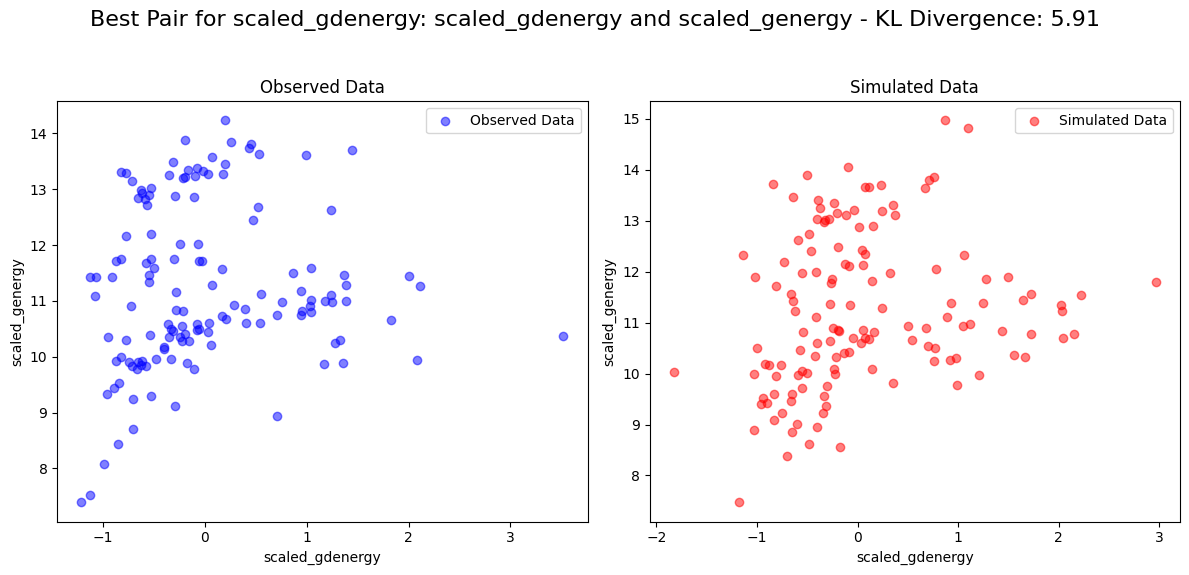

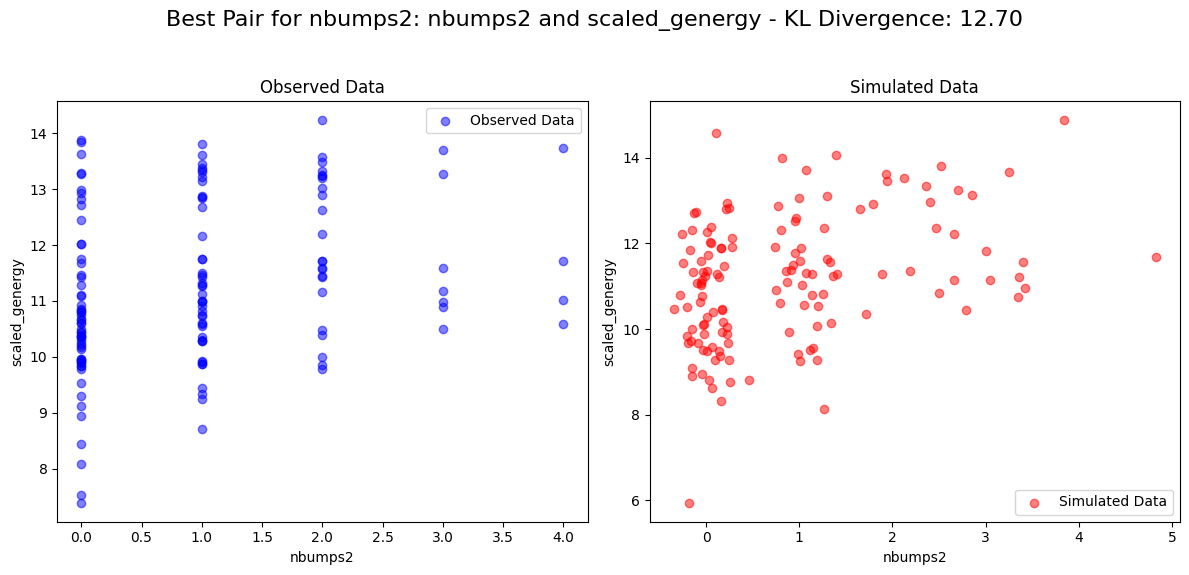

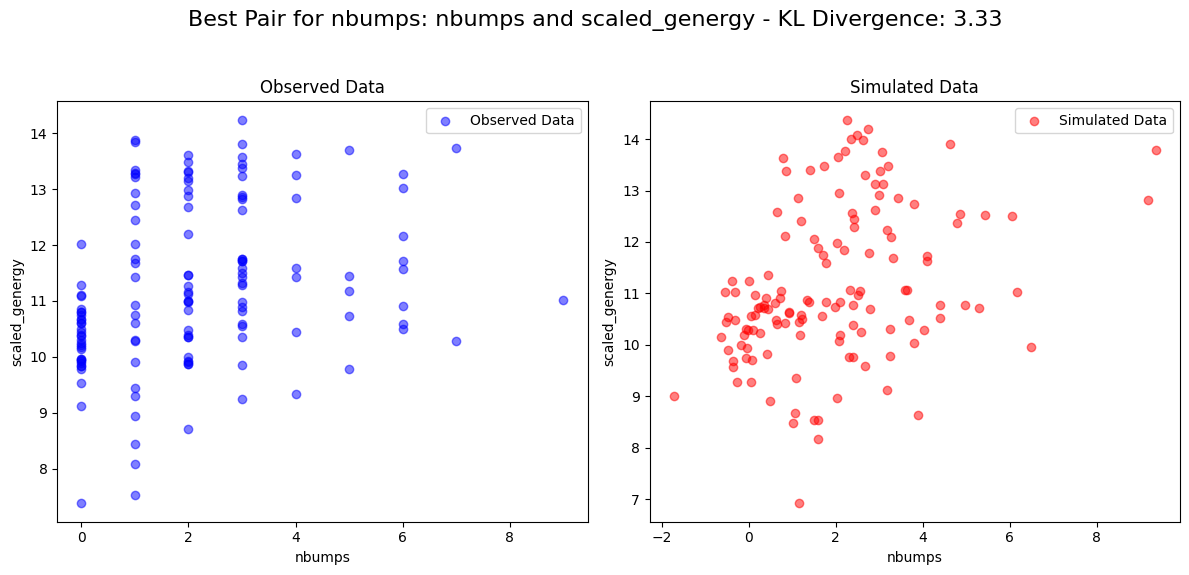

In [ ]:
import matplotlib.pyplot as plt

# Plot the best pairs for each column
for col, (best_col, divergence) in best_pairs.items():
    if best_col is None:
        continue
    pair_key = f'{col}_{best_col}'
    reverse_pair_key = f'{best_col}_{col}'

    if pair_key in subsets:
        X = subsets[pair_key]
    elif reverse_pair_key in subsets:
        X = subsets[reverse_pair_key]
    else:
        continue

    if pair_key in simulated_data:
        simulated = simulated_data[pair_key]
    elif reverse_pair_key in simulated_data:
        simulated = simulated_data[reverse_pair_key]
    else:
        continue
    observed_x = X[col].values
    observed_y = X[best_col].values
    simulated_x = simulated[col].values
    simulated_y = simulated[best_col].values

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Best Pair for {col}: {col} and {best_col} - KL Divergence: {divergence:.2f}', fontsize=16)

    plt.subplot(1, 2, 1)
    plt.scatter(observed_x, observed_y, color='blue', alpha=0.5, label='Observed Data')
    plt.xlabel(col)
    plt.ylabel(best_col)
    plt.title('Observed Data')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(simulated_x, simulated_y, color='red', alpha=0.5, label='Simulated Data')
    plt.xlabel(col)
    plt.ylabel(best_col)
    plt.title('Simulated Data')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Majority to minority after oversampling: = 4:1

In [ ]:
y_train.value_counts()

class
0    1931
1     136
Name: count, dtype: int64

In [ ]:
# After using this simulation the presence of class 1 will be
y_train.value_counts()[0]//4 - y_train.value_counts()[1]

346

This is still imbalanced, but I would fit classification models with different degrees of imbalance by modification of the oversampled ratio

Index(['scaled_genergy', 'nbumps2'], dtype='object')


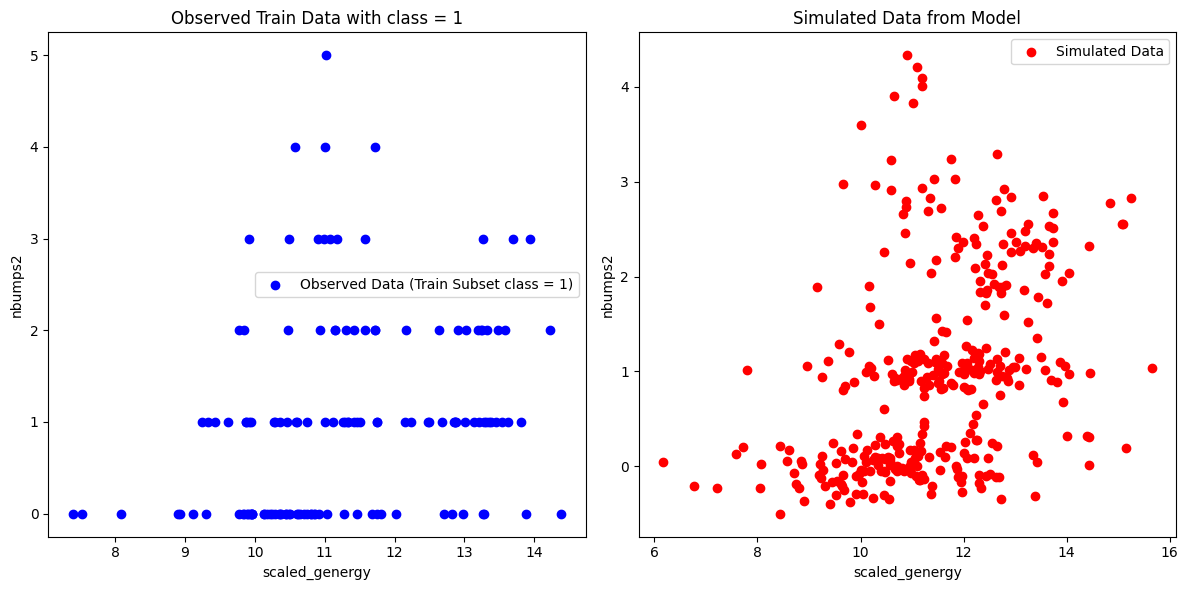

Index(['nbumps', 'shift_enc_0'], dtype='object')


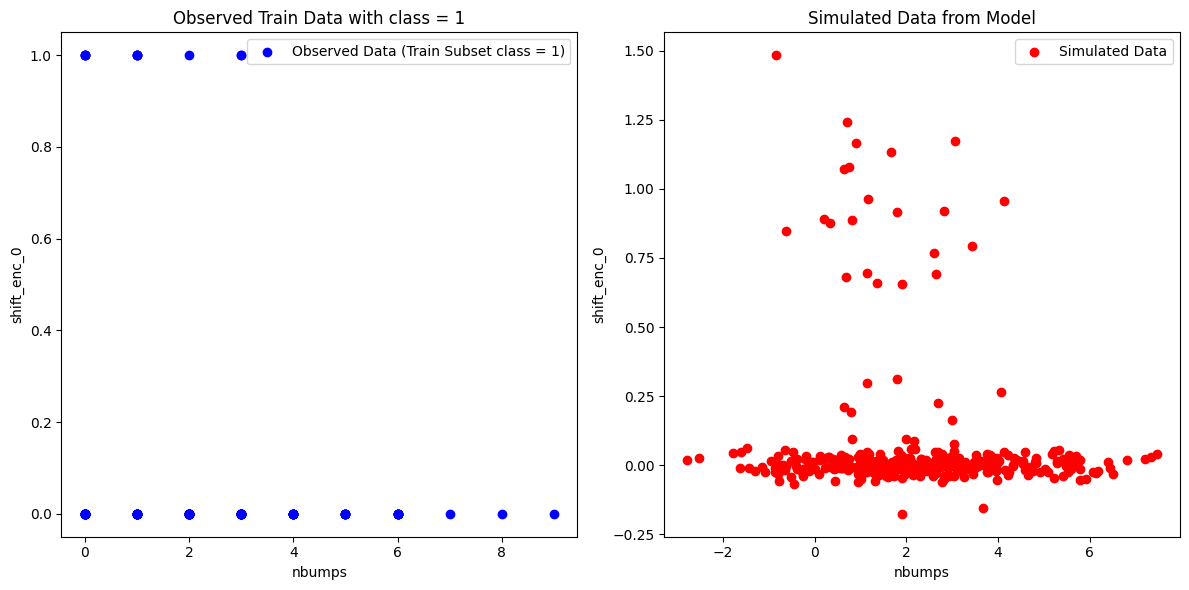

Index(['nbumps5', 'scaled_energy'], dtype='object')


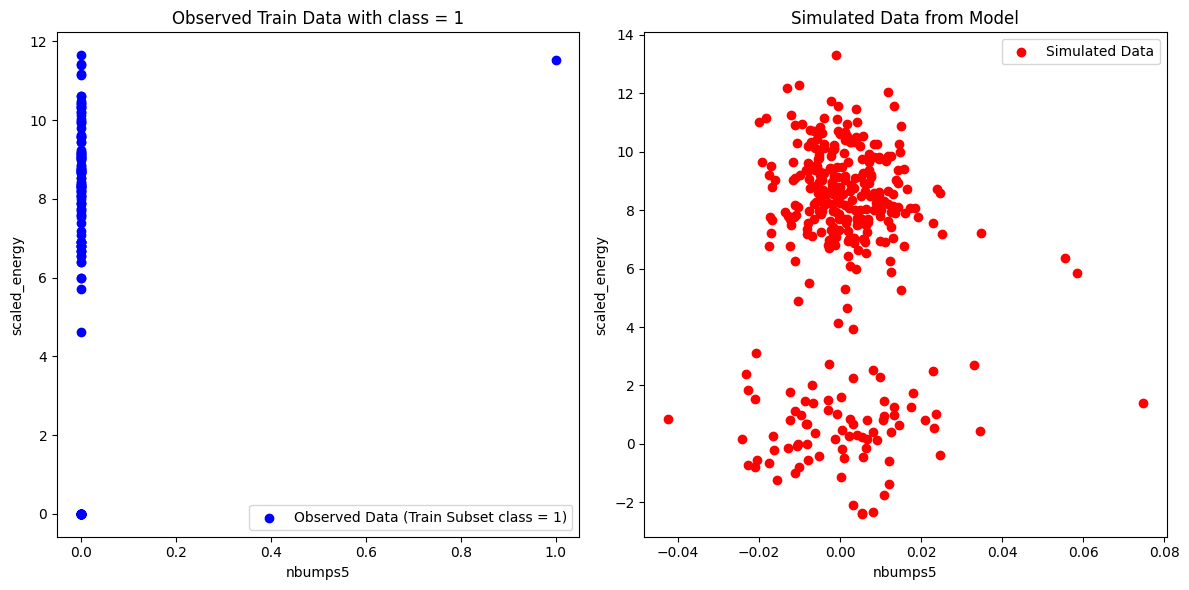

Index(['ghazard_enc_0', 'seismic_enc_0'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)


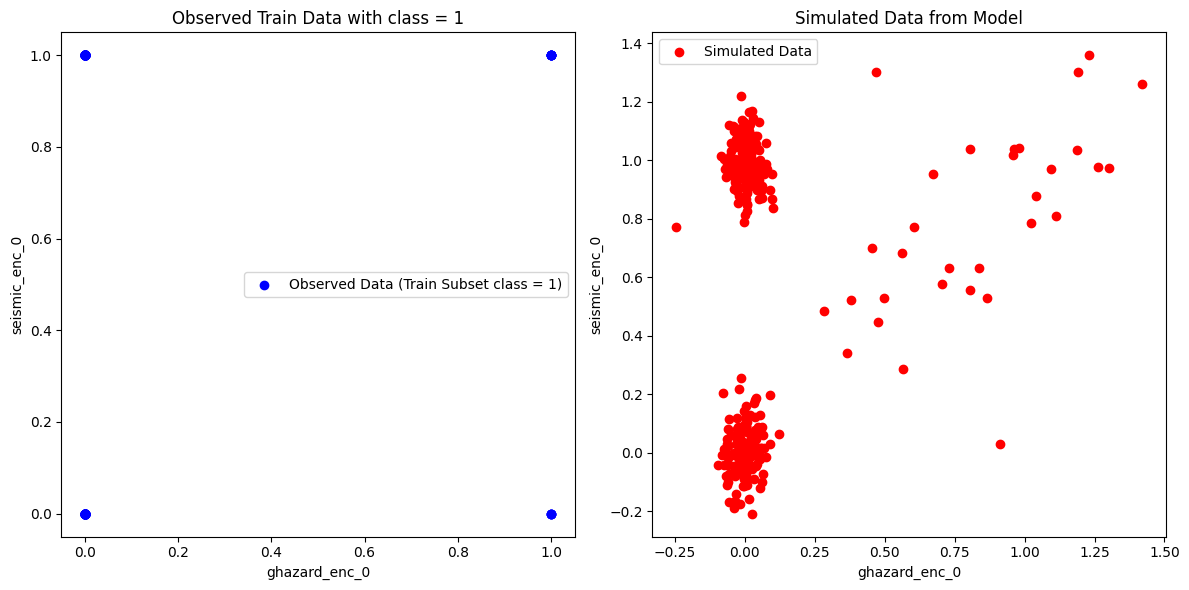

Index(['scaled_gpuls', 'nbumps4'], dtype='object')


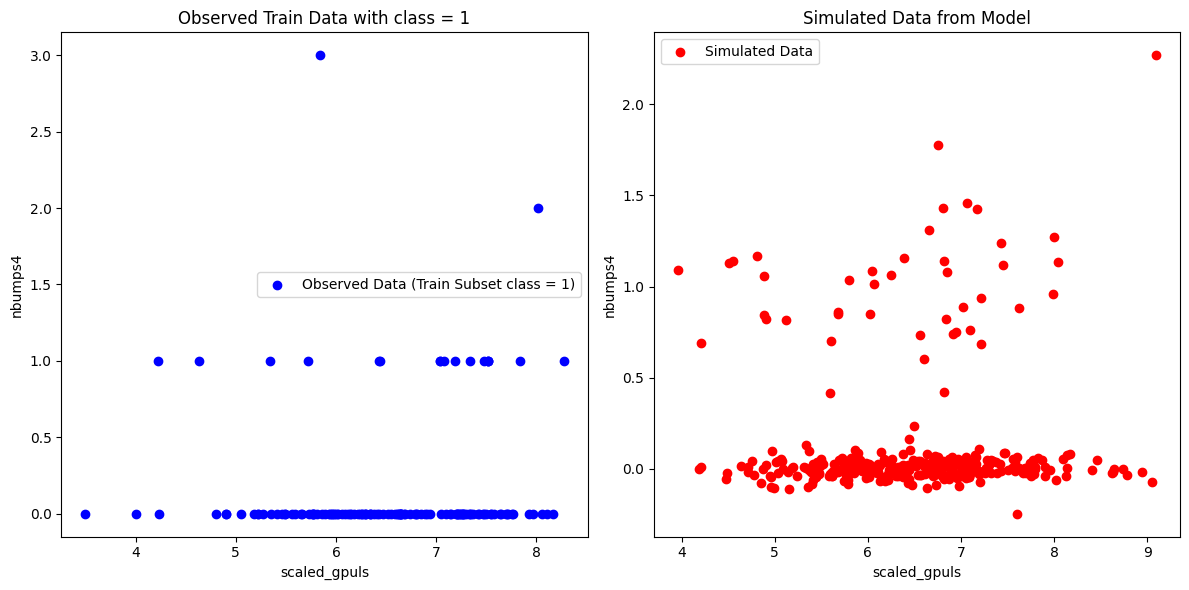

Index(['scaled_gdenergy', 'seismoacoustic_enc_0'], dtype='object')


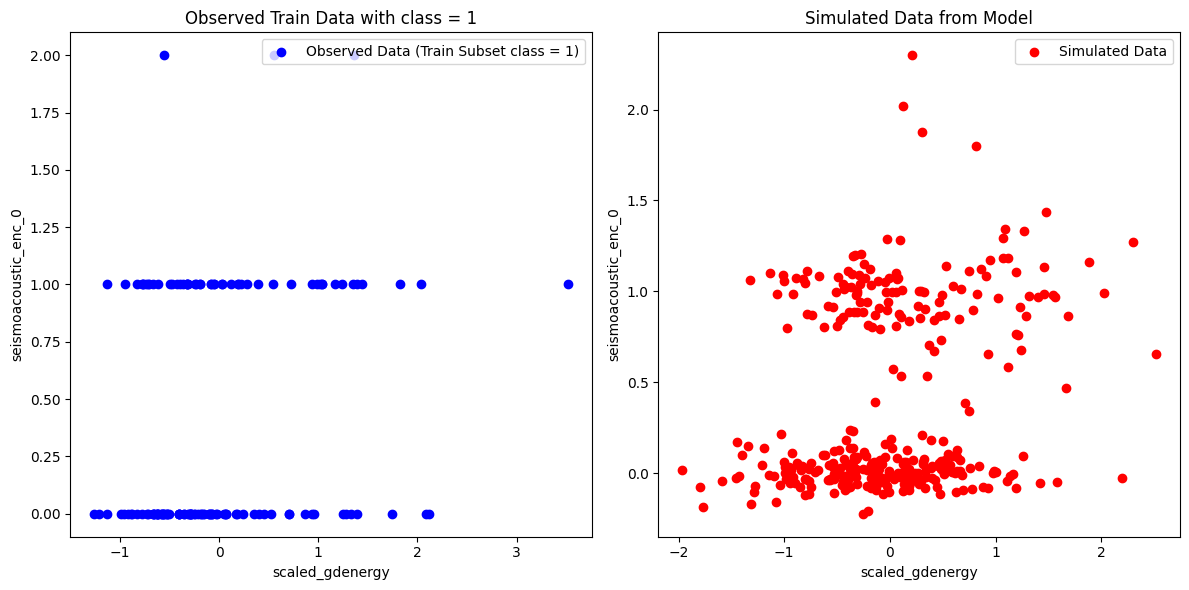

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  .fit(X)


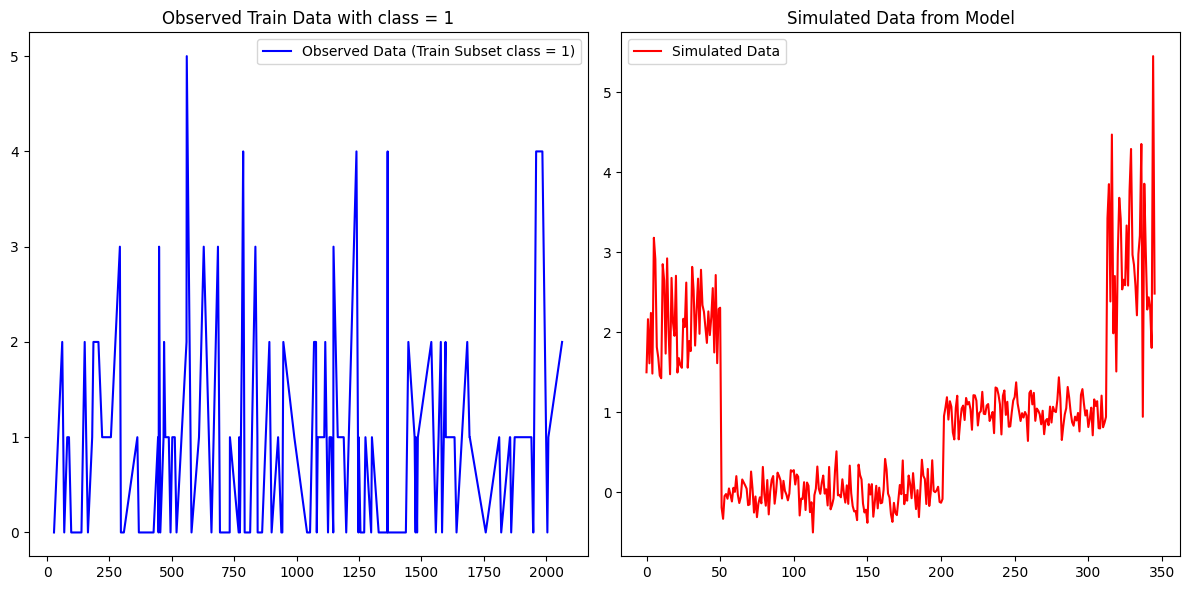

In [ ]:
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

# Assuming X_train_subset is already defined
columns = X_train_subset.columns

# Initialize a dictionary to store each subset DataFrame and the corresponding simulated data
subsets_4_1 = {}
simulated_data_4_1 = {}
new_obs_4_1 = pd.DataFrame()

# Loop through the columns, starting from index 1 to the last index
for i in range(1, len(columns), 2):  # starts at 1 to be able to access i-1

    # Select columns i-1 and i
    current_columns = [columns[i-1], columns[i]]

    # Create a new DataFrame with just these two columns
    X = X_train_subset[current_columns]
    subsets_4_1[f'X_{i}'] = X  # Store the subset DataFrame with a dynamically created key
    print(X.columns)

    # Initialize and fit the Bayesian Gaussian Mixture Model
    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                   weight_concentration_prior=0.15, max_iter=10000)
    bgmm.fit(X)
    X_simulated = bgmm.sample(n_samples=y_train.value_counts()[0]//4 - y_train.value_counts()[1])[0]
    # Generate simulated data and store it in the dictionary with a dynamic key
    simulated_data_4_1[f'X_simulated_{i}'] = pd.DataFrame(X_simulated, columns = current_columns)
    new_obs_4_1[[f'{columns[i-1]}', f'{columns[i]}']] = pd.DataFrame(X_simulated, columns = current_columns)

    # Visualization to compare observed and simulated data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_simulated[:, 0], X_simulated[:,1], c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if len(columns) % 2 == 1:
    last_column = [columns[-1]]
    X_last = X_train_subset[last_column]
    subsets_4_1[f'X_{len(columns)}'] = X_last

    bgmm_last = BayesianGaussianMixture(n_components=7, covariance_type='diag',
                                        weight_concentration_prior=0.35, max_iter=10000)
    bgmm_last.fit(X_last)
    X_simulated_last = bgmm_last.sample(n_samples=y_train.value_counts()[0]//4 - y_train.value_counts()[1])[0]

    simulated_data_4_1[f'X_simulated_{len(columns)}'] = pd.DataFrame(X_simulated_last, columns=last_column)
    new_obs_4_1 = pd.concat([new_obs_4_1, pd.DataFrame(X_simulated_last, columns=last_column)], axis=1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X_last, c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_simulated_last, c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.legend()

    plt.tight_layout()
    plt.show()


# At this point, you can access each subset DataFrame and its corresponding simulated data from the dictionaries
# For example, to access the simulated data for the second pair of columns:
#print(simulated_data['X_simulated_2'])


In [ ]:
simulated_data_4_1

{'X_simulated_1':      scaled_genergy   nbumps2
 0         11.944068  0.259668
 1         11.066663  0.926372
 2         10.415762  0.553419
 3         10.772860  0.696051
 4         11.932148  1.802777
 ..              ...       ...
 341        8.664936 -0.122186
 342       11.308834 -0.201970
 343       10.661260 -0.109891
 344        9.366606  0.178496
 345       10.364924 -0.248356
 
 [346 rows x 2 columns],
 'X_simulated_3':        nbumps  shift_enc_0
 0    3.828470     0.068131
 1    0.825788    -0.093621
 2    0.842825    -0.024355
 3    2.332233     0.298708
 4    2.917421     0.110210
 ..        ...          ...
 341  3.647896     1.028780
 342  1.604743     1.140325
 343 -0.134149     1.240465
 344  0.587526     0.229615
 345  3.746608     0.830051
 
 [346 rows x 2 columns],
 'X_simulated_5':       nbumps5  scaled_energy
 0   -0.009873      -1.784709
 1   -0.021761      -0.716730
 2   -0.042878      -2.617581
 3    0.009642      -1.099146
 4    0.000446       3.279228
 ..    

## Majority-to-minority:=  2:1

In [ ]:
y_train.value_counts()[0]//2 -y_train.value_counts()[1]

829

Index(['scaled_genergy', 'nbumps2'], dtype='object')


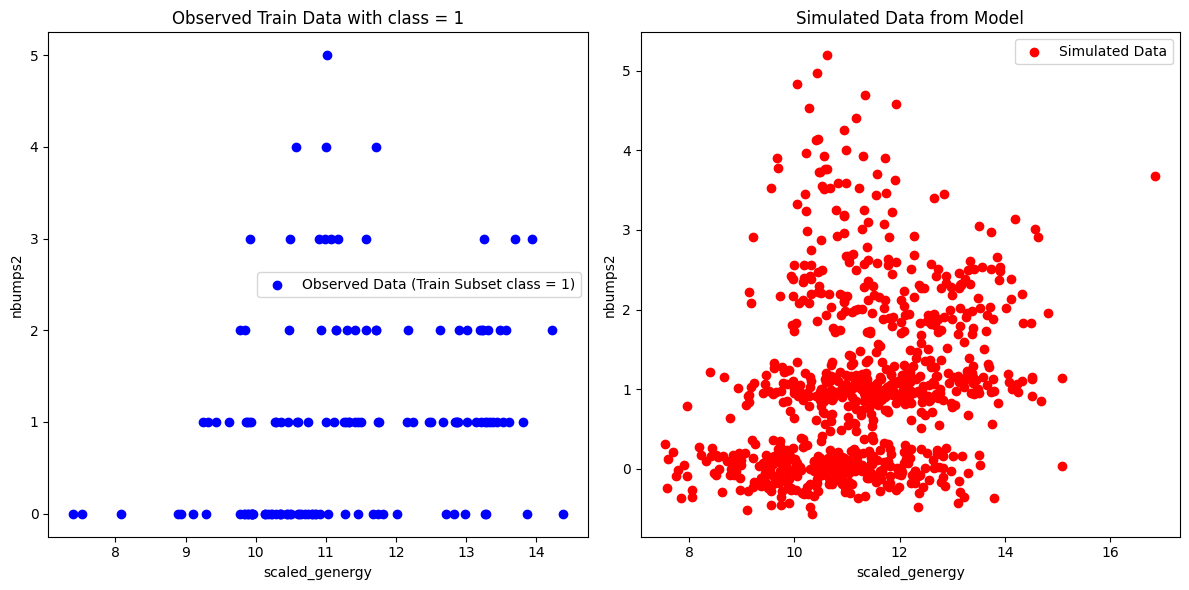

Index(['nbumps', 'shift_enc_0'], dtype='object')


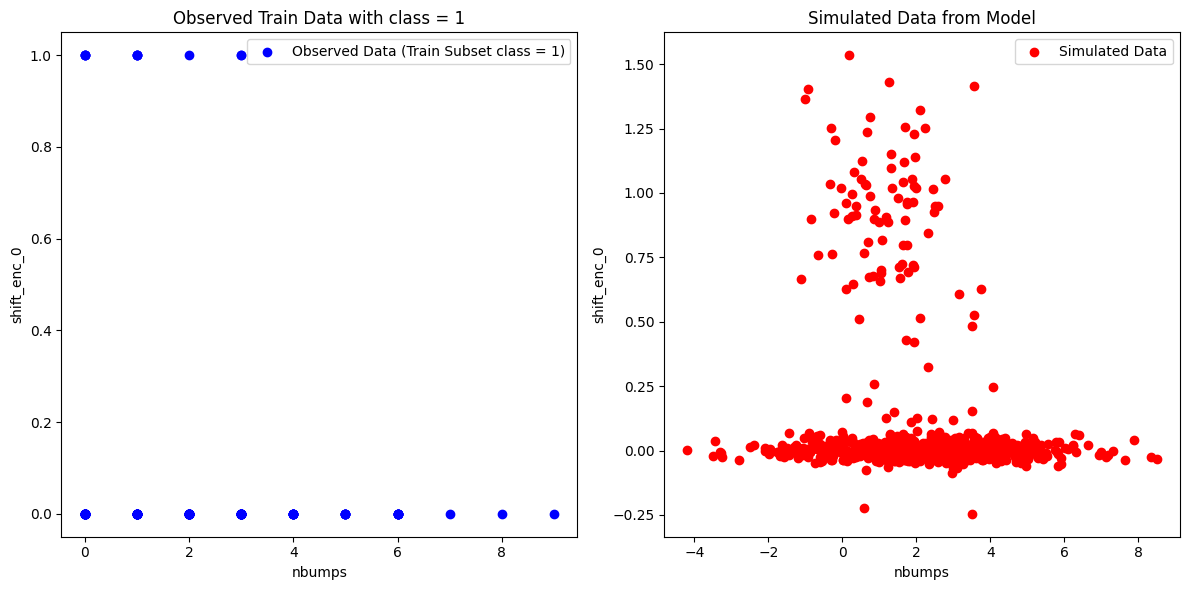

Index(['nbumps5', 'scaled_energy'], dtype='object')


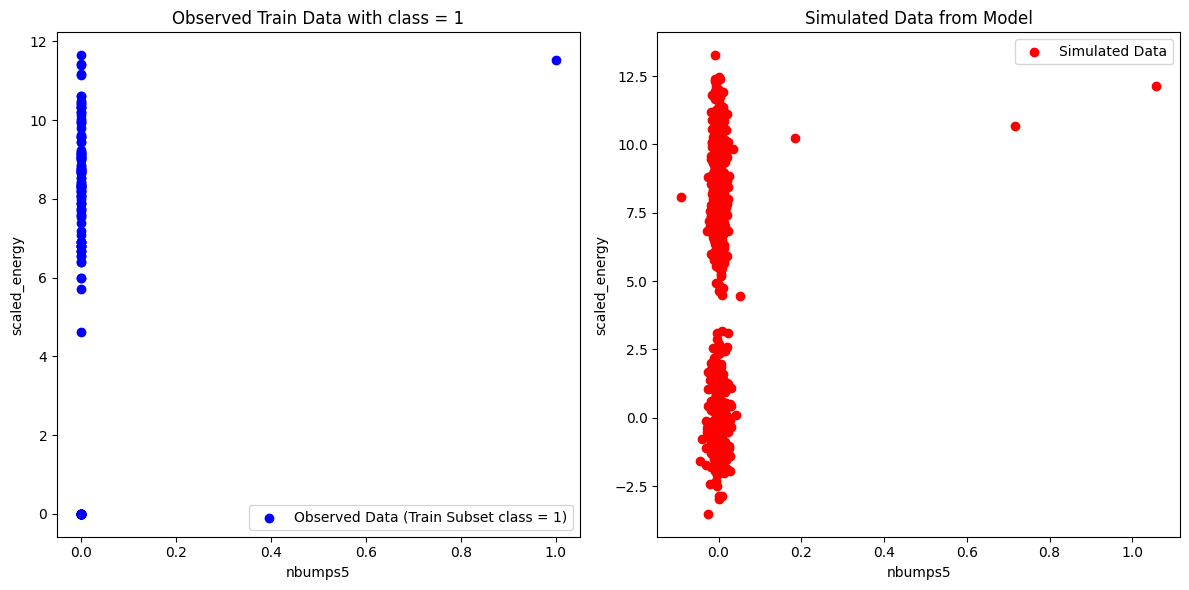

Index(['ghazard_enc_0', 'seismic_enc_0'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)


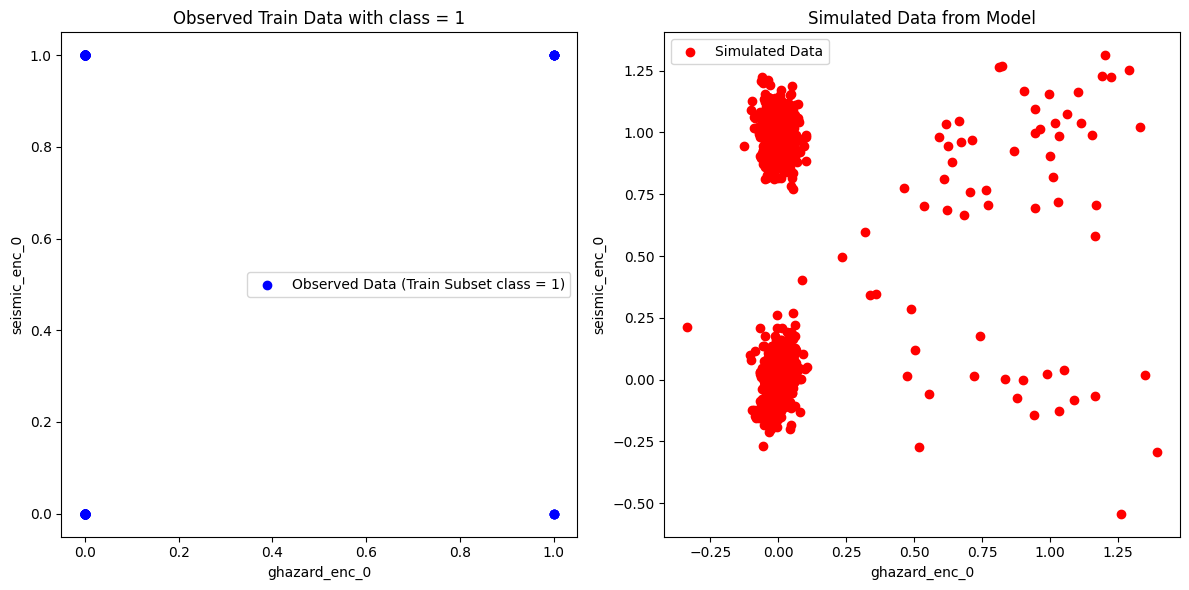

Index(['scaled_gpuls', 'nbumps4'], dtype='object')


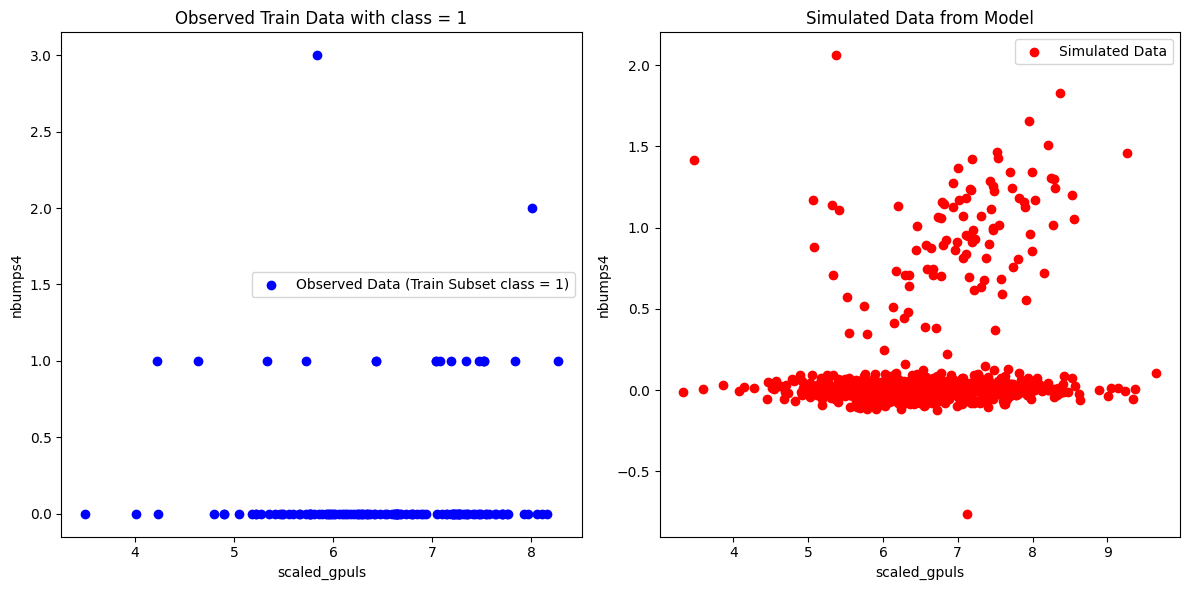

Index(['scaled_gdenergy', 'seismoacoustic_enc_0'], dtype='object')


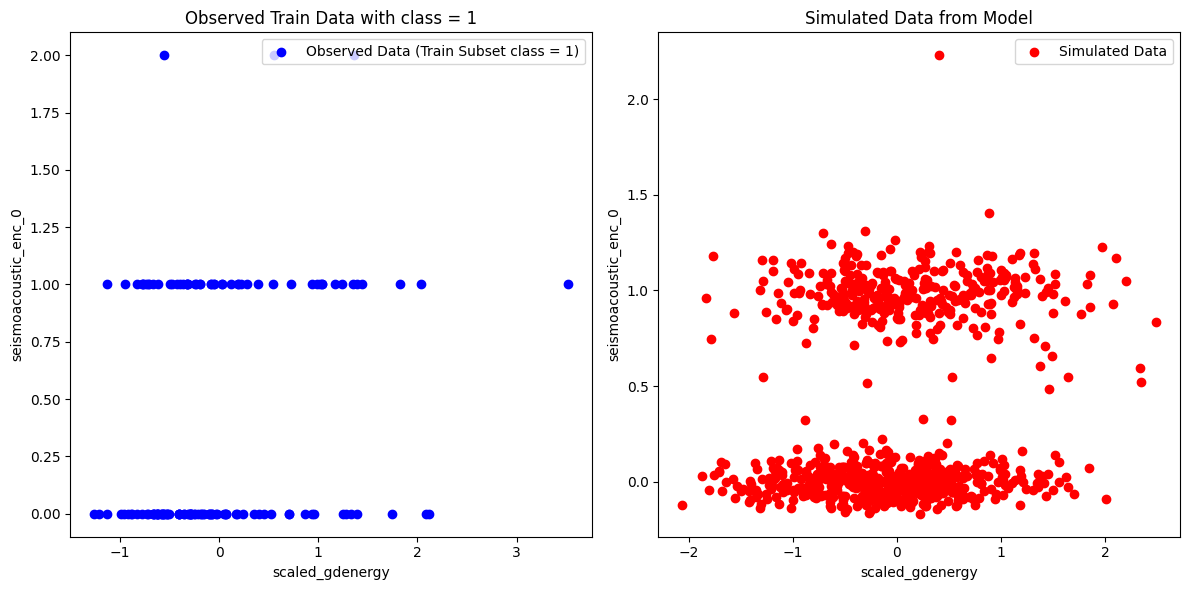

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  .fit(X)


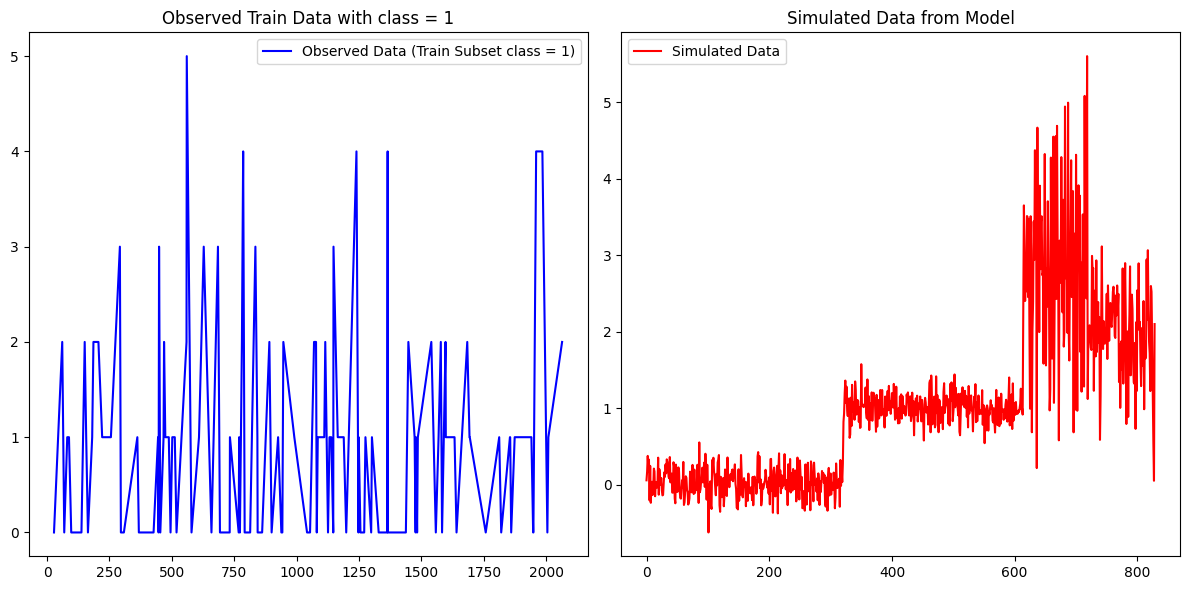

In [ ]:
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

columns = X_train_subset.columns

# Initialize a dictionary to store each subset DataFrame and the corresponding simulated data
subsets_2_1 = {}
simulated_data_2_1 = {}
new_obs_2_1 = pd.DataFrame()

for i in range(1, len(columns), 2):
    current_columns = [columns[i-1], columns[i]]
    X = X_train_subset[current_columns]
    subsets_2_1[f'X_{i}'] = X
    print(X.columns)
    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                   weight_concentration_prior=0.15, max_iter=10000)
    bgmm.fit(X)
    X_simulated = bgmm.sample(n_samples=y_train.value_counts()[0]//2 -y_train.value_counts()[1])[0]
    simulated_data_2_1[f'X_simulated_{i}'] = X_simulated
    new_obs_2_1[[f'{columns[i-1]}', f'{columns[i]}']] = pd.DataFrame(X_simulated, columns = current_columns)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_simulated[:, 0], X_simulated[:,1], c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if len(columns) % 2 == 1:
    last_column = [columns[-1]]
    X_last = X_train_subset[last_column]
    subsets_2_1[f'X_{len(columns)}'] = X_last

    bgmm_last = BayesianGaussianMixture(n_components=7, covariance_type='full',
                                        weight_concentration_prior=0.35, max_iter=10000)
    bgmm_last.fit(X_last)
    X_simulated_last = bgmm_last.sample(n_samples=y_train.value_counts()[0]//2 - y_train.value_counts()[1])[0]

    simulated_data_2_1[f'X_simulated_{len(columns)}'] = pd.DataFrame(X_simulated_last, columns=last_column)
    new_obs_2_1 = pd.concat([new_obs_2_1, pd.DataFrame(X_simulated_last, columns=last_column)], axis=1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X_last, c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_simulated_last, c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.legend()

    plt.tight_layout()
    plt.show()




## Full oversampling: majority-to-minority = 1:1

Index(['scaled_genergy', 'nbumps2'], dtype='object')


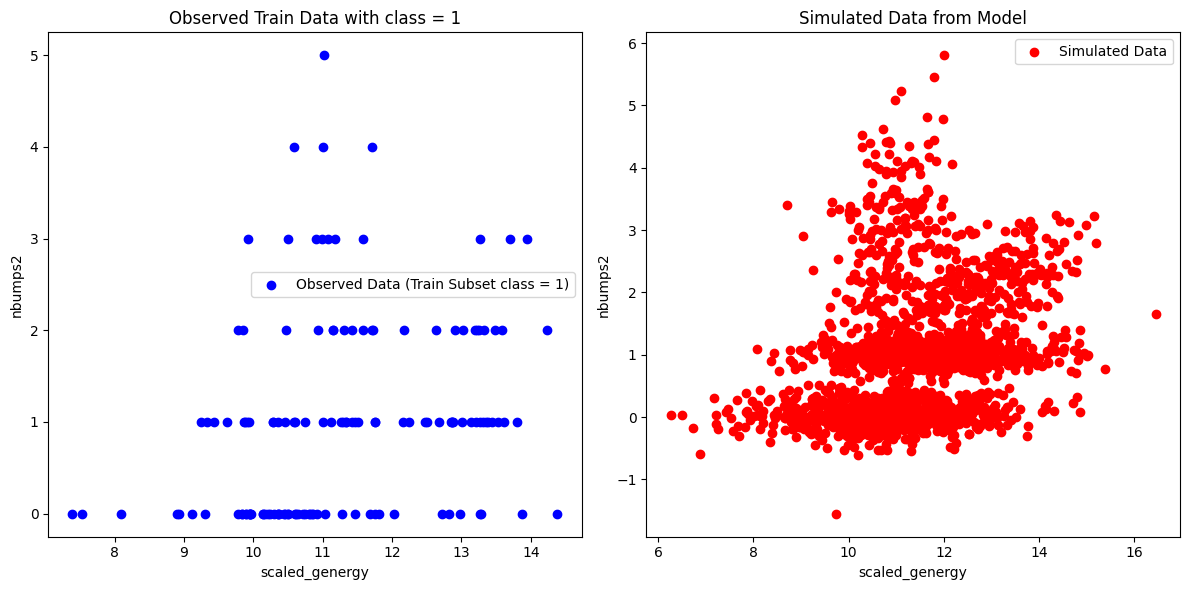

Index(['nbumps', 'shift_enc_0'], dtype='object')


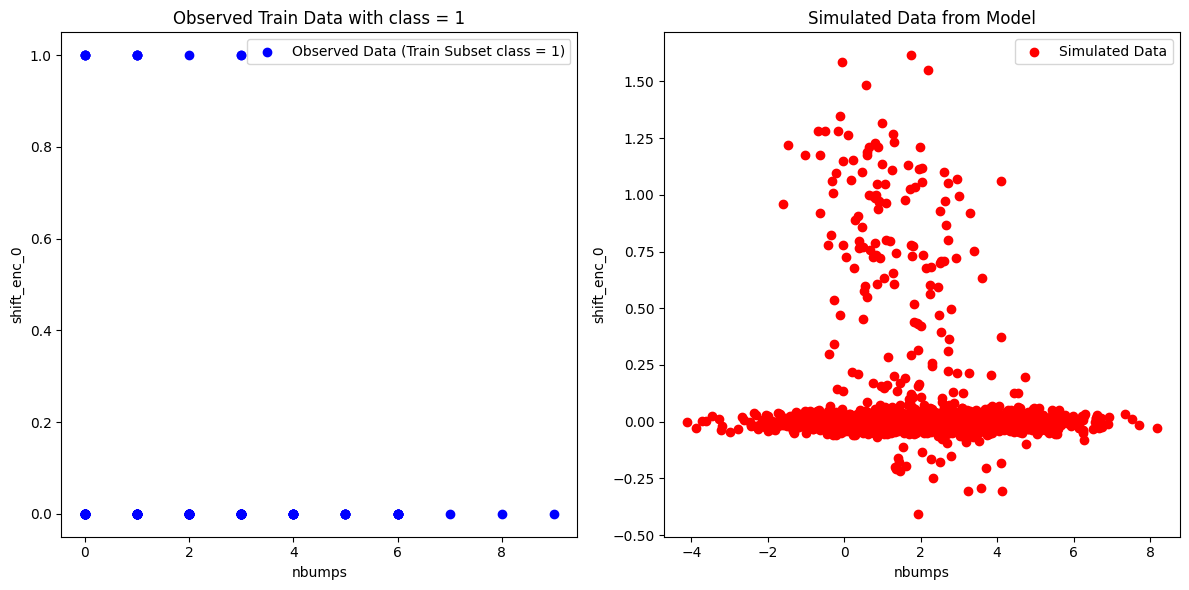

Index(['nbumps5', 'scaled_energy'], dtype='object')


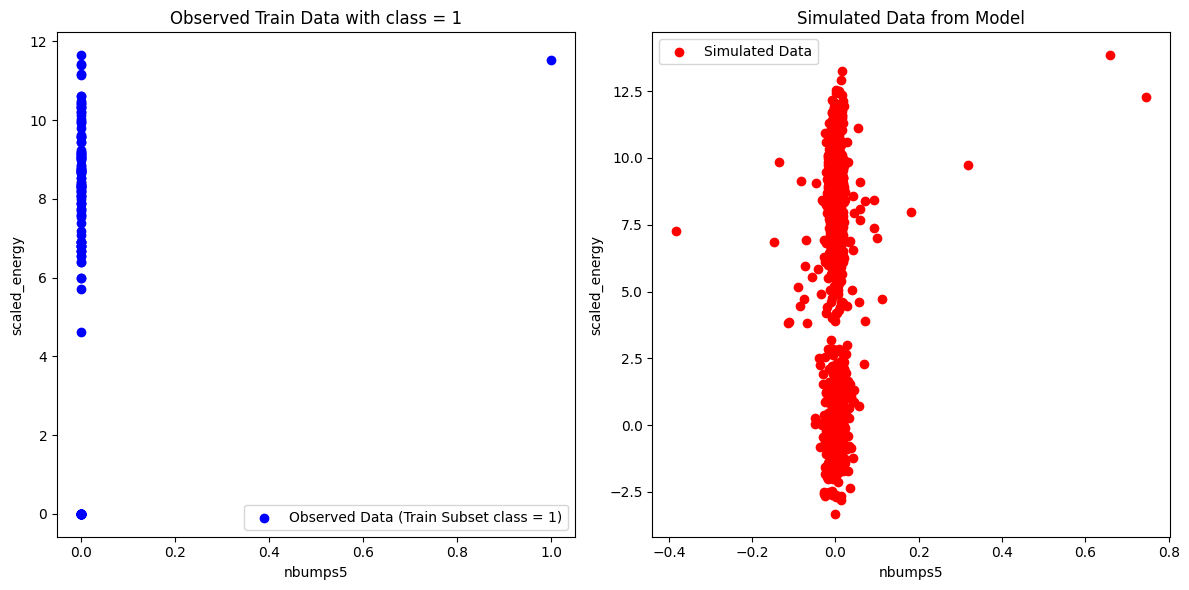

Index(['ghazard_enc_0', 'seismic_enc_0'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  .fit(X)


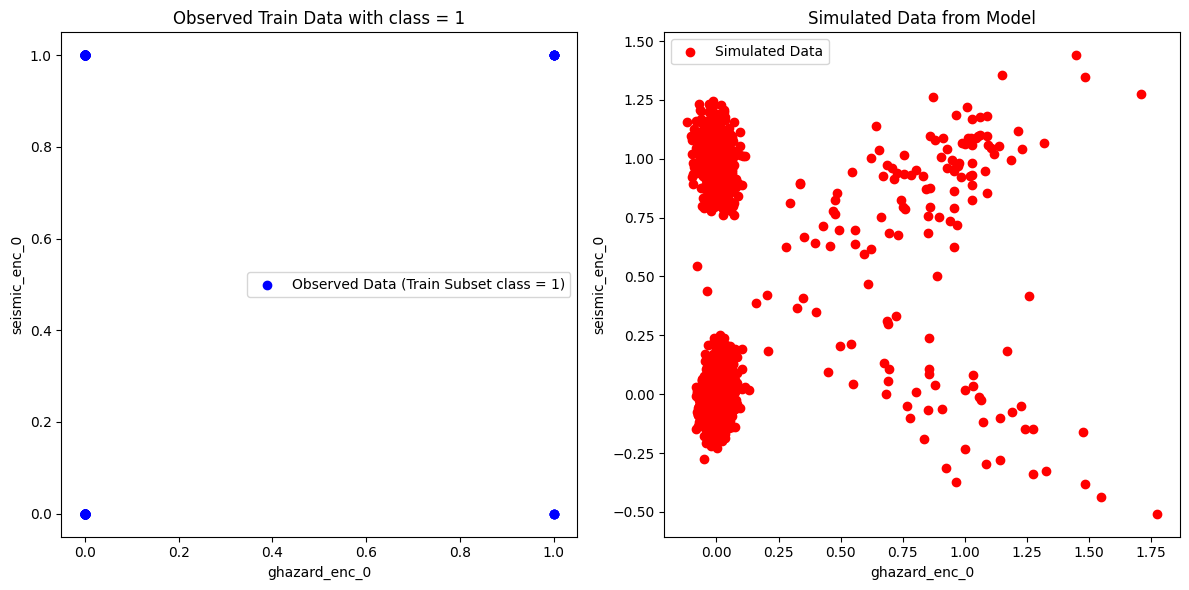

Index(['scaled_gpuls', 'nbumps4'], dtype='object')


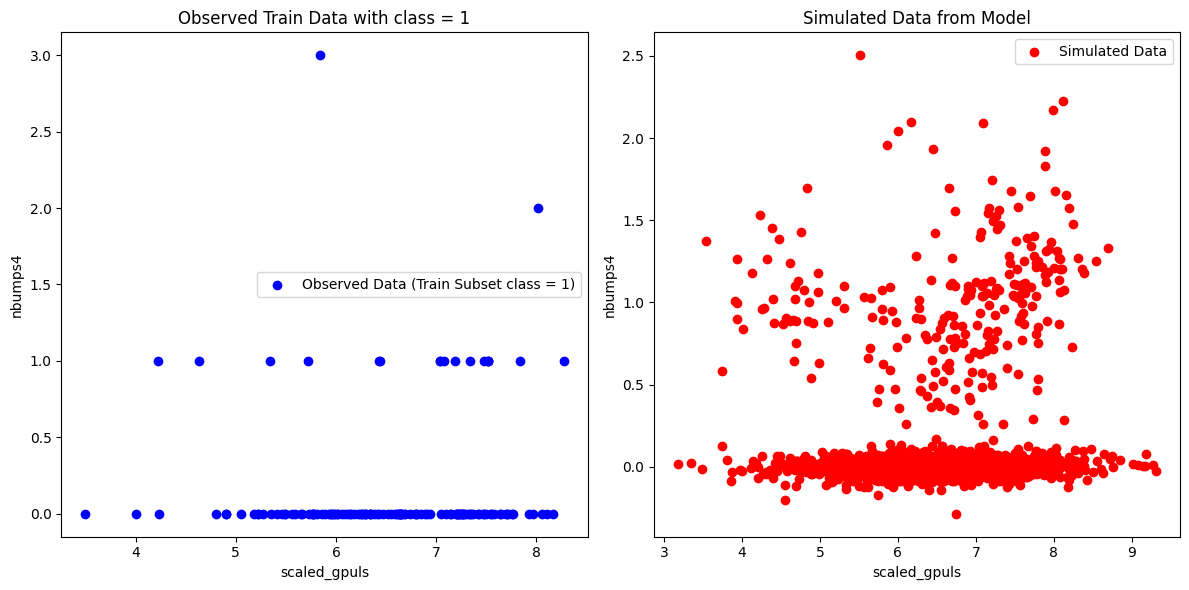

Index(['scaled_gdenergy', 'seismoacoustic_enc_0'], dtype='object')


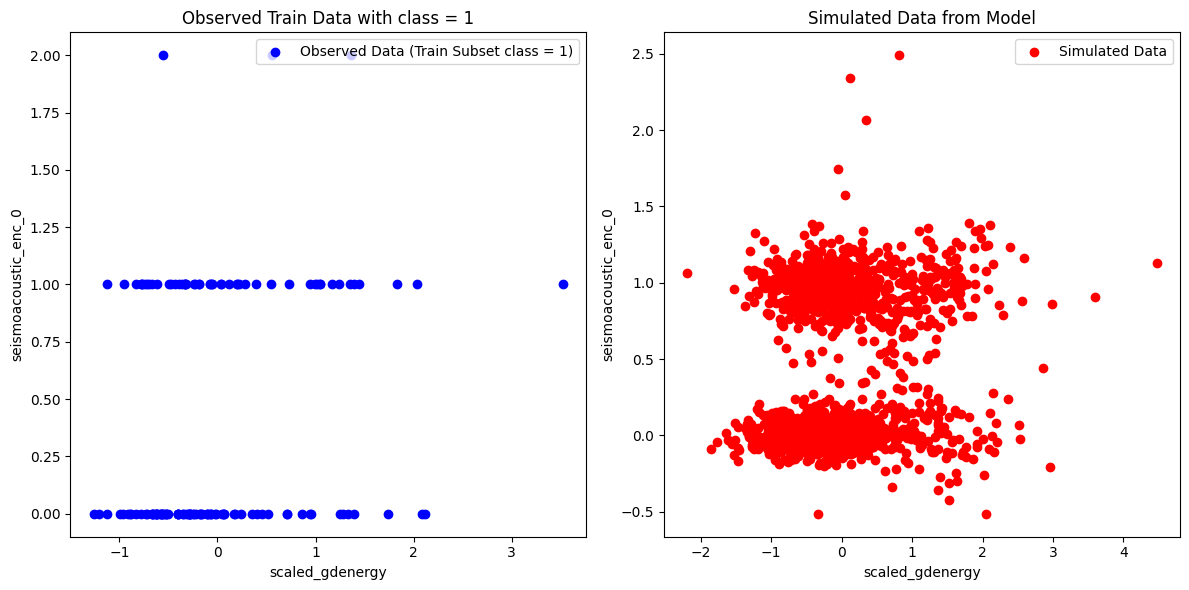

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  .fit(X)


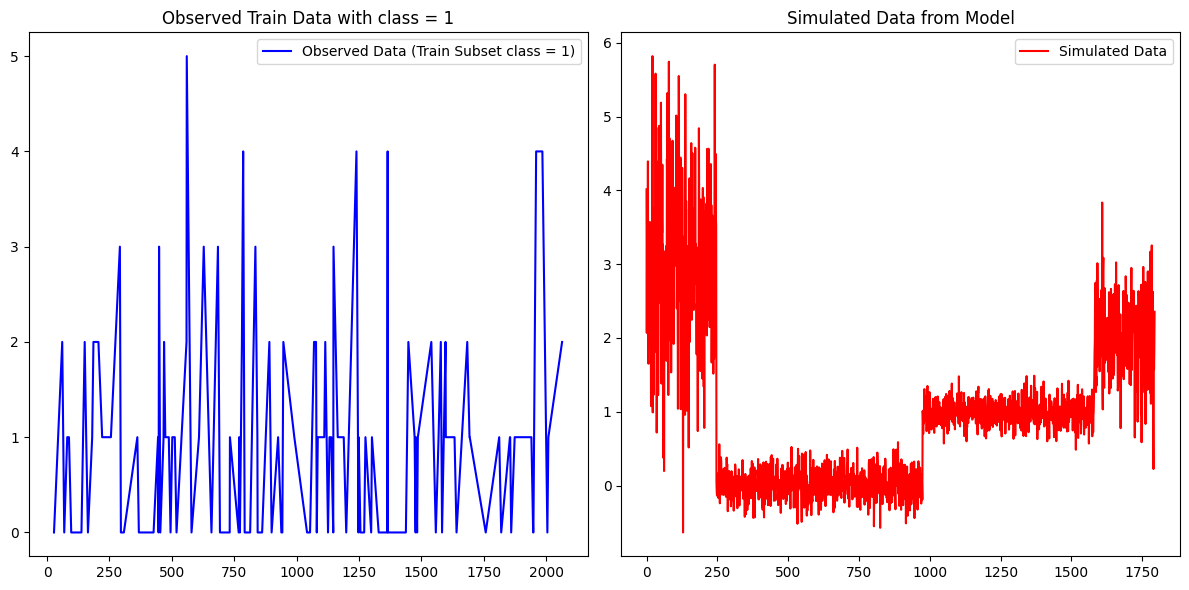

In [ ]:
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture

columns = X_train_subset.columns

subsets_1_1 = {}
simulated_data_1_1 = {}
new_obs_1_1 = pd.DataFrame()


for i in range(1, len(columns), 2):
    current_columns = [columns[i-1], columns[i]]
    X = X_train_subset[current_columns]
    subsets_1_1[f'X_{i}'] = X
    print(X.columns)

    bgmm = BayesianGaussianMixture(n_components=9, covariance_type='full',
                                   weight_concentration_prior=0.15, max_iter=10000)
    bgmm.fit(X)
    X_simulated = bgmm.sample(n_samples=y_train.value_counts()[0] -y_train.value_counts()[1])[0]
    simulated_data_1_1[f'X_simulated_{i}'] = X_simulated
    new_obs_1_1[[f'{columns[i-1]}', f'{columns[i]}']] = pd.DataFrame(X_simulated, columns = current_columns)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_simulated[:, 0], X_simulated[:,1], c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.xlabel(f'{columns[i-1]}')
    plt.ylabel(f'{columns[i]}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if len(columns) % 2 == 1:
    last_column = [columns[-1]]
    X_last = X_train_subset[last_column]
    subsets_1_1[f'X_{len(columns)}'] = X_last

    bgmm_last = BayesianGaussianMixture(n_components=7, covariance_type='full',
                                        weight_concentration_prior=0.35, max_iter=10000)
    bgmm_last.fit(X_last)
    X_simulated_last = bgmm_last.sample(n_samples=y_train.value_counts()[0] - y_train.value_counts()[1])[0]

    simulated_data_1_1[f'X_simulated_{len(columns)}'] = pd.DataFrame(X_simulated_last, columns=last_column)
    new_obs_1_1 = pd.concat([new_obs_1_1, pd.DataFrame(X_simulated_last, columns=last_column)], axis=1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X_last, c='blue', label='Observed Data (Train Subset class = 1)')
    plt.title('Observed Train Data with class = 1')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_simulated_last, c='red', label='Simulated Data')
    plt.title('Simulated Data from Model')
    plt.legend()

    plt.tight_layout()
    plt.show()



# Classification

In [ ]:
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+ (1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t
def sigma(x,beta):
    xbeta = x.dot(beta)
    d = 1. + np.exp(-xbeta)
    return d**(-1)

## MLE Logistic regression


In [ ]:
predictors_not_full = [
 'seismic_enc_0',
 'seismoacoustic_enc_0',
 'scaled_gdenergy',
 'nbumps3',
 'scaled_gpuls',
 'nbumps',
 'shift_enc_0',
 'nbumps4',
 'ghazard_enc_0',
 'nbumps5',
 'scaled_genergy']
predictors = X_train.columns

In [ ]:
#function to find Hessian
def fprime(beta,x,y):
    return  x.T.dot(sigma(x,beta)-y)
def Hessian(beta,x):
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    hes = x.T.dot(S.dot(x))
    return hes
def NewtonRaphsonLogistReg(beta0,x,y,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogLike = nll(beta,x,y)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log likelihood ',NegLogLike, ' AbDiff ', AbDiff)
        grad = fprime(beta,x,y)
        H = Hessian(beta,x)
        H_inv = sc.linalg.inv(H)
        beta = beta - H_inv.dot(grad)
        NegLogLike_new = nll(beta,x,y)
        AbDiff = np.abs(NegLogLike_new-NegLogLike)
        NegLogLike = NegLogLike_new
    if (iter == maxiter):
        print('Did not Converge')
    return beta, H_inv
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+ (1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t

In [ ]:
Xt = X_train[predictors]
n,p = Xt.shape
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100
beta_mle, cov = NewtonRaphsonLogistReg(beta0,Xt, y_train.values,maxiter,tolerance)
print(beta_mle)

iteration  1  Negative Log likelihood  1432.7352222174084  AbDiff  1
iteration  2  Negative Log likelihood  566.5826652160258  AbDiff  866.1525570013825
iteration  3  Negative Log likelihood  479.79889686235543  AbDiff  86.78376835367038
iteration  4  Negative Log likelihood  464.5423325115084  AbDiff  15.256564350847043
iteration  5  Negative Log likelihood  462.69315279899513  AbDiff  1.849179712513262
iteration  6  Negative Log likelihood  462.62143741363957  AbDiff  0.0717153853555601
iteration  7  Negative Log likelihood  462.61998819100097  AbDiff  0.0014492226385982576
iteration  8  Negative Log likelihood  462.6195171025813  AbDiff  0.000471088419658372
iteration  9  Negative Log likelihood  462.6193439200589  AbDiff  0.000173182522416937
iteration  10  Negative Log likelihood  462.6192802260972  AbDiff  6.36939616924792e-05
iteration  11  Negative Log likelihood  462.61925679660703  AbDiff  2.342949017020146e-05
[-0.35465196  9.28020271 -8.99591326 -1.7304779   8.92293956  0.0

In [ ]:
#Invert for the covariance and find 95% CIs
#cov = sc.linalg.inv(H)
se = np.sqrt(np.diag(cov))
lower95 = beta_mle - 1.96*se
upper95 = beta_mle + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_mle,se,lower95,upper95])
col = ['coefficient','se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

coefficient          se  lower 95% bound  \
scaled_genergy          -0.354652    0.112670        -0.575485   
nbumps2                  9.280203  270.819195      -521.525420   
nbumps                  -8.995913  270.819154      -539.801456   
shift_enc_0             -1.730478    0.344495        -2.405687   
nbumps5                  8.922940  270.821448      -521.887098   
scaled_energy            0.085169    0.034809         0.016943   
ghazard_enc_0           -0.217494    0.350098        -0.903686   
seismic_enc_0            0.286131    0.194100        -0.094304   
scaled_gpuls             0.108647    0.189220        -0.262225   
nbumps4                  8.936937  270.819205      -521.868705   
scaled_gdenergy          0.011284    0.105143        -0.194795   
seismoacoustic_enc_0    -0.081595    0.192713        -0.459312   
nbumps3                  9.264170  270.819148      -521.541360   

                      upper 95% bound  
scaled_genergy              -0.133819  
nbumps2                    540.085826  
nbumps                     521.809629  
shift_enc_0                 -1.055268  
nbumps5                    539.732977  
scaled_energy                0.153396  
ghazard_enc_0                0.468699  
seismic_enc_0                0.666566  
scaled_gpuls                 0.479520  
nbumps4                    539.742579  
scaled_gdenergy              0.217364  
seismoacoustic_enc_0         0.296121  
nbumps3                    540.069700

0.9342359767891683 124.817858150264
0.9342359767891683 124.81785815026402
0.6968700523687735


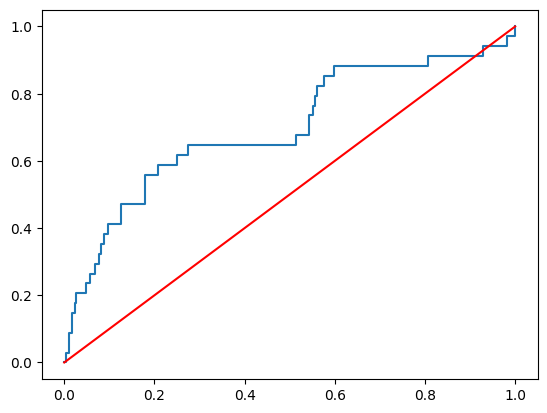

In [ ]:
#prediction assessment for MLE approach
predict_probs = sigma(X_test[predictors],beta_mle)
predict_class = (predict_probs > .5)

AccRate_MLE = np.sum(predict_class==y_test.values)/len(y_test)
LS_MLE = -(y_test.values.T.dot(np.log(predict_probs))+(1-y_test.values).T.dot(np.log(1-predict_probs)))

print(AccRate_MLE, LS_MLE)
print(accuracy_score(y_test,predict_class), log_loss(y_test, predict_probs, normalize=False))

fpr,tpr,thresholds = roc_curve(y_test,predict_probs)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC_MLE = roc_auc_score(y_test,predict_probs)
print(AUC_MLE)

## Bayesian Logistic Regression

In [ ]:
def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T @ S0 @ (beta-m0)
    return  nll(beta, x, y) -  logprior
def neg_post_prime(beta, x, y, m0, S0):
    return  x.T.dot(sigma(x,beta)-y)+S0.dot(beta-m0)
def laplace_prec(beta, x, S0):
    n = x.shape[0]
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    prec = S0.values + x.T.dot(S.dot(x))
    return prec
def NewtonRaphsonBayesLogReg(beta0,x,y,m0,S0,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log Posterior ',NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        H_inv = sc.linalg.inv(H)
        beta = beta - H_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new-NegLogPost)
        NegLogPost = NegLogPost_new
    if (iter == maxiter):
        print('Did not Converge')
    return beta, H_inv

In [ ]:
X_train

nbumps5  scaled_gpuls  nbumps  ghazard_enc_0  scaled_energy  nbumps3  \
0         0.0      5.710427     0.0            0.0       0.000000      0.0   
1         0.0      5.583496     0.0            0.0       0.000000      0.0   
2         0.0      7.769801     2.0            0.0      10.434145      1.0   
3         0.0      6.911747     0.0            0.0       0.000000      0.0   
4         0.0      3.295837     0.0            0.0       0.000000      0.0   
...       ...           ...     ...            ...            ...      ...   
2062      0.0      6.804615     3.0            0.0       8.188967      1.0   
2063      0.0      5.075174     0.0            0.0       0.000000      0.0   
2064      0.0      6.453625     1.0            0.0       5.993961      0.0   
2065      0.0      6.835185     0.0            1.0       0.000000      0.0   
2066      0.0      6.911747     0.0            0.0       0.000000      0.0   

      seismic_enc_0  nbumps2  seismoacoustic_enc_0  scaled_genergy  nbumps4  \
0               1.0      0.0                   0.0        9.885324      0.0   
1               0.0      0.0                   0.0        9.133459      0.0   
2               1.0      0.0                   0.0       13.082062      1.0   
3               1.0      0.0                   1.0       10.535025      0.0   
4               0.0      0.0                   0.0        8.163371      0.0   
...             ...      ...                   ...             ...      ...   
2062            1.0      2.0                   1.0       11.715131      0.0   
2063            0.0      0.0                   0.0        9.546813      0.0   
2064            1.0      1.0                   0.0       10.219757      0.0   
2065            1.0      0.0                   0.0       10.475596      0.0   
2066            1.0      0.0                   0.0       10.865898      0.0   

      scaled_gdenergy  shift_enc_0  
0           -0.353357          0.0  
1           -0.440526          1.0  
2           -0.677128          0.0  
3           -0.017132          0.0  
4           -0.428073          1.0  
...               ...          ...  
2062        -0.054490          0.0  
2063         0.854561          1.0  
2064        -0.216376          0.0  
2065         3.631525          1.0  
2066         1.713801          0.0  

[2067 rows x 13 columns]

In [ ]:
Xt = X_train[predictors]
#print(Xt.shape)
n,p = Xt.shape
#print(p)
m0 = np.zeros(p)
#print(m0)
S0 = Xt.T.dot(Xt)/n
#print(S0)
beta0 = np.zeros(p)
#print(beta0)
tolerance = 1e-05
maxiter = 100
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train.values,
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  1432.7352222174084  AbDiff  1
iteration  2  Negative Log Posterior  568.703191670907  AbDiff  864.0320305465013
iteration  3  Negative Log Posterior  483.5340299259467  AbDiff  85.16916174496032
iteration  4  Negative Log Posterior  469.2849522723036  AbDiff  14.249077653643099
iteration  5  Negative Log Posterior  467.7775871050082  AbDiff  1.5073651672954043
iteration  6  Negative Log Posterior  467.7355686841769  AbDiff  0.04201842083131169
iteration  7  Negative Log Posterior  467.73538453278184  AbDiff  0.00018415139504668332
[-0.34629302  3.03546319 -2.75311866 -1.63204333  2.69844934  0.08126662
 -0.21178416  0.27890526  0.10075345  2.70469728  0.01380859 -0.07927725
  3.02133267]


In [ ]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

post mean    post se  lower 95% bound  upper 95% bound
scaled_genergy        -0.346293   0.109447        -0.560809        -0.131778
nbumps2                3.035463  17.156369       -30.591020        36.661947
nbumps                -2.753119  17.155735       -36.378359        30.872122
shift_enc_0           -1.632043   0.324208        -2.267490        -0.996597
nbumps5                2.698449  17.191518       -30.996926        36.393825
scaled_energy          0.081267   0.034222         0.014192         0.148341
ghazard_enc_0         -0.211784   0.343075        -0.884212         0.460644
seismic_enc_0          0.278905   0.191599        -0.096628         0.654439
scaled_gpuls           0.100753   0.183917        -0.259723         0.461230
nbumps4                2.704697  17.156533       -30.922108        36.331502
scaled_gdenergy        0.013809   0.102860        -0.187796         0.215414
seismoacoustic_enc_0  -0.079277   0.189938        -0.451556         0.293002
nbumps3                3.021333  17.155630       -30.603702        36.646367

In [ ]:
#Calculate model evidence and BIC
def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T @ S0 @ (beta-m0)
    return  nll(beta, x, y) -  logprior
n,p = X_train.shape
logEv = -neg_post(beta_map, X_train[predictors], y_train.values, m0, S0) + (p/2)*np.log(2*np.pi) + (1/2)*np.log(sc.linalg.det(cov))
BIC = -nll(beta_map, X_train[predictors], y_train.values) -(p/2)*np.log(n)
logEv, BIC

(-477.1925973410943, -512.3549000310363)

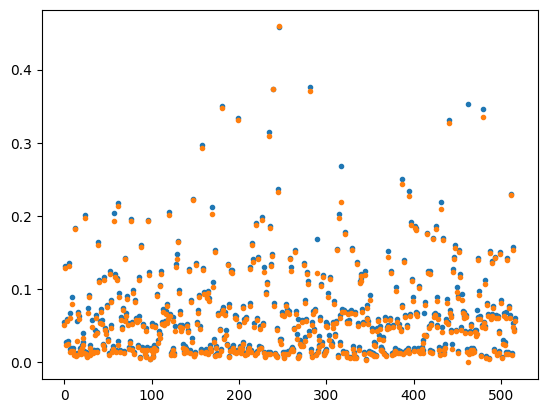

In [ ]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')
plt.plot(predict_probs,'.') #- MLE

0.9342359767891683 113.02435518812983 0.7240287419315552
0.9342359767891683 124.817858150264 0.6968700523687735


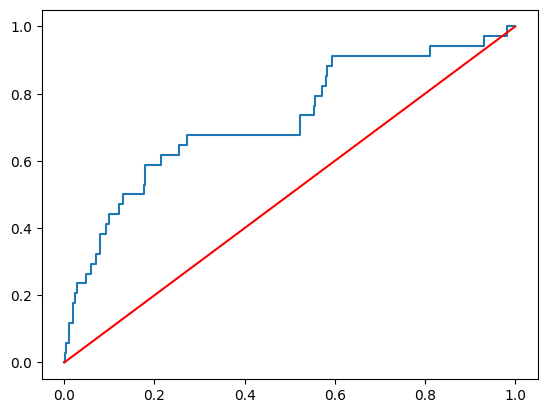

In [ ]:
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test.values)/len(y_test)
LS = -(y_test.values.T.dot(np.log(pred_probs_blr))+(1-y_test.values).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)
print(AccRate_MLE, LS_MLE, AUC_MLE)

## Bayesian on oversampled 4:1

In [ ]:
oversampled_train_4_1 = pd.concat([X_train, new_obs_4_1], axis = 0)
new_values = np.ones(len(new_obs_4_1), dtype=int)  # Ensure dtype matches your original array if necessary
y_train_updated = np.append(y_train, new_values)

#shuffled_df = oversampled_train_4_1.sample(frac=1, random_state=42).reset_index(drop=True)
oversampled_train_4_1

scaled_genergy   nbumps2    nbumps  shift_enc_0   nbumps5  scaled_energy  \
0          9.954181  1.000000  1.000000     0.000000  0.000000       5.707110   
1          8.706159  1.000000  2.000000     1.000000  0.000000       8.101981   
2         11.148362  0.000000  0.000000     0.000000  0.000000       0.000000   
3         10.434704  0.000000  0.000000     0.000000  0.000000       0.000000   
4         13.446344  0.000000  0.000000     0.000000  0.000000       0.000000   
..              ...       ...       ...          ...       ...            ...   
341       10.824094  2.660847 -0.625720     0.848184 -0.012436       6.785693   
342       10.585657  2.913809  0.694371     0.679874  0.007020       7.703266   
343       12.155655  1.012591  1.150168     0.694455  0.074742       1.411073   
344       11.086163  4.209624 -0.849107     1.483255  0.055455       6.366065   
345       10.172893  1.900941  1.903214     0.655755  0.012556       9.855112   

     ghazard_enc_0  seismic_enc_0  scaled_gpuls   nbumps4  scaled_gdenergy  \
0         0.000000       0.000000      5.996452  0.000000        -0.627317   
1         0.000000       0.000000      3.713572  0.000000        -0.315998   
2         1.000000       1.000000      7.252762  0.000000         1.551915   
3         0.000000       1.000000      6.754604  0.000000         0.593053   
4         0.000000       0.000000      7.255591  0.000000        -0.328451   
..             ...            ...           ...       ...              ...   
341      -0.247242       0.769623      6.750451  1.775335         0.272437   
342       0.864454       0.529094      6.837046  0.822057         0.421124   
343       0.705003       0.575282      6.498300  0.237340         2.521393   
344       0.806277       0.555830      7.170595  1.422862         0.710737   
345       0.563935       0.286580      5.674965  0.860142        -1.450182   

     seismoacoustic_enc_0   nbumps3  
0                0.000000  0.000000  
1                0.000000  1.000000  
2                1.000000  0.000000  
3                0.000000  0.000000  
4                1.000000  0.000000  
..                    ...       ...  
341              1.000434  2.435749  
342              0.844053  2.305002  
343              0.656134  1.802983  
344              0.383665  5.452725  
345              0.171038  2.482555  

[2413 rows x 13 columns]

In [ ]:
Xt = oversampled_train_4_1[predictors]
#print(Xt.shape)
n,p = Xt.shape
#print(p)
m0 = np.zeros(p)
#print(m0)
S0 = Xt.T.dot(Xt)/n
#print(S0)
beta0 = np.zeros(p)
#print(beta0)
tolerance = 1e-05
maxiter = 100
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train_updated,
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  1672.5641466911493  AbDiff  1
iteration  2  Negative Log Posterior  1077.486512618263  AbDiff  595.0776340728862
iteration  3  Negative Log Posterior  1028.9464881230829  AbDiff  48.540024495180205
iteration  4  Negative Log Posterior  1023.7435566989179  AbDiff  5.2029314241649445
iteration  5  Negative Log Posterior  1023.5915094493341  AbDiff  0.1520472495838021
iteration  6  Negative Log Posterior  1023.5912807466422  AbDiff  0.00022870269197028392
[-0.0658005   0.2927792   0.09093878 -1.90021324 -1.38206672  0.10563717
 -0.09596156  0.44956489 -0.21640251 -0.30599955  0.01728016 -0.16888271
  0.20669426]


In [ ]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

post mean   post se  lower 95% bound  upper 95% bound
scaled_genergy        -0.065800  0.043823        -0.151693         0.020092
nbumps2                0.292779  0.071347         0.152939         0.432620
nbumps                 0.090939  0.049463        -0.006009         0.187886
shift_enc_0           -1.900213  0.193993        -2.280439        -1.519988
nbumps5               -1.382067  1.043554        -3.427433         0.663299
scaled_energy          0.105637  0.018028         0.070302         0.140972
ghazard_enc_0         -0.095962  0.213655        -0.514725         0.322802
seismic_enc_0          0.449565  0.120067         0.214233         0.684896
scaled_gpuls          -0.216403  0.076458        -0.366261        -0.066544
nbumps4               -0.306000  0.173808        -0.646663         0.034663
scaled_gdenergy        0.017280  0.064548        -0.109235         0.143795
seismoacoustic_enc_0  -0.168883  0.119967        -0.404019         0.066253
nbumps3                0.206694  0.071617         0.066325         0.347064

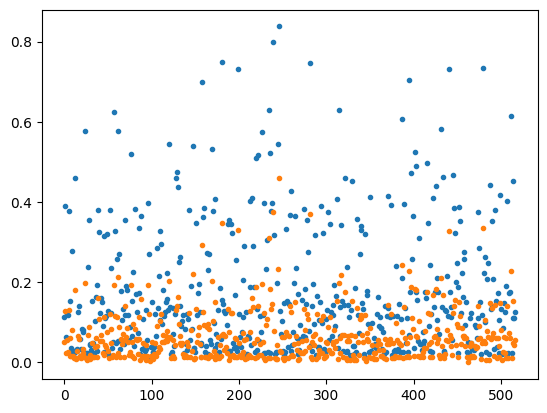

In [ ]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')
plt.plot(predict_probs,'.') #- MLE

0.9090909090909091 145.94077745692294 0.7234198027036902
0.9342359767891683 124.817858150264 0.6968700523687735


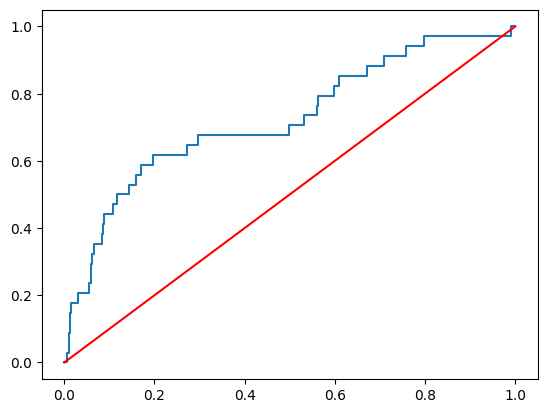

In [ ]:
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test.values)/len(y_test)
LS = -(y_test.values.T.dot(np.log(pred_probs_blr))+(1-y_test.values).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)
print(AccRate_MLE, LS_MLE, AUC_MLE)

## Bayesian on oversample 2:1

In [ ]:
oversampled_train_2_1 = pd.concat([X_train, new_obs_2_1], axis = 0)
new_values = np.ones(len(new_obs_2_1), dtype=int)  # Ensure dtype matches your original array if necessary
y_train_updated = np.append(y_train, new_values)

#shuffled_df = oversampled_train_4_1.sample(frac=1, random_state=42).reset_index(drop=True)
oversampled_train_2_1

scaled_genergy   nbumps2    nbumps  shift_enc_0   nbumps5  scaled_energy  \
0          9.954181  1.000000  1.000000     0.000000  0.000000       5.707110   
1          8.706159  1.000000  2.000000     1.000000  0.000000       8.101981   
2         11.148362  0.000000  0.000000     0.000000  0.000000       0.000000   
3         10.434704  0.000000  0.000000     0.000000  0.000000       0.000000   
4         13.446344  0.000000  0.000000     0.000000  0.000000       0.000000   
..              ...       ...       ...          ...       ...            ...   
824       12.214914  1.119350  4.474661     0.007449  0.052931       4.447638   
825       12.105631  0.960162 -0.330118     0.041033 -0.090090       8.061806   
826       11.742586  1.251723  3.676492     0.041142  0.185172      10.221680   
827        9.848234  1.225668  2.472367    -0.025732  0.717186      10.676502   
828       10.478933  0.861433 -0.169823     0.021178  1.057696      12.122167   

     ghazard_enc_0  seismic_enc_0  scaled_gpuls   nbumps4  scaled_gdenergy  \
0         0.000000       0.000000      5.996452  0.000000        -0.627317   
1         0.000000       0.000000      3.713572  0.000000        -0.315998   
2         1.000000       1.000000      7.252762  0.000000         1.551915   
3         0.000000       1.000000      6.754604  0.000000         0.593053   
4         0.000000       0.000000      7.255591  0.000000        -0.328451   
..             ...            ...           ...       ...              ...   
824       0.740084       0.176963      5.313790  1.138784        -0.013534   
825       0.835433       0.004001      5.741453  0.515822         0.404043   
826       1.164075       0.580426      6.270598 -0.058626        -1.288986   
827       0.879724      -0.075891      5.368517  2.060441         0.317106   
828       1.261461      -0.542323      7.184763  0.913610         0.886788   

     seismoacoustic_enc_0   nbumps3  
0                0.000000  0.000000  
1                0.000000  1.000000  
2                1.000000  0.000000  
3                0.000000  0.000000  
4                1.000000  0.000000  
..                    ...       ...  
824              1.265954  1.836726  
825              2.230231  1.119034  
826              0.548172  0.548563  
827              1.195937  0.049378  
828              1.406815  2.099878  

[2896 rows x 13 columns]

In [ ]:
Xt = oversampled_train_2_1[predictors]
#print(Xt.shape)
n,p = Xt.shape
#print(p)
m0 = np.zeros(p)
#print(m0)
S0 = Xt.T.dot(Xt)/n
#print(S0)
beta0 = np.zeros(p)
#print(beta0)
tolerance = 1e-05
maxiter = 100
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train_updated,
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  2007.3542349016027  AbDiff  1
iteration  2  Negative Log Posterior  1551.0655010460457  AbDiff  456.288733855557
iteration  3  Negative Log Posterior  1529.460846515715  AbDiff  21.604654530330663
iteration  4  Negative Log Posterior  1528.8841346964211  AbDiff  0.5767118192939051
iteration  5  Negative Log Posterior  1528.8833107951396  AbDiff  0.0008239012815920432
[-0.15323822  0.49053981  0.18126837 -1.2985325  -0.50403258  0.03026865
 -0.18927028  0.02663574  0.09523504 -0.20535363 -0.00454361 -0.49754984
  0.33493086]


In [ ]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

post mean   post se  lower 95% bound  upper 95% bound
scaled_genergy        -0.153238  0.031941        -0.215843        -0.090634
nbumps2                0.490540  0.057080         0.378663         0.602416
nbumps                 0.181268  0.036019         0.110671         0.251865
shift_enc_0           -1.298532  0.132758        -1.558737        -1.038328
nbumps5               -0.504033  0.786753        -2.046069         1.038003
scaled_energy          0.030269  0.014987         0.000894         0.059644
ghazard_enc_0         -0.189270  0.172352        -0.527081         0.148540
seismic_enc_0          0.026636  0.100874        -0.171077         0.224349
scaled_gpuls           0.095235  0.054056        -0.010716         0.201186
nbumps4               -0.205354  0.148201        -0.495828         0.085120
scaled_gdenergy       -0.004544  0.051258        -0.105010         0.095923
seismoacoustic_enc_0  -0.497550  0.103475        -0.700360        -0.294740
nbumps3                0.334931  0.065967         0.205636         0.464225

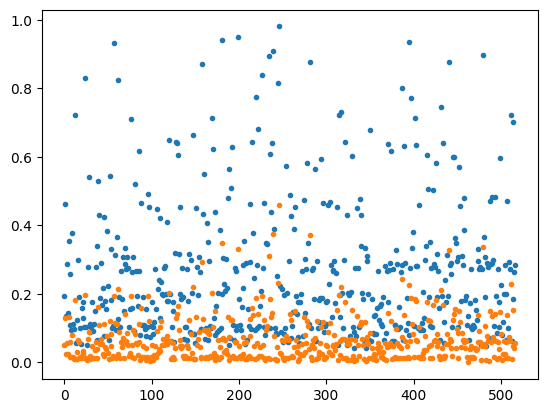

In [ ]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')
plt.plot(predict_probs,'.') #- MLE

0.8646034816247582 202.2700491537919 0.7354159054926318
0.9342359767891683 124.817858150264 0.6968700523687735


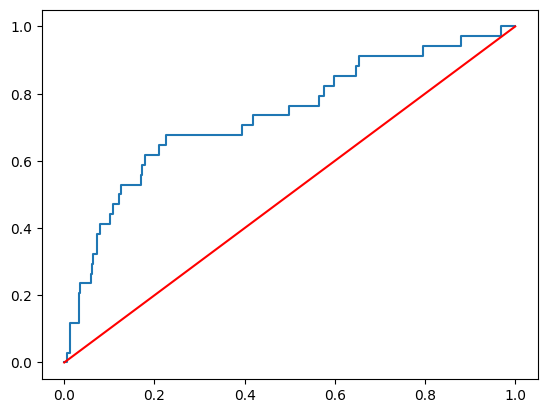

In [ ]:
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test.values)/len(y_test)
LS = -(y_test.values.T.dot(np.log(pred_probs_blr))+(1-y_test.values).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)
print(AccRate_MLE, LS_MLE, AUC_MLE)

## Bayesian on oversample 1:1

In [ ]:
oversampled_train_1_1 = pd.concat([X_train, new_obs_1_1], axis = 0)
new_values = np.ones(len(new_obs_1_1), dtype=int)  # Ensure dtype matches your original array if necessary
y_train_updated = np.append(y_train, new_values)

#shuffled_df = oversampled_train_4_1.sample(frac=1, random_state=42).reset_index(drop=True)
oversampled_train_1_1

scaled_genergy   nbumps2    nbumps  shift_enc_0   nbumps5  \
0           9.954181  1.000000  1.000000     0.000000  0.000000   
1           8.706159  1.000000  2.000000     1.000000  0.000000   
2          11.148362  0.000000  0.000000     0.000000  0.000000   
3          10.434704  0.000000  0.000000     0.000000  0.000000   
4          13.446344  0.000000  0.000000     0.000000  0.000000   
...              ...       ...       ...          ...       ...   
1790       11.490223  3.894296  0.928517     0.719604  0.182427   
1791       11.671464  3.611284  2.924056     0.721004 -0.382746   
1792       11.587526  3.523009  0.885504     1.209495  0.021421   
1793        9.562450  0.049434 -0.495969     1.282926  0.658203   
1794       13.106950  0.662997  0.797850     1.230194 -0.041631   

      scaled_energy  ghazard_enc_0  seismic_enc_0  scaled_gpuls   nbumps4  \
0          5.707110       0.000000       0.000000      5.996452  0.000000   
1          8.101981       0.000000       0.000000      3.713572  0.000000   
2          0.000000       1.000000       1.000000      7.252762  0.000000   
3          0.000000       0.000000       1.000000      6.754604  0.000000   
4          0.000000       0.000000       0.000000      7.255591  0.000000   
...             ...            ...            ...           ...       ...   
1790       7.993113       1.483177      -0.382361      5.867916  1.958417   
1791       7.282161       0.777428      -0.102365      5.517634  2.503243   
1792       6.259080       0.856013       0.238524      6.006217  2.043306   
1793      13.843316       0.855953       0.086429      6.327950 -0.036329   
1794       5.827485       0.350388       0.408755      6.013398  0.359032   

      scaled_gdenergy  seismoacoustic_enc_0   nbumps3  
0           -0.627317              0.000000  0.000000  
1           -0.315998              0.000000  1.000000  
2            1.551915              1.000000  0.000000  
3            0.593053              0.000000  0.000000  
4           -0.328451              1.000000  0.000000  
...               ...                   ...       ...  
1790         0.042030              1.575937  0.224168  
1791        -0.414818              1.385018  1.943644  
1792         0.213205              0.972387  1.572020  
1793         1.549894              1.212071  1.844780  
1794        -0.497184              1.125287  2.354481  

[3862 rows x 13 columns]

In [ ]:
Xt = oversampled_train_1_1[predictors]
#print(Xt.shape)
n,p = Xt.shape
#print(p)
m0 = np.zeros(p)
#print(m0)
S0 = Xt.T.dot(Xt)/n
#print(S0)
beta0 = np.zeros(p)
#print(beta0)
tolerance = 1e-05
maxiter = 100
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train_updated,
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  2676.9344113225116  AbDiff  1
iteration  2  Negative Log Posterior  2061.505494768743  AbDiff  615.4289165537684
iteration  3  Negative Log Posterior  2024.2105865220706  AbDiff  37.29490824667255
iteration  4  Negative Log Posterior  2022.8651688999566  AbDiff  1.3454176221139278
iteration  5  Negative Log Posterior  2022.8612723950496  AbDiff  0.0038965049070611713
[-0.079217    0.39671391  0.1697372  -1.99960228 -1.38380193  0.07958861
  0.02343703  0.1188658   0.0227708   0.1484167  -0.13496299 -0.48556243
  0.4985571 ]


In [ ]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

post mean   post se  lower 95% bound  upper 95% bound
scaled_genergy        -0.079217  0.023552        -0.125378        -0.033056
nbumps2                0.396714  0.054401         0.290088         0.503340
nbumps                 0.169737  0.026782         0.117244         0.222230
shift_enc_0           -1.999602  0.127761        -2.250013        -1.749191
nbumps5               -1.383802  0.806043        -2.963646         0.196042
scaled_energy          0.079589  0.011630         0.056795         0.102383
ghazard_enc_0          0.023437  0.159074        -0.288348         0.335222
seismic_enc_0          0.118866  0.089824        -0.057189         0.294921
scaled_gpuls           0.022771  0.039993        -0.055616         0.101158
nbumps4                0.148417  0.142831        -0.131533         0.428366
scaled_gdenergy       -0.134963  0.050410        -0.233766        -0.036160
seismoacoustic_enc_0  -0.485562  0.089926        -0.661817        -0.309308
nbumps3                0.498557  0.047460         0.405535         0.591579

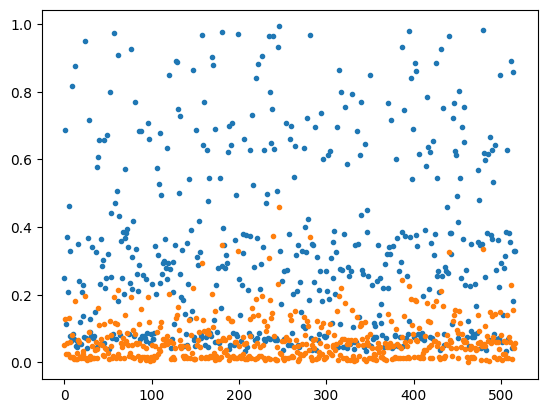

In [ ]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')
plt.plot(predict_probs,'.') #- MLE

0.7601547388781431 279.7755099822165 0.7359030568749239
0.9342359767891683 124.817858150264 0.6968700523687735


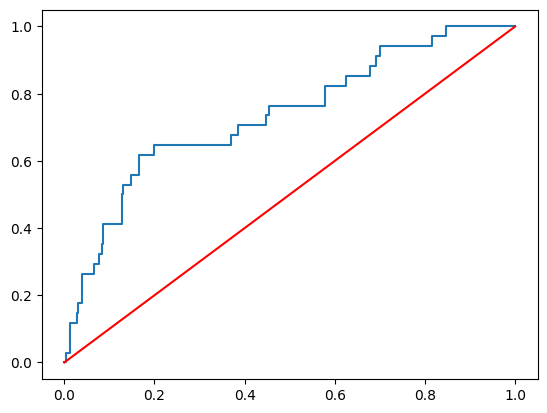

In [ ]:
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test.values)/len(y_test)
LS = -(y_test.values.T.dot(np.log(pred_probs_blr))+(1-y_test.values).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)
print(AccRate_MLE, LS_MLE, AUC_MLE)

## SMOTE oversampling

As the best model with previously sampled from bayesian gaussian mixture was 2:1, i will use the same coefficient for SMOTE

Counter({0: 1931, 1: 136})


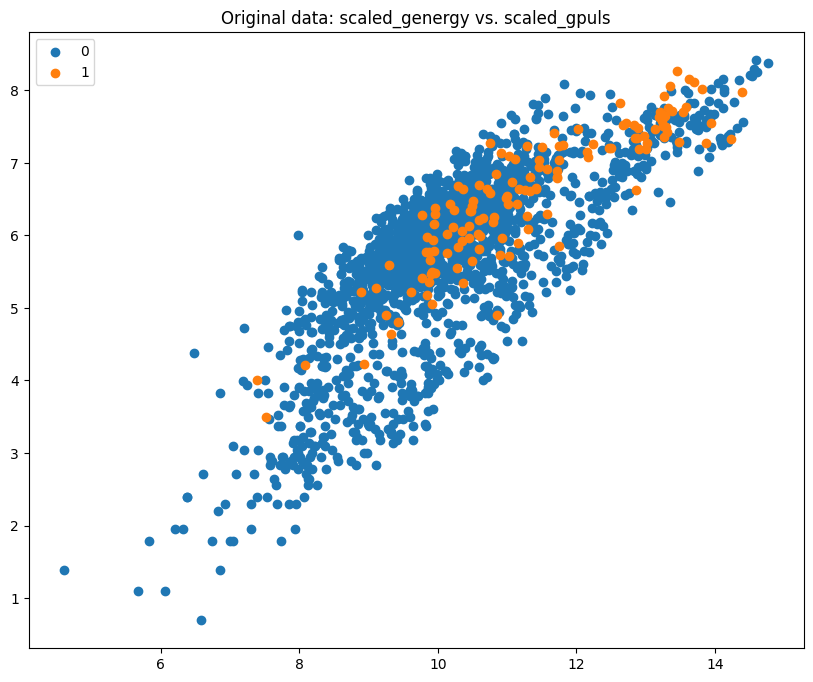

In [ ]:

counter = Counter(y_train)
print(counter)

#sns.scatterplot(x='scaled_genergy', y='scaled_gpuls', hue=class, data=X_train)

# View current data
plt.figure(figsize=[10, 8])


for lb, _ in counter.items():
	row_ix = np.where(y_train == lb)[0]
	plt.scatter(X_train.loc[row_ix, ['scaled_genergy']],
	            X_train.loc[row_ix, ['scaled_gpuls']], label=str(lb))

	#plt.scatter(X[y == label].scaled_genergy, X[y == label].scaled_gpuls, label=str(label))
plt.title("Original data: scaled_genergy vs. scaled_gpuls")
plt.legend()
plt.show()





In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Minority class will be 50% of the majority class



Resampled dataset shape Counter({0: 1931, 1: 965})


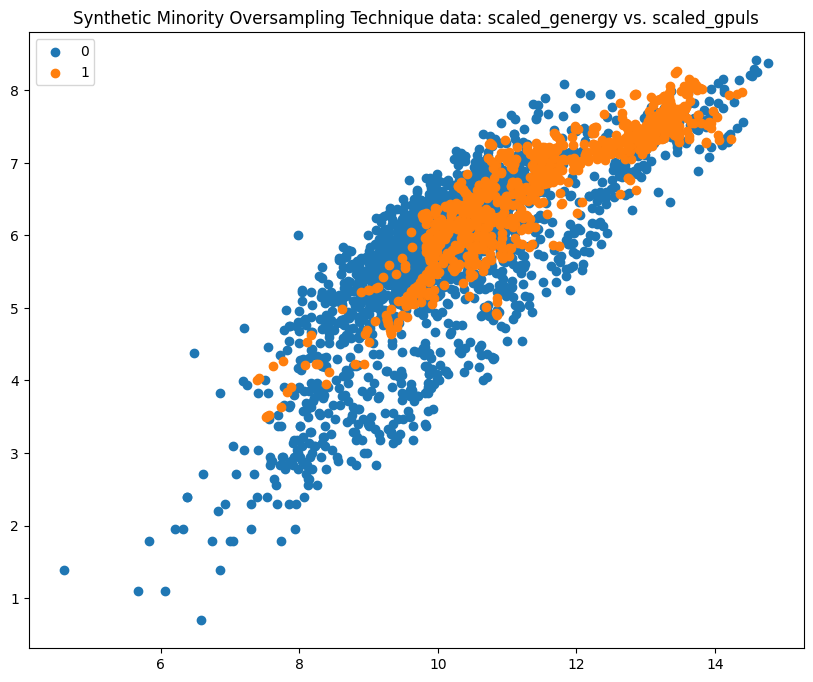

In [ ]:

sm = smote
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_res = pd.DataFrame(X_res, columns=X_cols)

plt.figure(figsize=[10, 8])
plt.title("Synthetic Minority Oversampling Technique data: scaled_genergy vs. scaled_gpuls")

for lb, _ in counter.items():
	row_ix = np.where(y_res == lb)[0]
	plt.scatter(X_res.loc[y_res == lb, ['scaled_genergy']],
	            X_res.loc[y_res == lb, ['scaled_gpuls']], label=str(lb))



plt.legend()
plt.show()

In [ ]:
Xt_new = X_res[predictors]
#print(Xt.shape)
n_new,p_new = Xt_new.shape
#print(p)
m0_new = np.zeros(p_new)
#print(m0)
S0_new = Xt_new.T.dot(Xt_new)/n_new
#print(S0)
beta0_new = np.zeros(p_new)
#print(beta0)
tolerance = 1e-05
maxiter = 100
beta_map_new, cov_new = NewtonRaphsonBayesLogReg(beta0_new,Xt_new, y_res.values,
                                                  m0_new,S0_new,maxiter,tolerance)
print(beta_map_new)

iteration  1  Negative Log Posterior  2007.3542349016027  AbDiff  1
iteration  2  Negative Log Posterior  1545.9592555415577  AbDiff  461.394979360045
iteration  3  Negative Log Posterior  1516.6105443428207  AbDiff  29.348711198736964
iteration  4  Negative Log Posterior  1514.8047125055036  AbDiff  1.8058318373171005
iteration  5  Negative Log Posterior  1514.781799930576  AbDiff  0.02291257492765908
iteration  6  Negative Log Posterior  1514.7798456320627  AbDiff  0.0019542985132829926
iteration  7  Negative Log Posterior  1514.7796070765316  AbDiff  0.00023855553104112914
[-0.17316521  4.97403477 -4.61098275 -1.82111022  4.29874411  0.05069238
 -0.69809072  0.58457709  0.10940062  4.30289991  0.00509928 -0.03658248
  4.95638428]


0.8452611218568665 198.24482365526995 0.7306052855924978


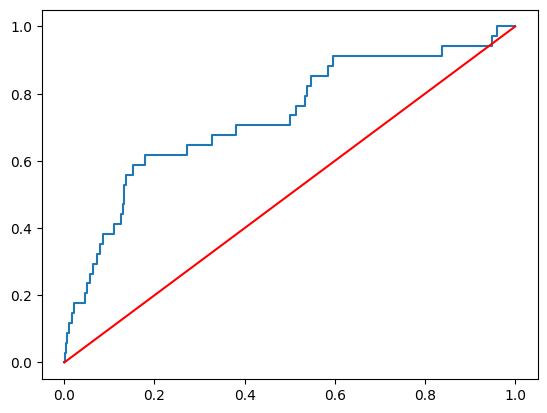

In [ ]:
pred_class_blr_new = (pred_probs_blr_new > .5)
AccRate_new = np.sum(pred_class_blr_new==y_test.values)/len(y_test)
LS_new = -(y_test.values.T.dot(np.log(pred_probs_blr_new))+(1-y_test.values).T.dot(np.log(1-pred_probs_blr_new)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr_new)
xgrid = np.linspace(0,1,100)
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC_new = roc_auc_score(y_test,pred_probs_blr_new)
print(AccRate_new, LS_new, AUC_new)
